In [1]:
from corda import reaction_confidence
import magic
import scprep
import numpy as np
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
import cv2
import scipy.cluster.hierarchy as sch

%matplotlib inline

In [2]:
X = pd.read_csv("../ScaledData_kmeans_Class_uMAP_A.csv")

In [3]:
X = scprep.transform.sqrt(X)
X

RN7SK  A1BG-AS1  A2M  A2ML1    A4GALT      AAAS      AACS     AADAT  \
0      0.0       0.0  0.0    0.0  0.000000  0.654070  0.865253  0.000000   
1      0.0       0.0  0.0    0.0  0.609715  0.497830  0.931354  0.000000   
2      0.0       0.0  0.0    0.0  0.000000  0.505228  0.357250  0.000000   
3      0.0       0.0  0.0    0.0  0.000000  0.000000  0.536813  0.379584   
4      0.0       0.0  0.0    0.0  0.000000  0.666602  0.769726  0.000000   
..     ...       ...  ...    ...       ...       ...       ...       ...   
148    0.0       0.0  0.0    0.0  0.000000  0.633483  1.097224  0.000000   
149    0.0       0.0  0.0    0.0  0.698669  0.000000  0.988067  0.000000   
150    0.0       0.0  0.0    0.0  0.000000  0.000000  0.000000  0.000000   
151    0.0       0.0  0.0    0.0  0.000000  0.000000  1.568061  0.000000   
152    0.0       0.0  0.0    0.0  0.000000  0.000000  0.000000  0.000000   

       PRXL2C     AAGAB  ...  RP11-290F20.3  SLC34A3  CTD-2183H9.3  C14ORF178  \
0    0.801069  0.654070  ...        0.00000      0.0           0.0        0.0   
1    0.862267  0.497830  ...        0.00000      0.0           0.0        0.0   
2    0.000000  0.505228  ...        0.00000      0.0           0.0        0.0   
3    0.379584  0.929787  ...        0.00000      0.0           0.0        0.0   
4    0.769726  0.942718  ...        0.00000      0.0           0.0        0.0   
..        ...       ...  ...            ...      ...           ...        ...   
148  0.633483  0.000000  ...        0.00000      0.0           0.0        0.0   
149  0.698669  1.210130  ...        1.21013      0.0           0.0        0.0   
150  0.000000  0.809087  ...        0.00000      0.0           0.0        0.0   
151  0.000000  0.000000  ...        0.00000      0.0           0.0        0.0   
152  0.000000  0.000000  ...        0.00000      0.0           0.0        0.0   

     RN7SL8P  RMRP  AC008592.3   NPM1P26  CASP1  RP11-163N6.2  
0        0.0   0.0         0.0  0.000000    0.0           0.0  
1        0.0   0.0         0.0  0.000000    0.0           0.0  
2        0.0   0.0         0.0  0.000000    0.0           0.0  
3        0.0   0.0         0.0  0.000000    0.0           0.0  
4        0.0   0.0         0.0  0.000000    0.0           0.0  
..       ...   ...         ...       ...    ...           ...  
148      0.0   0.0         0.0  0.000000    0.0           0.0  
149      0.0   0.0         0.0  0.698669    0.0           0.0  
150      0.0   0.0         0.0  0.000000    0.0           0.0  
151      0.0   0.0         0.0  0.000000    0.0           0.0  
152      0.0   0.0         0.0  0.000000    0.0           0.0  

[153 rows x 16868 columns]

In [4]:
magic_operator = magic.MAGIC(t=3,knn=5)
X2 = magic_operator.fit_transform(X)
X2

Calculating MAGIC...
  Running MAGIC on 153 cells and 16868 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.36 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.48 seconds.
  Running MAGIC with `solver='exact'` on 16868-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.74 seconds.


C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\magic.py:500 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


RN7SK  A1BG-AS1       A2M     A2ML1    A4GALT      AAAS      AACS  \
0    0.020830  0.047398  0.012403  0.016440  0.110018  0.444508  0.581152   
1    0.021066  0.056175  0.017702  0.012449  0.135312  0.439515  0.560960   
2    0.021969  0.054433  0.012038  0.014042  0.111384  0.437367  0.572289   
3    0.023449  0.052892  0.017806  0.012023  0.131378  0.438511  0.566282   
4    0.026049  0.050141  0.008632  0.015360  0.098637  0.445645  0.582456   
..        ...       ...       ...       ...       ...       ...       ...   
148  0.024341  0.067650  0.012297  0.009925  0.121766  0.441218  0.580571   
149  0.025621  0.064797  0.011894  0.010820  0.147120  0.438585  0.581454   
150  0.024586  0.068099  0.010295  0.006650  0.119095  0.425331  0.523448   
151  0.019967  0.056971  0.008480  0.010344  0.105539  0.421457  0.586655   
152  0.019464  0.061694  0.011720  0.010735  0.127422  0.425618  0.552829   

        AADAT    PRXL2C     AAGAB  ...  RP11-290F20.3   SLC34A3  CTD-2183H9.3  \
0    0.135091  0.602485  0.659013  ...       0.032271  0.012044      0.002195   
1    0.126967  0.590203  0.652932  ...       0.029049  0.019481      0.003174   
2    0.143120  0.584302  0.651125  ...       0.029139  0.013229      0.004247   
3    0.129864  0.590333  0.660188  ...       0.028925  0.018950      0.003027   
4    0.137414  0.598377  0.653295  ...       0.029733  0.010606      0.003085   
..        ...       ...       ...  ...            ...       ...           ...   
148  0.139965  0.545120  0.632963  ...       0.029823  0.017479      0.007542   
149  0.126948  0.566516  0.662916  ...       0.066849  0.019745      0.003779   
150  0.176077  0.498842  0.630418  ...       0.025263  0.008238      0.010651   
151  0.153568  0.548922  0.617385  ...       0.026343  0.010318      0.005254   
152  0.138603  0.544282  0.632939  ...       0.039582  0.018329      0.003843   

     C14ORF178   RN7SL8P      RMRP  AC008592.3   NPM1P26     CASP1  \
0     0.015643  0.004258  0.016167    0.005178  0.003404  0.003131   
1     0.018238  0.004431  0.013361    0.007747  0.004200  0.007329   
2     0.017142  0.005272  0.016254    0.007111  0.004396  0.004941   
3     0.017903  0.004202  0.013264    0.008111  0.004030  0.006351   
4     0.016466  0.004953  0.017635    0.005866  0.004404  0.003358   
..         ...       ...       ...         ...       ...       ...   
148   0.017063  0.006972  0.012623    0.010173  0.004424  0.008669   
149   0.016785  0.006565  0.011251    0.013018  0.022407  0.009398   
150   0.017057  0.005453  0.012343    0.012660  0.003603  0.004550   
151   0.019413  0.005069  0.016039    0.008222  0.004669  0.005386   
152   0.016797  0.005760  0.011518    0.010898  0.007364  0.008403   

     RP11-163N6.2  
0        0.002539  
1        0.002736  
2        0.004201  
3        0.002286  
4        0.003316  
..            ...  
148      0.006673  
149      0.003994  
150      0.014294  
151      0.007254  
152      0.005706  

[153 rows x 16868 columns]

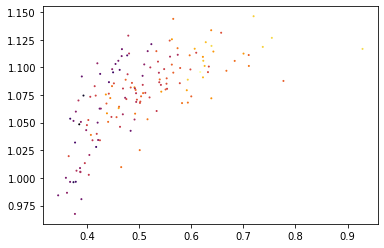

C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\plot.py:120 MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\plot.py:130 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pan

In [5]:
pyplot.scatter(X2['CXCL10'], X2['JAK1'], c=X2['NUP98'], s=1, cmap='inferno');
pyplot.show()
magic.plot.animate_magic(X, gene_x='CXCL10', gene_y='JAK1', gene_color='NUP98', operator=magic_operator)

In [6]:
alpha = 0.05
normales = {}
non_normales = {}
for c in X2.columns:
    stat, p = shapiro(X2[c])
    stat2, p2 = normaltest(X2[c])
    if p>alpha and p2>alpha:
        normales[c]=(stat,stat2,np.mean(X2[c]),np.std(X2[c]))
    else:
        non_normales[c]=(stat,stat2)

In [7]:
print(len(non_normales))

12481


In [8]:
binznn = {}
binzn = {}
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_PP_CENTERS#cv2.KMEANS_RANDOM_CENTERS

for c in non_normales.keys():
    temp = np.float32(X2[c])
    compactness,labels,centers = cv2.kmeans(temp,2,None,criteria,10,flags)
    binznn[c]=labels

In [9]:
maxx = 0
for i in binznn.keys():
    temp = np.float32(X2[i])
    maxx = max(temp)
    for j in range(len(temp)):
        if temp[j]==maxx:
            #print(maxx,i)
            try:
                if binznn[i][j][0]==1:
                    binznn[i]=np.mean(binznn[i])
                else:
                    binznn[i]=1-np.mean(binznn[i])
            except:
                print(i)


In [10]:
ccc=0
for i in binznn:
    if binznn[i]>0.8:
        ccc+=1
print(ccc)

41


In [11]:
Data=[]
for i in normales.keys():
    Data.append(np.float32(X2[i]))

In [12]:
#dendrogram = sch.dendrogram(sch.linkage(Data, method = 'ward'))

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Data)

In [14]:
classes = []
for it in range(0,4):
    mn = 0; std=0; bmn=0; bstd=0; bms=0;
    classes.append([])
    for x,i in enumerate(normales.keys()):
        if y_hc[x]==it:
            mn = np.mean(X2[i])
            std = np.std(X2[i])
            if (mn/std)>bms:
                bms=mn/std
                bmn=mn
                bstd=std
            classes[it].append((X2[i],i))

    for c in classes[it]:
        temp = np.float32(c[0])
        binzn[c[1]]=[]
        for j in temp:
            if j>=(bmn):
                binzn[c[1]].append(1)
            else:
                binzn[c[1]].append(0)
        binzn[c[1]]=np.mean(binzn[c[1]])

In [15]:
zero=[]
uno=[]
dos=[]
tres=[]
cuatro=[]
for x,i in enumerate(y_hc):
    if i==0:
        zero.append((np.mean(Data[x]),np.std(Data[x])))
    if i==1:
        uno.append((np.mean(Data[x]),np.std(Data[x])))
    if i==2:
        dos.append((np.mean(Data[x]),np.std(Data[x])))
    if i==3:
        tres.append((np.mean(Data[x]),np.std(Data[x])))
    if i==4:
        cuatro.append((np.mean(Data[x]),np.std(Data[x])))


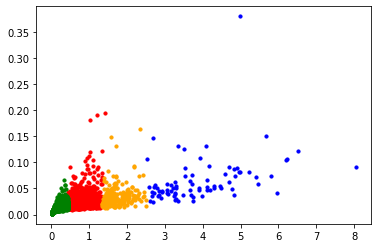

In [16]:
pyplot.scatter([i[0] for i in zero], [i[1] for i in zero], s = 10, c = 'red', label = 'Cluster 1')
pyplot.scatter([i[0] for i in uno], [i[1] for i in uno], s = 10, c = 'blue', label = 'Cluster 2')
pyplot.scatter([i[0] for i in dos], [i[1] for i in dos], s = 10, c = 'green', label = 'Cluster 3')
pyplot.scatter([i[0] for i in tres], [i[1] for i in tres], s = 10, c = 'orange', label = 'Cluster 4')
pyplot.scatter([i[0] for i in cuatro], [i[1] for i in cuatro], s = 10, c = 'black', label = 'Cluster 5')



In [17]:
binz = {**binzn,**binznn}

In [18]:
G = pd.read_csv("../HugoV2.csv")

In [19]:
h2n = {}
for x,i in enumerate(G['Name']):
    h2n[i.strip()]=G['Hugo'][x].strip()

In [20]:
hbin = {}
for k  in h2n:
    if k in binz:
        hbin[h2n[k]]=binz[k]
hbin

{'HGNC:37133': 0.40522875816993464,
 'HGNC:7': 0.026143790849673203,
 'HGNC:23336': 0.5686274509803921,
 'HGNC:18149': 0.35947712418300654,
 'HGNC:13666': 0.9477124183006536,
 'HGNC:21298': 0.0,
 'HGNC:17929': 0.39215686274509803,
 'HGNC:25662': 0.0,
 'HGNC:19679': 0.43137254901960786,
 'HGNC:30205': 0.32679738562091504,
 'HGNC:18': 0.0,
 'HGNC:15886': 0.0,
 'HGNC:33842': 0.3660130718954248,
 'HGNC:20': 0.4248366013071896,
 'HGNC:21022': 0.3790849673202614,
 'HGNC:28417': 0.35947712418300654,
 'HGNC:23993': 0.0,
 'HGNC:14235': 0.0,
 'HGNC:19235': 0.477124183006536,
 'HGNC:21': 0.23529411764705882,
 'HGNC:23': 0.0,
 'HGNC:29': 0.41830065359477125,
 'HGNC:32': 0.0,
 'HGNC:33': 0.4248366013071896,
 'HGNC:35': 0.2679738562091503,
 'HGNC:37': 0.1111111111111111,
 'HGNC:30': 0.5294117647058824,
 'HGNC:31': 0.2679738562091504,
 'HGNC:14637': 0.0,
 'HGNC:32972': 0.17647058823529413,
 'HGNC:45': 0.6274509803921569,
 'HGNC:47': 0.35294117647058826,
 'HGNC:48': 0.3006535947712418,
 'HGNC:49': 0.0

In [21]:
hbin_score = {}
for k  in h2n:
    if k in binz:
        if binz[k]<0.02:
            hbin_score[h2n[k]]=-1
        elif binz[k]<0.2 and binz[k]>=0.02:
            hbin_score[h2n[k]]=0
        elif binz[k]>=0.2 and binz[k]<0.5:
            hbin_score[h2n[k]]=1
        elif binz[k]>=0.5 and binz[k]<0.95:
            hbin_score[h2n[k]]=2
        elif binz[k]>=0.95:
            hbin_score[h2n[k]]=3
        else:
            hbin_score[h2n[k]]=0
len(hbin_score)

13880

In [22]:
hbin_score

{'HGNC:37133': 1,
 'HGNC:7': 0,
 'HGNC:23336': 2,
 'HGNC:18149': 1,
 'HGNC:13666': 2,
 'HGNC:21298': -1,
 'HGNC:17929': 1,
 'HGNC:25662': -1,
 'HGNC:19679': 1,
 'HGNC:30205': 1,
 'HGNC:18': -1,
 'HGNC:15886': -1,
 'HGNC:33842': 1,
 'HGNC:20': 1,
 'HGNC:21022': 1,
 'HGNC:28417': 1,
 'HGNC:23993': -1,
 'HGNC:14235': -1,
 'HGNC:19235': 1,
 'HGNC:21': 1,
 'HGNC:23': -1,
 'HGNC:29': 1,
 'HGNC:32': -1,
 'HGNC:33': 1,
 'HGNC:35': 1,
 'HGNC:37': 0,
 'HGNC:30': 2,
 'HGNC:31': 1,
 'HGNC:14637': -1,
 'HGNC:32972': 0,
 'HGNC:45': 2,
 'HGNC:47': 1,
 'HGNC:48': 1,
 'HGNC:49': -1,
 'HGNC:50': 1,
 'HGNC:41': 1,
 'HGNC:51': 2,
 'HGNC:53': 1,
 'HGNC:54': 2,
 'HGNC:55': 1,
 'HGNC:56': 1,
 'HGNC:59': 2,
 'HGNC:52': 1,
 'HGNC:61': 1,
 'HGNC:67': 1,
 'HGNC:68': 1,
 'HGNC:69': -1,
 'HGNC:70': 2,
 'HGNC:71': -1,
 'HGNC:72': -1,
 'HGNC:73': -1,
 'HGNC:74': 1,
 'HGNC:18717': 1,
 'HGNC:18718': 1,
 'HGNC:20154': 2,
 'HGNC:21396': 1,
 'HGNC:21398': 0,
 'HGNC:25656': -1,
 'HGNC:16407': 1,
 'HGNC:18289': 0,
 'HGNC:1

In [23]:
cc = 0
for i in hbin_score.keys():
    if hbin_score[i]==3:
        #print(i)
        cc+=1
cc

47

In [24]:
#We load recon2 and obtain reaction_confidence

In [25]:
import cobra
import corda

In [26]:
recon = cobra.io.read_sbml_model("../recon22.xml")

Model does not contain SBML fbc package information.


Using license file C:\Users\santi\gurobi\gurobi.lic
Academic license - for non-commercial use only


SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf5glu_c "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf5glu_c "10-formyltetrahydrofolate-[Glu](5)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf5glu_e "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf5glu_e "10-formyltetrahydrofolate-[Glu](5)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf5glu_l "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf5glu_l "10-formyltetrahydrofolate-[Glu](5)">


Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_13_cis_oretn_n "13-cis-oxo-retinoic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13_cis_oretn_n "13-cis-oxo-retinoic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_13_cis_retn_c "isotretinoin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13_cis_retn_c "isotretinoin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_13_cis_retn_n "isotretinoin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13_cis_retn_n "isotretinoin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_13_cis_retn_r "isotretinoin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13_cis_retn_r "isotretinoin">
Us

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1p2cbxl_x "1-pyrroline-2-carboxylate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1p2cbxl_x "1-pyrroline-2-carboxylate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1p3h5c_c "(3R,5S)-1-pyrroline-3-hydroxy-5-carboxylic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1p3h5c_c "(3R,5S)-1-pyrroline-3-hydroxy-5-carboxylic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1p3h5c_m "(3R,5S)-1-pyrroline-3-hydroxy-5-carboxylic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1p3h5c_m "(3R,5S)-1-pyrroline-3-hydroxy-5-carboxylic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1pipdn2c_x "1-piperideine-2-carboxylate">
Use 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2ddecdicoa_x "2,6-dodecadienoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2ddecdicoa_x "2,6-dodecadienoylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2decdicoa_m "2,7-decadienoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2decdicoa_m "2,7-decadienoylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2decdicoa_x "2,7-decadienoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2decdicoa_x "2,7-decadienoylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2docohexecoa_m "2,7,10,13,16,19-docosahexenoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2docohexe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2mp2coa_m "methacrylyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2mp2coa_m "methacrylyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2mpdhl_m "S(8)-(2-methylpropanoyl)dihydrolipoamide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2mpdhl_m "S(8)-(2-methylpropanoyl)dihydrolipoamide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2obut_c "2-oxobutanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2obut_c "2-oxobutanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2obut_m "2-oxobutanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2obut_m "2-oxobutanoate">


Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3aib_D_e "(R)-3-aminoisobutyric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3aib_D_e "(R)-3-aminoisobutyric acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3aib_D_m "(R)-3-aminoisobutyric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3aib_D_m "(R)-3-aminoisobutyric acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3aib_c "(S)-3-aminoisobutyric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3aib_c "(S)-3-aminoisobutyric acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3aib_e "(S)-3-aminoisobutyric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hdcoa_c "(S)-3-hydroxydecanoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hdcoa_c "(S)-3-hydroxydecanoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hdcoa_m "(S)-3-hydroxydecanoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hdcoa_m "(S)-3-hydroxydecanoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hddcoa_c "(S)-3-hydroxylauroyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hddcoa_c "(S)-3-hydroxylauroyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hddcoa_m "(S)-3-hydroxylauroyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFo

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hxkynam_c "3-Hydroxykynurenamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ityr_L_c "3-iodo-L-tyrosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3ityr_L_c "3-iodo-L-tyrosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ivcoa_c "3-hydroxyisovaleryl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3ivcoa_c "3-hydroxyisovaleryl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ivcoa_m "3-hydroxyisovaleryl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3ivcoa_m "3-hydroxyisovaleryl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3ivcrn_c "3-hydroxy-isovale

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3octdece1coa_m "3-hydroxyoctadecenoylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3octdece1crn_c "3-hydroxy-octadecenoyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3octdece1crn_c "3-hydroxy-octadecenoyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3octdece1crn_e "3-hydroxy-octadecenoyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3octdece1crn_e "3-hydroxy-octadecenoyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3octdectecoa_m "3,6,9,12-octadecatetraenoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3octdectecoa_m "3,6,9,12-octadecatetraenoylcoa">
Use of CHARGE

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3tetd7ecoa_m "3-hydroxy tetradecenoyl-7-coa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3tetd7ecoa_m "3-hydroxy tetradecenoyl-7-coa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3tetd7ecoacrn_c "3-hydroxy tetradecenoyl-7-carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3tetd7ecoacrn_c "3-hydroxy tetradecenoyl-7-carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3tetd7ecoacrn_e "3-hydroxy tetradecenoyl-7-carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3tetd7ecoacrn_e "3-hydroxy tetradecenoyl-7-carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3thexddcoa_c "3-hydroxy trans7,10-hexadecadienoylcoa">
U

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4aphdob_c "4-(2-aminophenyl)-2,4-dioxobutanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4fumacac_c "4-fumarylacetoacetate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4fumacac_c "4-fumarylacetoacetate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4h2oglt_c "4-hydroxy-2-oxoglutarate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4h2oglt_c "4-hydroxy-2-oxoglutarate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4h2oglt_m "4-hydroxy-2-oxoglutarate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4h2oglt_m "4-hydroxy-2-oxoglutarate(2-)">
Use of the species charge attribute is discouraged, use f

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4mzym_int2_r "3-dehydro-4-methylzymosterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4mzym_int2_r "3-dehydro-4-methylzymosterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4nph_c "4-nitrophenolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4nph_c "4-nitrophenolate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4nph_e "4-nitrophenolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4nph_e "4-nitrophenolate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4nphsf_c "4-nitrophenyl hydrogen sulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4nphsf_c "4-nitrophenyl hyd

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5adtststerones_e "5alpha-Dihydrotestosterone sulfate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_5adtststerones_l "5alpha-Dihydrotestosterone sulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5adtststerones_l "5alpha-Dihydrotestosterone sulfate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_5adtststerones_r "5alpha-Dihydrotestosterone sulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5adtststerones_r "5alpha-Dihydrotestosterone sulfate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5aop_c "5-aminolevulinic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5aop_c "5-aminolevulinic acid">
Use of the species

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mta_e "5'-S-methyl-5'-thioadenosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5mthf_c "5-methyltetrahydrofolate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mthf_c "5-methyltetrahydrofolate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5mthf_e "5-methyltetrahydrofolate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mthf_e "5-methyltetrahydrofolate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5mthf_n "5-methyltetrahydrofolate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mthf_n "5-methyltetrahydrofolate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6thf_l "hexaglutamyl folate  (THF)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_6thf_m "hexaglutamyl folate  (THF)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6thf_m "hexaglutamyl folate  (THF)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_7dhchsterol_c "cholesta-5,7-dien-3beta-ol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7dhchsterol_c "cholesta-5,7-dien-3beta-ol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_7dhchsterol_r "cholesta-5,7-dien-3beta-ol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7dhchsterol_r "cholesta-5,7-dien-3beta-ol">
Use of CHARGE in the notes element is discouraged, use fbc:charge ins

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C02442_c "N-methyltyraminium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C02470_c "Xanthurenic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C02470_c "Xanthurenic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C02470_e "Xanthurenic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C02470_e "Xanthurenic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C02470_m "Xanthurenic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C02470_m "Xanthurenic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C02528_c "chenodeoxycholate">
Use of FORMULA in the notes eleme

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dchac_r "deoxycholate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dchac_r "deoxycholate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02202_m "prostaglandin A1(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02202_m "prostaglandin A1(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02202_r "prostaglandin A1(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02202_r "prostaglandin A1(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C04717_c "13(S)-HPODE(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C04717_c "13(S)-HPODE(1-)">
Use of the species charge at

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C05299_r "2-methoxyestrone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C05299_r "2-methoxyestrone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C05300_c "16alpha-hydroxyestrone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C05300_c "16alpha-hydroxyestrone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C05300_r "16alpha-hydroxyestrone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C05300_r "16alpha-hydroxyestrone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C05301_c "2-hydroxy-17beta-estradiol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C05301_c "2-hydroxy-17beta-estr

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C07535_c "benzo[a]pyrene">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C07535_r "benzo[a]pyrene">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C07535_r "benzo[a]pyrene">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C08261_c "azelaic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C08261_c "azelaic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C08276_c "3-(methylthio)propionate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C08276_c "3-(methylthio)propionate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_docosac_m "behenate">
Use of FORMULA in the notes element is di

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C14851_x "Benzo[a]pyrene-4,5-oxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C14851_x "Benzo[a]pyrene-4,5-oxide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0074_c "alloxan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0074_c "alloxan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0074_e "alloxan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0074_e "alloxan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0074_n "alloxan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0074_n "alloxan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <S

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0853_c "3-oxopalmitoleoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0853_m "3-oxopalmitoleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0853_m "3-oxopalmitoleoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0853_x "3-oxopalmitoleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0853_x "3-oxopalmitoleoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE0955_r "6-oxo-prostaglandin F1alpha">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0955_r "6-oxo-prostaglandin F1alpha">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1059_c "N1,N8-diace

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1297_c "8-dehydrocholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1297_c "8-dehydrocholesterol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1297_m "8-dehydrocholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1297_m "8-dehydrocholesterol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1298_c "3beta-hydroxy-5-cholestenal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1298_c "3beta-hydroxy-5-cholestenal">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1298_m "3beta-hydroxy-5-cholestenal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1298_m "3beta-hydr

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1925_r "3-carboxy-alpha-chromanol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1925_r "3-carboxy-alpha-chromanol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1926_c "gama-carboxyethyl-hydroxychroman">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1926_c "gama-carboxyethyl-hydroxychroman">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1926_e "gama-carboxyethyl-hydroxychroman">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1926_e "gama-carboxyethyl-hydroxychroman">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1926_l "gama-carboxyethyl-hydroxychroman">
Use of FORMULA in the notes element is discouraged, use fbc:chemica

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2011_n "hypothiocyanite">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2020_m "N-arachidonoylglycinate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2020_m "N-arachidonoylglycinate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2026_m "3-methylcrotonyl glycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2026_m "3-methylcrotonyl glycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2028_c "3-hydroxyisovaleric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2028_c "3-hydroxyisovaleric acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2038_x "(E)-2,3-di

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2172_c "6,7-dihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2172_c "6,7-dihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2173_c "N-methyl-4,6,7-trihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2173_c "N-methyl-4,6,7-trihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2174_c "4,6,7-trihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2174_c "4,6,7-trihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Specie

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2242_n "trans-docos-2-enoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2243_c "trans-eicos-2-enoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2243_c "trans-eicos-2-enoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2245_c "trans-tetracos-2-enoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2245_c "trans-tetracos-2-enoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2246_c "3-hydroxydocosanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2246_c "3-hydroxydocosanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2247_c "3-

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2345_c "7alpha-hydroxy-3-oxo-4-cholestenoic acid anion">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2345_c "7alpha-hydroxy-3-oxo-4-cholestenoic acid anion">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2345_m "7alpha-hydroxy-3-oxo-4-cholestenoic acid anion">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2345_m "7alpha-hydroxy-3-oxo-4-cholestenoic acid anion">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2414_c "(3S,7R,11R)-phytanate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2414_c "(3S,7R,11R)-phytanate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2414_x "(3S,7R,11R)-phytanate">
Use of FORMULA in the notes el

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2434_x "trans,cis,cis-2,9,12-octadecatrienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2437_x "2E,6Z,9Z,12Z-octadecatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2437_x "2E,6Z,9Z,12Z-octadecatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2438_x "3(S)-hydroxy-6Z,9Z,12Z-octadecatrienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2438_x "3(S)-hydroxy-6Z,9Z,12Z-octadecatrienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2439_x "3-oxo-6Z,9Z,12Z-octadecatrienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2439_x "3-oxo-6Z,9Z,12Z-octadecatrienoyl-CoA"

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2568_r "15-epi-lipoxin A4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2568_x "15-epi-lipoxin A4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2568_x "15-epi-lipoxin A4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2569_c "15-epi-lipoxin B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2569_c "15-epi-lipoxin B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2569_r "15-epi-lipoxin B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2569_r "15-epi-lipoxin B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2569_x "15-epi-lipoxin B4">
Use of FORMULA in the notes elem

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2839_e "maltodecaose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2839_e "maltodecaose">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2846_c "fructoselysine 3-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2846_c "fructoselysine 3-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2847_c "fructosylglycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2847_c "fructosylglycine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2848_c "fructoseglycine ketone 3-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2848_c "fructoseglycine ketone 3-pho

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2878_c "3,3,5-triiodo-L-thyronine-beta-D-glucuronoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2878_r "3,3,5-triiodo-L-thyronine-beta-D-glucuronoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2878_r "3,3,5-triiodo-L-thyronine-beta-D-glucuronoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2879_c "3,5,3-triiodo-L-thyronine-beta-D-glucuronoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2879_c "3,5,3-triiodo-L-thyronine-beta-D-glucuronoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2879_r "3,5,3-triiodo-L-thyronine-beta-D-glucuronoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE28

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2947_c "xanthurenate-8-O-beta-D-glucoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2947_c "xanthurenate-8-O-beta-D-glucoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2949_c "oxoxanthurenate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2949_c "oxoxanthurenate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2953_c "rac-5,6-epoxy-retinoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2953_c "rac-5,6-epoxy-retinoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2953_r "rac-5,6-epoxy-retinoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2953_r "rac-5,

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4633_e "hypochlorous acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4633_l "hypochlorous acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4633_l "hypochlorous acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4633_n "hypochlorous acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4633_n "hypochlorous acid">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4722_c "beta-casomorphin (1-6)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4722_c "beta-casomorphin (1-6)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4722_e "beta-casomorphin (1-6)">
Use of FORMULA 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4803_m "3-oxo-4(R),8-dimethyl-nonanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4804_m "3-oxo-4-methyl-pentanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4804_m "3-oxo-4-methyl-pentanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4805_m "4(R),8-dimethyl-nonanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4805_m "4(R),8-dimethyl-nonanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4805_x "4(R),8-dimethyl-nonanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4805_x "4(R),8-dimethyl-nonanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4821_r "2-trans-7,10,13,16,19-all-cis-docosahexaenoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_clpndcoa_r "(7Z,10Z,13Z,16Z,19Z)-docosapentaenoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_clpndcoa_r "(7Z,10Z,13Z,16Z,19Z)-docosapentaenoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tethex3coa_r "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tethex3coa_r "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoyl-CoA(4-)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4824_c "tetracosa-9,12,15,18,21-all-cis-pentaenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula i

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4840_c "(3S)-hydroxy-eicosa-cis,cis-11,14-dienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4840_r "(3S)-hydroxy-eicosa-cis,cis-11,14-dienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4840_r "(3S)-hydroxy-eicosa-cis,cis-11,14-dienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4841_c "3-oxoeicosa-cis,cis-11,14-dienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4841_c "3-oxoeicosa-cis,cis-11,14-dienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4841_r "3-oxoeicosa-cis,cis-11,14-dienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4841_r "3-oxoeicosa-cis,cis-11,1

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4854_c "all-cis-10,13,16,19-docosatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4854_c "all-cis-10,13,16,19-docosatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4854_r "all-cis-10,13,16,19-docosatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4854_r "all-cis-10,13,16,19-docosatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4855_c "all-cis-12,15,18,21-tetracosatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4855_c "all-cis-12,15,18,21-tetracosatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4855_r "all-cis-12,15,18,21-tetracosatetra

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4989_r "20-OH-10,11-dihydro-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4989_r "20-OH-10,11-dihydro-leukotriene B4">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4990_c "12-dehydro-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4990_c "12-dehydro-leukotriene B4">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4990_m "12-dehydro-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4990_m "12-dehydro-leukotriene B4">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4990_r "12-dehydro-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula inste

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5116_x "trans-3-cis-8,11,14-eicosatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5116_x "trans-3-cis-8,11,14-eicosatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5117_m "(3E,5Z,8Z)-tetradecatrienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5117_m "(3E,5Z,8Z)-tetradecatrienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5118_m "trans-2-cis,cis-4,8-tetradecatrienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5118_m "trans-2-cis,cis-4,8-tetradecatrienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5119_m "trans-3-cis-8-tetradecadienoyl-CoA">
Use of FORMULA in

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5154_c "trans,cis-2,13-docosadienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5154_c "trans,cis-2,13-docosadienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5154_r "trans,cis-2,13-docosadienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5154_r "trans,cis-2,13-docosadienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5155_c "cis-13-docosenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5155_c "cis-13-docosenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5155_r "cis-13-docosenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5236_n "O2-4a-cyclic-tetrahydrobiopterin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5239_c "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5239_c "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5239_m "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5239_m "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5239_r "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5239_r "2-hydroxy-17beta-estradiol-4

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5250_m "17beta-estradiol-2,3-quinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5250_m "17beta-estradiol-2,3-quinone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5250_r "17beta-estradiol-2,3-quinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5250_r "17beta-estradiol-2,3-quinone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5250_x "17beta-estradiol-2,3-quinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5250_x "17beta-estradiol-2,3-quinone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5251_c "estrone-3,4-quinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Spec

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5311_m "6(R)-hydroxy-tetradeca-2E,4E,8Z-trienoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5311_m "6(R)-hydroxy-tetradeca-2E,4E,8Z-trienoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5312_m "6(R)-hydroxy-tetradeca-2E,8Z-dienoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5312_m "6(R)-hydroxy-tetradeca-2E,8Z-dienoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5313_m "6(R)-hydroxy-tetradeca-4E,8Z-dienoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5313_m "6(R)-hydroxy-tetradeca-4E,8Z-dienoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5314_m "8(R)-hydroxy-hexadeca-2E,4E,6E,10Z-tetraenoate">
U

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5337_x "3-oxo-10(S)-hydroxy-octadeca-6E,8E,12Z-trienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5337_x "3-oxo-10(S)-hydroxy-octadeca-6E,8E,12Z-trienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5341_m "5-oxo-12(S)-hydroxy-eicosa-2E,8E,10E,14Z-tetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5341_m "5-oxo-12(S)-hydroxy-eicosa-2E,8E,10E,14Z-tetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5341_x "5-oxo-12(S)-hydroxy-eicosa-2E,8E,10E,14Z-tetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5341_x "5-oxo-12(S)-hydroxy-eicosa-2E,8E,10E,14Z-tetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5349_m "5-oxo-6E-12-epi-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5349_m "5-oxo-6E-12-epi-leukotriene B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5349_r "5-oxo-6E-12-epi-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5349_r "5-oxo-6E-12-epi-leukotriene B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5349_x "5-oxo-6E-12-epi-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5349_x "5-oxo-6E-12-epi-leukotriene B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5352_c "M_CE5352_c">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <S

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5546_c "5-S-glutathionyl-adrenochrome hydroquinone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5546_x "5-S-glutathionyl-adrenochrome hydroquinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5546_x "5-S-glutathionyl-adrenochrome hydroquinone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5547_c "5-S-glutathionyl-noradrenochrome hydroquinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5547_c "5-S-glutathionyl-noradrenochrome hydroquinone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5547_x "5-S-glutathionyl-noradrenochrome hydroquinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5547_x "5-S-gluta

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5756_c "M_CE5756_c">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5756_r "M_CE5756_r">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5756_r "M_CE5756_r">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5757_c "4-oxo-9-cis-retinoyl-beta-glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5757_c "4-oxo-9-cis-retinoyl-beta-glucuronide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5757_r "4-oxo-9-cis-retinoyl-beta-glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5757_r "4-oxo-9-cis-retinoyl-beta-glucuronide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5842_c "13-hydroxy-alpha-tocopherol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5842_c "13-hydroxy-alpha-tocopherol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5842_r "13-hydroxy-alpha-tocopherol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5842_r "13-hydroxy-alpha-tocopherol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5843_c "13-carboxy-alpha-tocopherol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5843_c "13-carboxy-alpha-tocopherol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5843_r "13-carboxy-alpha-tocopherol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Sp

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5930_c "5,9-cyclo-6,8-cycloperoxy-12-hydroperoxy-(10E,14Z)-eicosadienoic acid">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5931_c "5,9-cyclo-6,8,12-trihydroxy-(10E,14Z)-eicosadienoic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5931_c "5,9-cyclo-6,8,12-trihydroxy-(10E,14Z)-eicosadienoic acid">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5932_c "13,14-epoxy-retinol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5932_c "13,14-epoxy-retinol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5934_x "3(R)-hydroxy-pristanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5934_x "3(R)-hydroxy-pristanoyl-

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5968_c "3(S),10(R)-OH-octadeca-6-trans-4,12-cis-trienoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5968_c "3(S),10(R)-OH-octadeca-6-trans-4,12-cis-trienoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5968_m "3(S),10(R)-OH-octadeca-6-trans-4,12-cis-trienoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5968_m "3(S),10(R)-OH-octadeca-6-trans-4,12-cis-trienoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5968_x "3(S),10(R)-OH-octadeca-6-trans-4,12-cis-trienoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5968_x "3(S),10(R)-OH-octadeca-6-trans-4,12-cis-trienoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Specie

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6183_m "18,20-dioxo-20-CoA-leukotriene B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6183_x "18,20-dioxo-20-CoA-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6183_x "18,20-dioxo-20-CoA-leukotriene B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6184_c "18-CoA-18-oxo-dinorleukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6184_c "18-CoA-18-oxo-dinorleukotriene B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6184_m "18-CoA-18-oxo-dinorleukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6184_m "18-CoA-18-oxo-dinorleukotriene B4">
Use of CHARGE in the notes element i

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6234_c "prostaglandin H1">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6234_n "prostaglandin H1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6234_n "prostaglandin H1">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6235_c "S-(PGA2)-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6235_c "S-(PGA2)-glutathione">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6235_m "S-(PGA2)-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6235_m "S-(PGA2)-glutathione">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6235_r "S-(PGA2)-glutathione">
Use of FORMULA in th

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE6415_c "(11S)-11-hydroperoxylinoleic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6415_c "(11S)-11-hydroperoxylinoleic acid">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6420_c "8-peroxy-docosahexaenoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6420_c "8-peroxy-docosahexaenoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE6423_c "11-peroxy-docosahexaenoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6423_c "11-peroxy-docosahexaenoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE6426_c "7-peroxy-docosahexaenoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula inste

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6467_c "20-hydroxy-D4-neuroprostane">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6502_c "9,10-12,13-diepoxy-octadecanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6502_c "9,10-12,13-diepoxy-octadecanoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6504_c "1-hydroperoxy-8-carboxyoctyl 3,4-epoxynon-(2E)-enyl ether">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6504_c "1-hydroperoxy-8-carboxyoctyl 3,4-epoxynon-(2E)-enyl ether">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE6506_c "3,4-epoxynonanal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE6506_c "3,4-epoxynonanal">
Use of CHARGE in the notes ele

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE7097_x "5-oxo-12(S)-hydroxy-eicosa-6E,8Z,10E,14Z-tetraenoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE7097_x "5-oxo-12(S)-hydroxy-eicosa-6E,8Z,10E,14Z-tetraenoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE7101_c "8alpha-hydroxy-gama-tocopherone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE7101_c "8alpha-hydroxy-gama-tocopherone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE7109_c "5(S),6(S)-epoxy-15(R)-HEPE">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE7109_c "5(S),6(S)-epoxy-15(R)-HEPE">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE7109_n "5(S),6(S)-epoxy-15(R)-HEPE">
Use of FORMULA in the notes eleme

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CN0011_x "Benzo[a]pyrene-9,10-diol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CN0011_x "Benzo[a]pyrene-9,10-diol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CN0012_c "Benzo[a]pyrene-2,3-oxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CN0012_c "Benzo[a]pyrene-2,3-oxide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CN0012_r "Benzo[a]pyrene-2,3-oxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CN0012_r "Benzo[a]pyrene-2,3-oxide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CN0012_x "Benzo[a]pyrene-2,3-oxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CN0012_x "Ben

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC00342_m "cis-aconitate(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00342_m "cis-aconitate(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC00361_c "sedoheptulose 1,7-bisphosphate(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00361_c "sedoheptulose 1,7-bisphosphate(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC00460_c "2,5-dihydroxybenzoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00460_c "2,5-dihydroxybenzoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC00576_c "Homocarnosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00576_c "Ho

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01323_c "(R)-3-Hydroxyoctanoyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01323_c "(R)-3-Hydroxyoctanoyl-ACP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01326_c "(R)-3-Hydroxypalmitoyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01326_c "(R)-3-Hydroxypalmitoyl-ACP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01361_e "7,8-dihydroneopterin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01361_e "7,8-dihydroneopterin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01376_m "S(8)-(2-methylbutanoyl)dihydrolipoamide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01589_c "3-Oxohexanoyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01589_c "3-Oxohexanoyl-ACP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01590_c "D-3-Hydroxyhexanoyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01590_c "D-3-Hydroxyhexanoyl-ACP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01591_c "(2E)-Hexenoyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01591_c "(2E)-Hexenoyl-ACP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01592_c "Hexanoyl-[acp]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01592_c "Hexanoyl-[acp]">
Use of the spe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01842_c "N,N-dimethylethanolamine phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01842_c "N,N-dimethylethanolamine phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02020_l "cholesteryl palmitate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02020_l "cholesteryl palmitate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02020_r "cholesteryl palmitate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02020_r "cholesteryl palmitate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC02021_r "Cholesterol-ester-palmn">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Specie

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02154_c "GM4-pool">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC02154_e "GM4-pool">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02154_e "GM4-pool">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC02160_e "GM2-pool">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02160_e "GM2-pool">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC02161_e "GM1-pool">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02161_e "GM1-pool">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02172_c "zinc(2+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC02201_e "S-glutathionyl-ethacrynic-acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02201_e "S-glutathionyl-ethacrynic-acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02202_c "prostaglandin A1(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02202_c "prostaglandin A1(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02202_e "prostaglandin A1(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02202_e "prostaglandin A1(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02203_c "prostaglandin A2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02203_c "pros

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lneldccrn_x "O-linoelaidylcarnitine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC10856_m "(9Z,11E)-octadecadienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC10856_m "(9Z,11E)-octadecadienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC10857_m "(S)-3-hydroxyoleyleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC10857_m "(S)-3-hydroxyoleyleoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC10858_m "3-oxooleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC10858_m "3-oxooleoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC10859_c 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_R2coa_hs_c "fatty acyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_R2coa_hs_r "fatty acyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_R2coa_hs_r "fatty acyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_R3coa_hs_c "fatty acyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_R3coa_hs_c "fatty acyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_R4coa_hs_c "fatty acyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_R4coa_hs_c "fatty acyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_R5coa_hs_c "fatty acyl-CoA">
Use of FORMULA in the notes element 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_abt_c "L-arabinitol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_abt_c "L-arabinitol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_abt_e "L-arabinitol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_abt_e "L-arabinitol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acACP_c "acetyl-[acyl-carrier protein]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acACP_c "acetyl-[acyl-carrier protein]">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ac_c "acetate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ac_c "acetate">
Use of the species charge attribute is discouraged, use fbc:charge

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acgal_g "N-acetyl-D-galactosamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acgal_l "N-acetyl-D-galactosamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acgal_l "N-acetyl-D-galactosamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acgalfucgalacgalfuc12gal14acglcgalgluside_hs_c "alpha-GalNAc-(1->3)-[alpha-Fuc-(1->2)]-beta-Gal-(1->3)-alpha-GalNAc-(1->3)-[alpha-Fuc-(1->2)]-beta-Gal-(1->4)-beta-GlcNAc-(1->3)-beta-Gal-(1->4)-beta-Glc-(1->1')-Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acgalfucgalacgalfuc12gal14acglcgalgluside_hs_c "alpha-GalNAc-(1->3)-[alpha-Fuc-(1->2)]-beta-Gal-(1->3)-alpha-GalNAc-(1->3)-[alpha-Fuc-(1->2)]-beta-Gal-(1->4)-beta-GlcNAc-(1->3)-beta-Gal-(1->4)-beta-Glc-(1->1')-Cer"

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_acglcgalgbside_hs_g "GlcNAc-Gal globoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acglcgalgbside_hs_g "GlcNAc-Gal globoside">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acglcgalgluside_hs_g "N-acetyl-beta-D-glucosaminyl-(1->3)-beta-D-galactosyl-(1->4)-beta-D-glucosylceramide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acglcgalgluside_hs_g "N-acetyl-beta-D-glucosaminyl-(1->3)-beta-D-galactosyl-(1->4)-beta-D-glucosylceramide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acglu_m "N-acetyl-L-glutamate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acglu_m "N-acetyl-L-glutamate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acngalacglcgal14acglcgalgluside_hs_c "VI3NeuAc-nLc6Cer">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_acngalacglcgal14acglcgalgluside_hs_e "VI3NeuAc-nLc6Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acngalacglcgal14acglcgalgluside_hs_e "VI3NeuAc-nLc6Cer">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_acngalacglcgal14acglcgalgluside_hs_g "VI3NeuAc-nLc6Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acngalacglcgal14acglcgalgluside_hs_g "VI3NeuAc-nLc6Cer">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_acngalacglcgalgluside_hs_g "(Gal)3 (Glc)1 (GlcNAc)1 (Cer)1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acngalacglcg

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adpglc_c "ADP alpha-D-glucoside(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adpman_c "ADP-alpha-D-mannose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adpman_c "ADP-alpha-D-mannose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adprbp_c "ADP-D-ribose 2'-phosphate(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adprbp_c "ADP-D-ribose 2'-phosphate(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adprbp_e "ADP-D-ribose 2'-phosphate(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adprbp_e "ADP-D-ribose 2'-phosphate(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ahdt_e "7,8-dihydroneopterin 3'-triphosphate(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ahdt_n "7,8-dihydroneopterin 3'-triphosphate(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ahdt_n "7,8-dihydroneopterin 3'-triphosphate(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_aicar_c "5-amino-1-(5-phospho-D-ribosyl)imidazole-4-carboxamide(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_aicar_c "5-amino-1-(5-phospho-D-ribosyl)imidazole-4-carboxamide(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_aicar_e "5-amino-1-(5-phospho-D-ribosyl)imidazole-4-carboxamide(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Sp

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_alaala_e "D-alanyl-D-alanine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_aldstrn_c "aldosterone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_aldstrn_c "aldosterone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_aldstrn_e "aldosterone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_aldstrn_e "aldosterone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_aldstrn_m "aldosterone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_aldstrn_m "aldosterone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_alltn_c "allantoin">
Use of FORMULA in the notes element is discouraged, use fbc:chemic

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_andrstrnglc_r "androsterone 3-glucosiduronic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_andrstrnglc_r "androsterone 3-glucosiduronic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_anth_c "anthranilate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_anth_c "anthranilate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_anth_e "anthranilate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_anth_e "anthranilate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_antipyrene_c "antipyrine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_antipyrene_c "antipyrine">
Use of the species

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_arachcrn_c "arachidyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_arachcrn_m "arachidyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_arachcrn_m "arachidyl carnitine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_arachd_c "arachidonate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_arachd_c "arachidonate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_arachd_e "arachidonate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_arachd_e "arachidonate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_arachd_l "arachidonate">
Use of FORMULA in the notes element is dis

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_atp_e "ATP(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_atp_e "ATP(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_atp_g "ATP(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_atp_g "ATP(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_atp_l "ATP(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_atp_l "ATP(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_atp_m "ATP(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_atp_m "ATP(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_atp_n "ATP(4-)">
Use of FORMULA in the notes 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_bilirub_r "bilirubin(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_biliverd_c "biliverdin(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_biliverd_c "biliverdin(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_biocyt_c "biocytin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_biocyt_c "biocytin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_biocyt_e "biocytin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_biocyt_e "biocytin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_biocyt_m "biocytin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula in

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_c14dccoa_x "tetradecanedioylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c14dccoa_x "tetradecanedioylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_c16dc_c "Hexadecanedioic acid mono-L-carnitine ester">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c16dc_c "Hexadecanedioic acid mono-L-carnitine ester">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_c16dc_e "Hexadecanedioic acid mono-L-carnitine ester">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c16dc_e "Hexadecanedioic acid mono-L-carnitine ester">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_c226coa_c "docosahexaenoyl-CoA(4-)">
Use of FORMULA in the notes element is dis

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_c8crn_e "O-octanoyl-L-carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c8crn_e "O-octanoyl-L-carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_c8dc_c "suberyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c8dc_c "suberyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_c8dc_e "suberyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c8dc_e "suberyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_c8dc_x "suberyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c8dc_x "suberyl carnitine">
Use of the species charge attribute

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cdpea_e "CDP-ethanolamine(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cgly_c "L-cysteinylglycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cgly_c "L-cysteinylglycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cgly_e "L-cysteinylglycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cgly_e "L-cysteinylglycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ch4s_c "methanethiol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ch4s_c "methanethiol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chito2pdol_U_c "N,N'-diacetylchitobiosyldiphosphodolichol">
Use of FORMULA

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chsterol_e "cholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_chsterol_e "cholesterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chsterol_g "cholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_chsterol_g "cholesterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chsterol_l "cholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_chsterol_l "cholesterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chsterol_m "cholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_chsterol_m "cholesterol">
Use of the species charge attribute is discouraged, use fbc:

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cmp_g "CMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cmp_g "CMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cmp_l "CMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cmp_l "CMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cmp_m "CMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cmp_m "CMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cmp_n "CMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cmp_n "CMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cmp_r "CMP(2-)">
Use of FORMULA in the notes 

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_core7_g "Core 7">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_core7_g "Core 7">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_core8_g "Core 8">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_core8_g "Core 8">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cortsn_r "cortisone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cortsn_r "cortisone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_coucoa_m "4-coumaroyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_coucoa_m "4-coumaroyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cou

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cs_a_b_e_pre1_g "chondroitin sulfate A (GalNAc4S-GlcA), B (IdoA2S-GalNAc4S), and E (GalNAc4,6diS-GlcA), precursor 1">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cs_a_b_pre2_g "chondroitin sulfate A (GalNAc4S-GlcA) and B (IdoA2S-GalNAc4S), precursor 2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cs_a_b_pre2_g "chondroitin sulfate A (GalNAc4S-GlcA) and B (IdoA2S-GalNAc4S), precursor 2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cs_a_b_pre3_g "chondroitin sulfate A (GalNAc4S-GlcA) and B (IdoA2S-GalNAc4S), precursor 3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cs_a_b_pre3_g "chondroitin sulfate A (GalNAc4S-GlcA) and B (IdoA2S-GalNAc4S), precursor 3">
Use of CHARGE in the notes element is discouraged, use

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cs_d_deg2_l "chondroitin sulfate D (GlcNAc6S-GlcA2S), degradation product 2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cs_d_deg2_l "chondroitin sulfate D (GlcNAc6S-GlcA2S), degradation product 2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cs_d_deg3_l "chondroitin sulfate D (GlcNAc6S-GlcA2S), degradation product 3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cs_d_deg3_l "chondroitin sulfate D (GlcNAc6S-GlcA2S), degradation product 3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cs_d_deg4_l "chondroitin sulfate D (GlcNAc6S-GlcA2S), degradation product 4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cs_d_deg4_l "chondroitin sulfate D (GlcNAc6S-GlcA2S), degradatio

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_csn_c "cytosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_csn_c "cytosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_csn_e "cytosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_csn_e "cytosine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cspg_a_e "chondroitin sulfate A (GalNAc4S-GlcA) proteoglycan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cspg_a_e "chondroitin sulfate A (GalNAc4S-GlcA) proteoglycan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cspg_a_g "chondroitin sulfate A (GalNAc4S-GlcA) proteoglycan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cspg_a_g 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cys_L_e "L-cysteine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cys_L_l "L-cysteine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cys_L_l "L-cysteine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cys_L_m "L-cysteine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cys_L_m "L-cysteine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cysam_c "cysteaminium">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cysam_c "cysteaminium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cysam_e "cysteaminium">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dcamp_c "N(6)-(1,2-dicarboxylatoethyl)-AMP(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dcamp_c "N(6)-(1,2-dicarboxylatoethyl)-AMP(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dcdp_c "dCDP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dcdp_c "dCDP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dcdp_m "dCDP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dcdp_m "dCDP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dcdp_n "dCDP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dcdp_n "dCDP(3-)">
Use of the species charge attribute is discouraged, use 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dd3coa_x "cis-dodec-3-enoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dd3coa_x "cis-dodec-3-enoyl-CoA(4-)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dd5ecoa_m "5-dodecenoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dd5ecoa_m "5-dodecenoylcoa">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ddcaACP_c "Dodecanoyl-[acyl-carrier protein]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ddcaACP_c "Dodecanoyl-[acyl-carrier protein]">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ddca_c "dodecanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ddca_c "dodecanoate

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dem2emgacpail_prot_hs_r "deacylated-(phosphoethanolaminyl-dimannosyl),(phosphoethanolaminyl)-mannosyl-glucosaminyl-acylphosphatidylinositol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dem2emgacpail_prot_hs_r "deacylated-(phosphoethanolaminyl-dimannosyl),(phosphoethanolaminyl)-mannosyl-glucosaminyl-acylphosphatidylinositol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dgchol_c "glycochenodeoxycholate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dgchol_c "glycochenodeoxycholate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dgchol_e "glycochenodeoxycholate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dgchol_e "glycochenodeoxycholate">
Use of the species charge at

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dhcholestancoa_m "3alpha,7alpha-dihydroxy-5beta-cholestan-26-oyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dhcholestancoa_m "3alpha,7alpha-dihydroxy-5beta-cholestan-26-oyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dhcholestancoa_r "3alpha,7alpha-dihydroxy-5beta-cholestan-26-oyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dhcholestancoa_r "3alpha,7alpha-dihydroxy-5beta-cholestan-26-oyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dhcholestancoa_x "3alpha,7alpha-dihydroxy-5beta-cholestan-26-oyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dhcholestancoa_x "3alpha,7alpha-dihydroxy-5beta-cholestan-26-oyl-CoA">
Use of the species charge

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_digalside_hs_g "Digalactosylceramide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_digalside_hs_l "Digalactosylceramide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_digalside_hs_l "Digalactosylceramide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dimp_c "2'-deoxy-5'-inosinic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dimp_c "2'-deoxy-5'-inosinic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_din_c "2'-deoxyinosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_din_c "2'-deoxyinosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_din_e "2'-deoxyinosine">
Use 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dmpp_x "prenyl diphosphate(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dmpp_x "prenyl diphosphate(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dna5mtc_n "DNA 5-methylcytosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dna5mtc_n "DNA 5-methylcytosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dna_n "DNA cytosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dna_n "DNA cytosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dnad_c "deamido-NAD(+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dnad_c "deamido-NAD(+)">
Use of the species charge attribute is d

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dopa_e "dopaminium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dopa_e "dopaminium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dopa_l "dopaminium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dopa_l "dopaminium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dopa_x "dopaminium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dopa_x "dopaminium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dopaqn_c "L-dopaquinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dopaqn_c "L-dopaquinone">
Use of the species charge attribute is discouraged, use fbc:charge

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dttp_m "dTTP(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dttp_n "dTTP(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dttp_n "dTTP(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dudp_c "dUDP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dudp_c "dUDP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dudp_m "dUDP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dudp_m "dUDP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dudp_n "dUDP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dudp_n "dUDP(3-)">
U

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_eicostetcoa_m "(8Z,11Z,14Z,17Z)-icosatetraenoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_eicostetcoa_m "(8Z,11Z,14Z,17Z)-icosatetraenoyl-CoA(4-)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_eicostetcrn_c "Eicosatetranoyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_eicostetcrn_c "Eicosatetranoyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_eicostetcrn_m "Eicosatetranoyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_eicostetcrn_m "Eicosatetranoyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_eipencoa_x "2,5,8,11,14-eicosapentaenoylcoa">
Use of FORMULA in the notes eleme

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_estrone_r "estrone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_estrone_r "estrone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_estroneglc_c "Estrone glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_estroneglc_c "Estrone glucuronide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_estroneglc_e "Estrone glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_estroneglc_e "Estrone glucuronide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_estroneglc_r "Estrone glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_estroneglc_r "Estrone glucuronide">
Use of the

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fald_x "formaldehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fald_x "formaldehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fdp_c "keto-D-fructose 1,6-bisphosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fdp_c "keto-D-fructose 1,6-bisphosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fe2_c "iron(2+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fe2_c "iron(2+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fe2_e "iron(2+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fe2_e "iron(2+)">
Use of the species charge attribute is discouraged, use fbc:charge

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fuc12gal14acglcgalgluside_hs_g "Type IIH glycolipid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fuc12gal14acglcgalgluside_hs_g "Type IIH glycolipid">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fuc132galacglcgal14acglcgalgluside_hs_g "V3Fuc-nLc6Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fuc132galacglcgal14acglcgalgluside_hs_g "V3Fuc-nLc6Cer">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fuc13galacglcgal14acglcgalgluside_hs_c "III3Fuc-nLc6Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fuc13galacglcgal14acglcgalgluside_hs_c "III3Fuc-nLc6Cer">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fuc13galacglcgal14acglcgalglus

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fucfuc12gal14acglcgalgluside_hs_g "alpha-L-Fuc-(1->2)-beta-D-Gal-(1->4)-[alpha-L-Fuc-(1->3)]-beta-D-GlcNAc-(1->3)-beta-D-Gal-(1->4)-beta-D-Glc-(1->1')-Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fucfuc12gal14acglcgalgluside_hs_g "alpha-L-Fuc-(1->2)-beta-D-Gal-(1->4)-[alpha-L-Fuc-(1->3)]-beta-D-GlcNAc-(1->3)-beta-D-Gal-(1->4)-beta-D-Glc-(1->1')-Cer">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fucfuc132galacglcgal14acglcgalgluside_hs_c "V3Fuc,III3Fuc-nLc6Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fucfuc132galacglcgal14acglcgalgluside_hs_c "V3Fuc,III3Fuc-nLc6Cer">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fucfuc132galacglcgal14acglcgalgluside_hs_e "V3Fuc,III3Fuc-nLc6Cer">
Use of FORMULA in the notes ele

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fucgalacglcgal14acglcgalgluside_hs_g "alpha-L-Fuc-(1->2)-beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->3)-beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->3)-beta-D-Gal-(1->4)-beta-D-Glc-(1->1')-Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fucgalacglcgal14acglcgalgluside_hs_g "alpha-L-Fuc-(1->2)-beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->3)-beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->3)-beta-D-Gal-(1->4)-beta-D-Glc-(1->1')-Cer">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fucgalacglcgalgluside_hs_g "alpha-L-Fuc-(1->2)-beta-D-Gal-(1->3)-beta-D-GlcNAc-(1->4)-beta-D-Gal-(1->4)-beta-D-Glc-(1->1')-Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fucgalacglcgalgluside_hs_g "alpha-L-Fuc-(1->2)-beta-D-Gal-(1->3)-beta-D-GlcNAc-(1->4)-beta-D-Gal-(1->4)-beta-D-Glc-(1->1')-Cer">
Use of CHARGE in the

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_g2m8masn_g "(alpha-D-Glucosyl)2-(alpha-D-mannosyl)8-beta-D-mannosyl-diacetylchitobiosyl-L-asparagine (protein)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_g2m8masn_r "(alpha-D-Glucosyl)2-(alpha-D-mannosyl)8-beta-D-mannosyl-diacetylchitobiosyl-L-asparagine (protein)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_g2m8masn_r "(alpha-D-Glucosyl)2-(alpha-D-mannosyl)8-beta-D-mannosyl-diacetylchitobiosyl-L-asparagine (protein)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_g2m8mpdol_L_r "(alpha-D-Glucosyl)2-(alpha-D-mannosyl)8-beta-D-mannosyl-diacetylchitobiosyldiphosphodolichol, human liver homolog">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_g2m8mpdol_L_r "(alpha-D-Glucosyl)2-(alpha-D-mannosyl)8-beta-D-mannosy

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_galacglcgalacglcgal14acglcgalgluside_hs_g "beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->3)-[beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->6)]-beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->3)-beta-D-Gal-(1->4)-beta-D-Glc-(1<->1')-Cer">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_galacglcgalacglcgal14acglcgalgluside_hs_g "beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->3)-[beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->6)]-beta-D-Gal-(1->4)-beta-D-GlcNAc-(1->3)-beta-D-Gal-(1->4)-beta-D-Glc-(1<->1')-Cer">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_galacglcgalgbside_hs_c "Gal-GlcNAc-Gal globoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_galacglcgalgbside_hs_c "Gal-GlcNAc-Gal globoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_galacglcgalgbside_hs_e "Gal-GlcNAc-

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_galgluside_hs_c "beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-N-acylsphingosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_galgluside_hs_g "beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-N-acylsphingosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_galgluside_hs_g "beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-N-acylsphingosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_galgluside_hs_l "beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-N-acylsphingosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_galgluside_hs_l "beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-N-acylsphingosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_galside_hs_c "N-acyl-

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gd1b_hs_g "GD1b">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gd1b_hs_g "GD1b">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gd1c_hs_c "GD1c">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gd1c_hs_c "GD1c">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gd1c_hs_e "GD1c">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gd1c_hs_e "GD1c">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gd1c_hs_g "GD1c">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gd1c_hs_g "GD1c">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gd2_hs_g "beta-GalNAc-(1->4)-[alpha-Neu5A

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glcr_m "D-glucarate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glcr_m "D-glucarate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glcur1p_c "1-phospho-alpha-D-glucuronic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glcur1p_c "1-phospho-alpha-D-glucuronic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glcur_c "D-glucuronate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glcur_c "D-glucuronate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glcur_e "D-glucuronate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glcur_e "D-glucuronate">
Use of the species cha

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gly_l "glycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gly_m "glycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gly_m "glycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gly_x "glycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gly_x "glycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyald_c "D-glyceraldehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyald_c "D-glyceraldehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyald_m "D-glyceraldehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyphe_e "Glycylphenylalanine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glypro_c "Gly-Pro">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glypro_c "Gly-Pro">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glypro_e "Gly-Pro">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glypro_e "Gly-Pro">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_glysar_c "Glycylsarcosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glysar_c "Glycylsarcosine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_glysar_e "Glycylsarcosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormul

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gq1b_hs_g "GQ1b">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gq1balpha_hs_c "GQ1balpha">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gq1balpha_hs_c "GQ1balpha">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gq1balpha_hs_e "GQ1balpha">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gq1balpha_hs_e "GQ1balpha">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gq1balpha_hs_g "GQ1balpha">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gq1balpha_hs_g "GQ1balpha">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gq1c_hs_g "GQ1c">
Use of FORMULA in the notes element is discouraged, use fbc:chemical

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gua_c "guanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gua_c "guanine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gua_e "guanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gua_e "guanine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gudac_c "guanidinoacetic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gudac_c "guanidinoacetic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_gullac_c "L-gulono-1,4-lactone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gullac_c "L-gulono-1,4-lactone">
Use of the species charge attribute is discouraged, use fbc:charge ins

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_h_x "proton">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h_x "proton">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ha_deg1_l "hyaluronan degradation product 1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ha_deg1_l "hyaluronan degradation product 1">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ha_e "hyaluronic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ha_e "hyaluronic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ha_l "hyaluronic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ha_l "hyaluronic acid">
Use of the species charge attribute is discouraged, u

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hexc_e "cerotate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hexc_e "cerotate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hexccoa_c "hexacosanoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hexccoa_c "hexacosanoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hexccoa_m "hexacosanoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hexccoa_m "hexacosanoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hexccoa_x "hexacosanoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hexccoa_x "hexacosanoyl-CoA(4-)">
Use of CHARGE in the notes

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_homoval_c "homovanillic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_homoval_c "homovanillic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_homoval_m "homovanillic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_homoval_m "homovanillic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hpdca_c "margarate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hpdca_c "margarate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hpdca_e "margarate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hpdca_e "margarate">
Use of CHARGE in the notes element is discouraged, use fbc:c

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_hs_deg2_l "heparan sulfate, degradation product 2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hs_deg2_l "heparan sulfate, degradation product 2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_hs_deg3_l "heparan sulfate, degradation product 3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hs_deg3_l "heparan sulfate, degradation product 3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_hs_deg4_l "heparan sulfate, degradation product 4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hs_deg4_l "heparan sulfate, degradation product 4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_hs_deg5_l "heparan sulfate, degradation product 5">
Use 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_htaxol_c "6-hydroxypaclitaxel">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_htaxol_e "6-hydroxypaclitaxel">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_htaxol_e "6-hydroxypaclitaxel">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hx2coa_m "trans-hex-2-enoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hx2coa_m "trans-hex-2-enoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hx2coa_x "trans-hex-2-enoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hx2coa_x "trans-hex-2-enoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hxan_c "hypoxanthine">
Use of FORMUL

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_im4ac_m "imidazol-4-ylacetate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_im4act_c "imidazole-4-acetaldehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_im4act_c "imidazole-4-acetaldehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_im4act_m "imidazole-4-acetaldehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_im4act_m "imidazole-4-acetaldehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_imp_c "IMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_imp_c "IMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_imp_e "IMP(2-)">
Use of FORMULA in the notes element i

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_deg10_l "keratan sulfate I, degradation product 10">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_deg11_l "keratan sulfate I, degradation product 11">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_deg11_l "keratan sulfate I, degradation product 11">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_deg12_l "keratan sulfate I, degradation product 12">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_deg12_l "keratan sulfate I, degradation product 12">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_deg13_l "keratan sulfate I, degradation product 13">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_deg13_l "ker

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_deg35_l "keratan sulfate I, degradation product 35">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_deg36_l "keratan sulfate I, degradation product 36">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_deg36_l "keratan sulfate I, degradation product 36">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_deg37_l "keratan sulfate I, degradation product 37">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_deg37_l "keratan sulfate I, degradation product 37">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_deg38_l "keratan sulfate I, degradation product 38">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_deg38_l "ker

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_pre21_g "keratan sulfate I biosynthesis, precursor 21">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_pre21_g "keratan sulfate I biosynthesis, precursor 21">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_pre22_g "keratan sulfate I biosynthesis, precursor 22">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_pre22_g "keratan sulfate I biosynthesis, precursor 22">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_pre23_g "keratan sulfate I biosynthesis, precursor 23">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksi_pre23_g "keratan sulfate I biosynthesis, precursor 23">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksi_pre2

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksii_core2_deg4_l "keratan sulfate II (core 2-linked), degradation product 4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksii_core2_deg4_l "keratan sulfate II (core 2-linked), degradation product 4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksii_core2_deg5_l "keratan sulfate II (core 2-linked), degradation product 5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksii_core2_deg5_l "keratan sulfate II (core 2-linked), degradation product 5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksii_core2_deg6_l "keratan sulfate II (core 2-linked), degradation product 6">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksii_core2_deg6_l "keratan sulfate II (core 2-linked), degr

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksii_core4_l "keratan sulfate II (core 4-linked)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksii_core4_l "keratan sulfate II (core 4-linked)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksii_core4_pre10_g "keratan sulfate II (core 4-linked) biosynthesis, precursor 10">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksii_core4_pre10_g "keratan sulfate II (core 4-linked) biosynthesis, precursor 10">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ksii_core4_pre1_g "keratan sulfate II (core 4-linked) biosynthesis, precursor 1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ksii_core4_pre1_g "keratan sulfate II (core 4-linked) biosynthesis, precursor 1">
Use of CHARGE in the

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lald_L_m "(S)-lactaldehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lanost_c "lanosterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lanost_c "lanosterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lanost_r "lanosterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lanost_r "lanosterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lanost_x "lanosterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lanost_x "lanosterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lcts_c "lactose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_leuktrE4_n "leukotriene E4(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_leuktrE4_x "leukotriene E4(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_leuktrE4_x "leukotriene E4(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_leuktrF4_c "leukotriene F4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_leuktrF4_c "leukotriene F4">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_leuktrF4_e "leukotriene F4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_leuktrF4_e "leukotriene F4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_leuleu_c "Leucylleucine">
Use of FORMULA in the notes 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lnlc_x "linoleate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lnlccoa_c "linoleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lnlccoa_c "linoleoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lnlccoa_m "linoleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lnlccoa_m "linoleoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lnlccoa_r "linoleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lnlccoa_r "linoleoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lnlccoa_x "linoleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lxser_g "Gal-Xyl-L-Ser (protein)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lys_L_c "L-lysinium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lys_L_c "L-lysinium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lys_L_e "L-lysinium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lys_L_e "L-lysinium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lys_L_l "L-lysinium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lys_L_l "L-lysinium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lys_L_m "L-lysinium(1+)">
Use of FORMULA in the notes element is discouraged,

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_m6masnB2_g "(alpha-D-mannosyl)6-beta-D-mannosyl-diacetylchitobiosyl-L-asparagine (protein)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_m6masnB2_g "(alpha-D-mannosyl)6-beta-D-mannosyl-diacetylchitobiosyl-L-asparagine (protein)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_m6masnC_g "(alpha-D-mannosyl)6-beta-D-mannosyl-diacetylchitobiosyl-L-asparagine (protein)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_m6masnC_g "(alpha-D-mannosyl)6-beta-D-mannosyl-diacetylchitobiosyl-L-asparagine (protein)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_m6mpdol_U_r "(alpha-D-mannosyl)(6)-beta-D-mannosyldiacetylchitobiosyldiphosphodolichol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Spec

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_malcoa_n "malonyl-CoA(5-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_malcoa_n "malonyl-CoA(5-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_malcoa_r "malonyl-CoA(5-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_malcoa_r "malonyl-CoA(5-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_malcoa_x "malonyl-CoA(5-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_malcoa_x "malonyl-CoA(5-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_malt_c "maltose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_malt_c "maltose">
Use of the species charge attribute is discouraged, use fbc:char

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_meoh_r "methanol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mepi_c "L-Metanephrine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mepi_c "L-Metanephrine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mepi_e "L-Metanephrine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mepi_e "L-Metanephrine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mercplac_c "3-mercaptolactic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mercplac_c "3-mercaptolactic acid">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_mercplaccys_c "3-mercaptolactate-cysteine disulfide">
Use of FORMULA in the no

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mi145p_n "1D-myo-inositol 1,4,5-trisphosphate(6-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mi14p_c "1D-myo-inositol 1,4-bisphosphate(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mi14p_c "1D-myo-inositol 1,4-bisphosphate(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mi14p_n "1D-myo-inositol 1,4-bisphosphate(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mi14p_n "1D-myo-inositol 1,4-bisphosphate(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mi1p_D_c "1D-myo-inositol 1-phosphate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mi1p_D_c "1D-myo-inositol 1-phosphate(2-)">
Use of the species char

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_n2m2nm_l "n2m2nmasn (w/o peptide linkage)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_n2m2nmasn_e "N-Acetyl-beta-D-glucosaminyl-1,2-alpha-D-mannosyl-1,3-(N-acetyl-beta-D-glucosaminyl-1,2-alpha-D-mannosyl-1,6)-(N-acetyl-beta-D-glucosaminyl-1,4)-beta-D-mannosyl-1,4-N-acetyl-beta-D-glucosaminyl-R">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_n2m2nmasn_e "N-Acetyl-beta-D-glucosaminyl-1,2-alpha-D-mannosyl-1,3-(N-acetyl-beta-D-glucosaminyl-1,2-alpha-D-mannosyl-1,6)-(N-acetyl-beta-D-glucosaminyl-1,4)-beta-D-mannosyl-1,4-N-acetyl-beta-D-glucosaminyl-R">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_n2m2nmasn_g "N-Acetyl-beta-D-glucosaminyl-1,2-alpha-D-mannosyl-1,3-(N-acetyl-beta-D-glucosaminyl-1,2-alpha-D-mannosyl-1,6)-(N-acetyl-beta-D-glucosaminyl-1,4)-beta-D-manno

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nadh_x "NADH(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_nadp_c "NADP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nadp_c "NADP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_nadp_e "NADP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nadp_e "NADP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_nadp_l "NADP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nadp_l "NADP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_nadp_m "NADP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nadp_m "NADP(3-)">
U

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nmthsrtn_c "N-methylserotonin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_no2_c "nitrite">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_no2_c "nitrite">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_no2_e "nitrite">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_no2_e "nitrite">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_no2_l "nitrite">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_no2_l "nitrite">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_no2_n "nitrite">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_no2_n "nitrite">
Use 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_o2s_n "superoxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_o2s_n "superoxide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_o2s_x "superoxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_o2s_x "superoxide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_oaa_c "oxaloacetate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_oaa_c "oxaloacetate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_oaa_m "oxaloacetate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_oaa_m "oxaloacetate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_od2coa_m "trans-2-octadecenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_od2coa_m "trans-2-octadecenoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_od2coa_n "trans-2-octadecenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_od2coa_n "trans-2-octadecenoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_octdececoa_r "oleoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_octdececoa_r "oleoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_octdececoa_x "oleoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_octdececoa_x "oleoyl-CoA(4-

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pac_m "phenylacetate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pacald_c "phenylacetaldehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pacald_c "phenylacetaldehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pacald_m "phenylacetaldehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pacald_m "phenylacetaldehyde">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_paf_hs_c "2-acetyl-1-alkyl-sn-glycero-3-phosphocholine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_paf_hs_c "2-acetyl-1-alkyl-sn-glycero-3-phosphocholine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_paf_hs_

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pail5p_hs_c "1-phosphatidyl-1D-myo-inositol 5-phosphate(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pail5p_hs_n "1-phosphatidyl-1D-myo-inositol 5-phosphate(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pail5p_hs_n "1-phosphatidyl-1D-myo-inositol 5-phosphate(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pail5p_hs_r "1-phosphatidyl-1D-myo-inositol 5-phosphate(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pail5p_hs_r "1-phosphatidyl-1D-myo-inositol 5-phosphate(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pail_hs_c "1-phosphatidyl-1D-myo-inositol(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pe_hs_g "phosphatidylethanolamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pe_hs_m "phosphatidylethanolamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pe_hs_m "phosphatidylethanolamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pe_hs_r "phosphatidylethanolamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pe_hs_r "phosphatidylethanolamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_peamn_c "2-phenylethanaminium">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_peamn_c "2-phenylethanaminium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pecgon_r "pseudoecgonine

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_phpyr_c "keto-phenylpyruvate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_phpyr_m "keto-phenylpyruvate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_phpyr_m "keto-phenylpyruvate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_phyQ_c "phylloquinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_phyQ_c "phylloquinone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_phyQ_e "phylloquinone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_phyQ_e "phylloquinone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_phyt2ohcoa_x "2-hydroxyphytanoyl-CoA(4-)">
Use of FORMULA in the notes element 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ppa_c "propionate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ppa_c "propionate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ppa_e "propionate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ppa_e "propionate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ppa_m "propionate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ppa_m "propionate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ppa_x "propionate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ppa_x "propionate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ppbng_c "porphobilino

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prgstrn_e "progesterone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prgstrn_e "progesterone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prgstrn_r "progesterone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prgstrn_r "progesterone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prist_c "pristanic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prist_c "pristanic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prist_x "pristanic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prist_x "pristanic acid">
Use of the species charge attribute is discouraged, use fbc:

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prostgh2_r "prostaglandin H2(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prostgh2_r "prostaglandin H2(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prostgi2_c "prostaglandin I2(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prostgi2_c "prostaglandin I2(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prostgi2_e "prostaglandin I2(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prostgi2_e "prostaglandin I2(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prostgi2_r "prostaglandin I2(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prostgi2_r "prostagland

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pyam5p_m "pyridoxamine 5'-phosphate(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pydam_c "pyridoxaminium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydam_c "pyridoxaminium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pydam_e "pyridoxaminium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydam_e "pyridoxaminium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pydx5p_c "pyridoxal 5'-phosphate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydx5p_c "pyridoxal 5'-phosphate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pydx5p_e "pyridoxal 5'-phosp

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_retinal_cis_13_r "13-cis-retinal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_retinal_cis_13_r "13-cis-retinal">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_retinal_cis_9_c "all-trans-retinal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_retinal_cis_9_c "all-trans-retinal">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_retinal_cis_9_r "all-trans-retinal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_retinal_cis_9_r "all-trans-retinal">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_retinal_r "retinal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_retinal_r "retinal">
Use of t

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_s2l2n2m2masn_l "de-Fuc form of PA6">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_s2l2n2m2masn_l "de-Fuc form of PA6">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_s2l2n2m2mn_c "de-Fuc, reducing GlcNAc removed form of PA6 (w/o peptide linkage)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_s2l2n2m2mn_c "de-Fuc, reducing GlcNAc removed form of PA6 (w/o peptide linkage)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_s2l2n2m2mn_l "de-Fuc, reducing GlcNAc removed form of PA6 (w/o peptide linkage)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_s2l2n2m2mn_l "de-Fuc, reducing GlcNAc removed form of PA6 (w/o peptide linkage)">
Use of the species charge attribute is discouraged, 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_seln_c "selenide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_selnp_c "selenophosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_selnp_c "selenophosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ser_D_c "D-serine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ser_D_c "D-serine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ser_D_e "D-serine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ser_D_e "D-serine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ser_L_c "L-serine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sphgn_c "sphinganine(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sphgn_c "sphinganine(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sphgn_r "sphinganine(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sphgn_r "sphinganine(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sphings_c "sphingosine(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sphings_c "sphingosine(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sphings_l "sphingosine(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sphings_l "sphingosine(1+)">
Use of the species charge attribute is disco

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_strdnc_c "all-cis-octadeca-6,9,12,15-tetraenoic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_strdnc_c "all-cis-octadeca-6,9,12,15-tetraenoic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_strdnc_e "all-cis-octadeca-6,9,12,15-tetraenoic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_strdnc_e "all-cis-octadeca-6,9,12,15-tetraenoic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_strdnc_r "all-cis-octadeca-6,9,12,15-tetraenoic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_strdnc_r "all-cis-octadeca-6,9,12,15-tetraenoic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_strdnccoa_c "(6Z,9Z,12Z,15Z)-octad

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tchola_e "taurocholate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tchola_e "taurocholate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tchola_x "taurocholate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tchola_x "taurocholate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tcynt_c "thiocyanate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tcynt_c "thiocyanate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tcynt_e "thiocyanate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tcynt_e "thiocyanate">
Use of the species charge attribute is discouraged, use fbc:charge instead: 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tethex3_e "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tethex3coa_c "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tethex3coa_c "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tethex3coa_x "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tethex3coa_x "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tetpent3_c "(6Z,9Z,12Z,15Z,18Z)-tetracosapentaenoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFor

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thcholst_c "3alpha,7alpha,12alpha-trihydroxy-5beta-cholestan-26-al">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thcholst_m "3alpha,7alpha,12alpha-trihydroxy-5beta-cholestan-26-al">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thcholst_m "3alpha,7alpha,12alpha-trihydroxy-5beta-cholestan-26-al">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thcholstoic_c "3alpha,7alpha,12alpha-trihydroxy-5beta-cholestan-26-oic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thcholstoic_c "3alpha,7alpha,12alpha-trihydroxy-5beta-cholestan-26-oic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thcholstoic_m "3alpha,7alpha,12alpha-trihydroxy-5beta-cholestan-26-oic acid">
Use of FOR

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thr_L_m "L-threonine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thr_L_m "L-threonine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thrnt_c "L-threonate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thrnt_c "L-threonate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thym_c "thymine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thym_c "thymine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thym_e "thymine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thym_e "thymine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thym_m "thymine">

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tridcoa_m "tridecanoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tridcoa_m "tridecanoylcoa">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_triodthy_c "3,3',5-triiodo-L-thyronine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_triodthy_c "3,3',5-triiodo-L-thyronine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_triodthy_e "3,3',5-triiodo-L-thyronine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_triodthy_e "3,3',5-triiodo-L-thyronine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_triodthy_r "3,3',5-triiodo-L-thyronine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_triodthy

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tyr_L_c "L-tyrosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tyr_L_e "L-tyrosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tyr_L_e "L-tyrosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tyr_L_l "L-tyrosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tyr_L_l "L-tyrosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tyr_L_m "L-tyrosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tyr_L_m "L-tyrosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_uacgam_c "UDP-N-acetyl-alpha-D-glucosamine(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemi

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ump_e "UMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ump_e "UMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ump_g "UMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ump_g "UMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ump_l "UMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ump_l "UMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ump_m "UMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ump_m "UMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ump_n "UMP(2-)">
Use of FORMULA in the notes 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_val_L_e "L-valine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_val_L_l "L-valine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_val_L_l "L-valine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_val_L_m "L-valine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_val_L_m "L-valine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_vitd2_c "vitamin D2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_vitd2_c "vitamin D2">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_vitd2_e "vitamin D2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_vitd2_

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xol7ah2al_c "3alpha,7alpha-dihydroxy-5beta-cholestan-26-al">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xol7ah2al_m "3alpha,7alpha-dihydroxy-5beta-cholestan-26-al">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xol7ah2al_m "3alpha,7alpha-dihydroxy-5beta-cholestan-26-al">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xol7ah3_c "5beta-cholestane-3alpha,7alpha,26-triol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xol7ah3_c "5beta-cholestane-3alpha,7alpha,26-triol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xol7ah3_m "5beta-cholestane-3alpha,7alpha,26-triol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xol7ah3_m "5b

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xser_g "Xyl-L-Ser (protein)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_xser_r "Xyl-L-Ser (protein)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xser_r "Xyl-L-Ser (protein)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xtp_c "XTP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xtp_c "XTP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xtsn_c "xanthosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xtsn_c "xanthosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_xu1p_D_c "D-ribulose 1-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2mcit_b "2-methylcitrate(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2mcit_b "2-methylcitrate(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_34dhoxpeg_b "3,4-dihydroxyphenylethyleneglycol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_34dhoxpeg_b "3,4-dihydroxyphenylethyleneglycol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_34dhphe_b "L-dopa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_34dhphe_b "L-dopa">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_34hpp_b "3-(4-hydroxyphenyl)pyruvate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_34hpp_b "3-(4-hydroxyphenyl)p

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4mtolbutamide_b "4-hydroxytolbutamide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4nph_b "4-nitrophenolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4nph_b "4-nitrophenolate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4nphsf_b "4-nitrophenyl hydrogen sulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4nphsf_b "4-nitrophenyl hydrogen sulfate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4pyrdx_b "4-pyridoxate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4pyrdx_b "4-pyridoxate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5HPET_b "5(S)-HPETE(1-)">
Use of FORMU

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00250_b "hydrosulfide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC00342_b "cis-aconitate(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00342_b "cis-aconitate(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC00822_b "N,N'-diacetylchitobiose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00822_b "N,N'-diacetylchitobiose">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC00955_b "3-cyano-L-alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00955_b "3-cyano-L-alanine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC01104_b "4-nitrophenyl phosphate(2-)">
Use

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02201_b "S-glutathionyl-ethacrynic-acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02202_b "prostaglandin A1(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02202_b "prostaglandin A1(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02203_b "prostaglandin A2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02203_b "prostaglandin A2">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02204_b "prostaglandin B1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02204_b "prostaglandin B1">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02205_b "prostaglandin B2">
Use of

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adn_b "adenosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adocbl_b "cobamamide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adocbl_b "cobamamide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adp_b "ADP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adp_b "ADP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adprbp_b "ADP-D-ribose 2'-phosphate(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adprbp_b "ADP-D-ribose 2'-phosphate(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_adprib_b "ADP-D-ribose(2-)">
Use of FORMULA in the notes element is discouraged, use 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ascb_L_b "L-ascorbate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_asn_L_b "L-asparagine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_asn_L_b "L-asparagine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_asp_D_b "D-aspartate(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_asp_D_b "D-aspartate(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_asp_L_b "L-aspartate(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_asp_L_b "L-aspartate(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_atp_b "ATP(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFor

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cgly_b "L-cysteinylglycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chol_b "choline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_chol_b "choline">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cholate_b "cholate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cholate_b "cholate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chsterol_b "cholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_chsterol_b "cholesterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_chtn_b "chitin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Specie

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dcmp_b "dCMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dcmp_b "dCMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dcsptn1_b "(4Z,7Z,10Z,13Z,16Z)-docosa-4,7,10,13,16-pentaenoic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dcsptn1_b "(4Z,7Z,10Z,13Z,16Z)-docosa-4,7,10,13,16-pentaenoic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dctp_b "dCTP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dctp_b "dCTP">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dcyt_b "2'-deoxycytidine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dcyt_b "2'-deoxycytidine">
Use of t

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dtdp_b "dTDP(3-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dtdp_b "dTDP(3-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dtmp_b "dTMP(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dtmp_b "dTMP(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dttp_b "dTTP(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dttp_b "dTTP(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_duri_b "2'-deoxyuridine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_duri_b "2'-deoxyuridine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_eaflatoxin_b "a

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fucfucfucgalacglc13galacglcgal14acglcgalgluside_hs_b "(Gal)4 (Glc)1 (GlcNAc)3 (LFuc)3 (Cer)1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fucfucfucgalacglc13galacglcgal14acglcgalgluside_hs_b "(Gal)4 (Glc)1 (GlcNAc)3 (LFuc)3 (Cer)1">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fucfucfucgalacglcgal14acglcgalgluside_hs_b "(Gal)3 (Glc)1 (GlcNAc)2 (LFuc)3 (Cer)1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fucfucfucgalacglcgal14acglcgalgluside_hs_b "(Gal)3 (Glc)1 (GlcNAc)2 (LFuc)3 (Cer)1">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_fucfucgalacglcgalgluside_hs_b "Leb glycolipid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fucfucgalacglcgalgluside_hs_b "Leb glycolip

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyc3p_b "sn-glycerol 3-phosphate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyc3p_b "sn-glycerol 3-phosphate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyc_S_b "glycerate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyc_S_b "glycerate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glyc_b "glycerol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyc_b "glycerol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_glygly_b "glycylglycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glygly_b "glycylglycine">
Use of the species charge attribute is discouraged, us

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hexc_b "cerotate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hexc_b "cerotate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_his_L_b "L-histidine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_his_L_b "L-histidine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hista_b "histaminium">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hista_b "histaminium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hom_L_b "L-homoserine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hom_L_b "L-homoserine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hpd

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lnlnca_b "alpha-linolenate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lnlncg_b "gamma-linolenate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lnlncg_b "gamma-linolenate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lpchol_hs_b "1-lysophosphatidylcholine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lpchol_hs_b "1-lysophosphatidylcholine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_lys_L_b "L-lysinium(1+)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lys_L_b "L-lysinium(1+)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_mag_hs_b "monoglyceride">
Use of FORMULA in the

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_nrvnc_b "(15Z)-tetracosenoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nrvnc_b "(15Z)-tetracosenoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_o2_b "dioxygen">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_o2_b "dioxygen">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_o2s_b "superoxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_o2s_b "superoxide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ocdcea_b "oleate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ocdcea_b "oleate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_octa_

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_prgstrn_b "progesterone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_prgstrn_b "progesterone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pro_D_b "D-proline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pro_D_b "D-proline">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pro_L_b "L-proline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pro_L_b "L-proline">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_progly_b "L-prolylglycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_progly_b "L-prolylglycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ribflv_b "riboflavin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sarcs_b "sarcosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sarcs_b "sarcosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sbt_D_b "sorbitol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sbt_D_b "sorbitol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_sel_b "selenate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sel_b "selenate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ser_D_b "D-serine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ser_D_b "D-

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tetdece1crn_b "tetradecenoyl carnitine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tethex3_b "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tethex3_b "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tetpent3_b "(6Z,9Z,12Z,15Z,18Z)-tetracosapentaenoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tetpent3_b "(6Z,9Z,12Z,15Z,18Z)-tetracosapentaenoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_thf_b "(6S)-5,6,7,8-tetrahydrofolate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thf_b "(6S)-5,6,7,8-tetrahydrofolate(2-)">
Use 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_vitd2_b "vitamin D2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_vitd2_b "vitamin D2">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_vitd3_b "calciol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_vitd3_b "calciol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_whddca_b "3-hydroxypalmitic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_whddca_b "3-hydroxypalmitic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_whhdca_b "16-hydroxypalmitate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_whhdca_b "16-hydroxypalmitate">
Use of the species charge attribute is discouraged, 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ibupgluc_c "ibuprofen acyl glucuronide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ibupgluc_e "ibuprofen acyl glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ibupgluc_e "ibuprofen acyl glucuronide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ibupgluc_r "ibuprofen acyl glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ibupgluc_r "ibuprofen acyl glucuronide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_caribup_R_c "R-carboxy ibuprofen">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_caribup_R_c "R-carboxy ibuprofen">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_6melvst_e "6'-exomethylene-lovastatin lactone form">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6melvst_e "6'-exomethylene-lovastatin lactone form">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_6melvst_r "6'-exomethylene-lovastatin lactone form">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6melvst_r "6'-exomethylene-lovastatin lactone form">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_lvstacid_c "lovastatin-hydroxyacid form">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_lvstacid_c "lovastatin-hydroxyacid form">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_lvstacid_e "lovastatin-hydroxyacid form">
Use of FORMULA in the notes el

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6csmv_r "6'-beta-carboxy-simvastatin-lactone form">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_35dsmv_c "3',5'-dihydrodiol-simvastatin-lactone form">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_35dsmv_c "3',5'-dihydrodiol-simvastatin-lactone form">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_35dsmv_e "3',5'-dihydrodiol-simvastatin-lactone form">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_35dsmv_e "3',5'-dihydrodiol-simvastatin-lactone form">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_35dsmv_r "3',5'-dihydrodiol-simvastatin-lactone form">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_35dsmv_r "3',5'-dihydrodiol-sim

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4hatvlac_e "4-hydroxy-atorvastatin-lactone / para-hydroxy-atorvastatin lactone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4hatvlac_r "4-hydroxy-atorvastatin-lactone / para-hydroxy-atorvastatin lactone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4hatvlac_r "4-hydroxy-atorvastatin-lactone / para-hydroxy-atorvastatin lactone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_atvacylgluc_r "atorvastatin-acyl-glucuronide / G2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_atvacylgluc_r "atorvastatin-acyl-glucuronide / G2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_atvlacgluc_r "atorvastatin-lactone-ether-glucuronide / G3">
Use of FORMULA in the notes element is discoura

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_56eppvs_c "5,6-epoxy-3-alpha-iso-pravastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_56eppvs_c "5,6-epoxy-3-alpha-iso-pravastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_56eppvs_e "5,6-epoxy-3-alpha-iso-pravastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_56eppvs_e "5,6-epoxy-3-alpha-iso-pravastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_56eppvs_r "5,6-epoxy-3-alpha-iso-pravastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_56eppvs_r "5,6-epoxy-3-alpha-iso-pravastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_7hpvs_c "7-hydroxy-3-alpha-iso-pravastatin">
Use of FORMULA in the notes element is di

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_desfvs_c "N-desisopropyl-fluvastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_desfvs_e "N-desisopropyl-fluvastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_desfvs_e "N-desisopropyl-fluvastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_desfvs_r "N-desisopropyl-fluvastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_desfvs_r "N-desisopropyl-fluvastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_profvs_c "des-isoproylpropionic-acid-fluvastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_profvs_c "des-isoproylpropionic-acid-fluvastatin">
Use of CHARGE in the notes element is discouraged, use fbc:ch

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_crvs_c "cerivastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_crvs_e "cerivastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_crvs_e "cerivastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_crvs_r "cerivastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_crvs_r "cerivastatin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_crvsm1_c "cerivastatin-M1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_crvsm1_c "cerivastatin-M1">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_crvsm1_e "cerivastatin-M1">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormu

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptvstgluc_r "pitavastatin-glucuronide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ptvstlac_c "pitavastatin-lactone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptvstlac_c "pitavastatin-lactone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ptvstlac_e "pitavastatin-lactone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptvstlac_e "pitavastatin-lactone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ptvstlac_r "pitavastatin-lactone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptvstlac_r "pitavastatin-lactone">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ptvstm13_c "pitavastat

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thsacmp_c "thiomethyl-sulphoxide-conjugate-acetaminophen">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_thsacmp_r "thiomethyl-sulphoxide-conjugate-acetaminophen">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thsacmp_r "thiomethyl-sulphoxide-conjugate-acetaminophen">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gtacmp_c "glucuronide-thiomethyl-acetaminophen conjugate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gtacmp_c "glucuronide-thiomethyl-acetaminophen conjugate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gtacmp_e "glucuronide-thiomethyl-acetaminophen conjugate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gtac

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_am1c9cs_e "AM1c9 (cyclosporine)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_am1c9cs_r "AM1c9 (cyclosporine)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_am1c9cs_r "AM1c9 (cyclosporine)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_am1accs_c "AM1Ac (cyclosporine)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_am1accs_c "AM1Ac (cyclosporine)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_am1accs_e "AM1Ac (cyclosporine)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_am1accs_e "AM1Ac (cyclosporine)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_am1accs_r "AM1Ac (cyclosporine)">


Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4ohmdz_r "4-OH-midazolam">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4ohmdz_r "4-OH-midazolam">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_14hmdz_c "1,4-Dihydroxy-midazolam">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_14hmdz_c "1,4-Dihydroxy-midazolam">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_14hmdz_e "1,4-Dihydroxy-midazolam">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_14hmdz_e "1,4-Dihydroxy-midazolam">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_14hmdz_r "1,4-Dihydroxy-midazolam">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_14hmdz_r "1,4-Dihydroxy-midazolam">
Us

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_7ahglz_r "7-alpha-OH-gliclazide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7ahglz_r "7-alpha-OH-gliclazide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_7bhglzglc_c "7-beta-OH-gliclazide-glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7bhglzglc_c "7-beta-OH-gliclazide-glucuronide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_7bhglzglc_e "7-beta-OH-gliclazide-glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7bhglzglc_e "7-beta-OH-gliclazide-glucuronide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_7bhglzglc_r "7-beta-OH-gliclazide-glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tmd_c "Torasemide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tmd_c "Torasemide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tmd_e "Torasemide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tmd_e "Torasemide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tmd_r "Torasemide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tmd_r "Torasemide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tmdm3_c "Torasemide-M3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tmdm3_c "Torasemide-M3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tmdm3_e "Torasem

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_1331tacr_c "13,31-O-Didesmethyl-tacrolimus">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1331tacr_c "13,31-O-Didesmethyl-tacrolimus">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_1331tacr_e "13,31-O-Didesmethyl-tacrolimus">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1331tacr_e "13,31-O-Didesmethyl-tacrolimus">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_1331tacr_r "13,31-O-Didesmethyl-tacrolimus">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1331tacr_r "13,31-O-Didesmethyl-tacrolimus">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_1531tacr_c "15, 31-O-Didesmethyl-tacrolimus">
Use of FORMULA in the notes element is discouraged, 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_35dsmv_b "3',5'-dihydrodiol-simvastatin-lactone form">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_35dsmv_b "3',5'-dihydrodiol-simvastatin-lactone form">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hibupglu_S_b "3-hydroxy S-ibuprofen-glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hibupglu_S_b "3-hydroxy S-ibuprofen-glucuronide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hlvstacid_b "3''-hydroxy-lovastatin acid form">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hlvstacid_b "3''-hydroxy-lovastatin acid form">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hpvs_b "3'-S-hydroxy-pravastatin">
Use of FORMULA in 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_7bhglz_b "7-beta-OH-gliclazide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7bhglz_b "7-beta-OH-gliclazide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_7bhglzglc_b "7-beta-OH-gliclazide-glucuronide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7bhglzglc_b "7-beta-OH-gliclazide-glucuronide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_7hpvs_b "7-hydroxy-3-alpha-iso-pravastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7hpvs_b "7-hydroxy-3-alpha-iso-pravastatin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_acmp_b "acetaminophen/paracetamol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_deoxfvs_b "deoxy-fluvastatin-dinor">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_deoxfvs_b "deoxy-fluvastatin-dinor">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_desfvs_b "N-desisopropyl-fluvastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_desfvs_b "N-desisopropyl-fluvastatin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dhglz_b "dehydro-gliclazide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dhglz_b "dehydro-gliclazide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dspvs_b "desacyl dehydro-pravastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dspvs_b "desacyl 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_profvs_b "des-isoproylpropionic-acid-fluvastatin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ptvst_b "pitavastatin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptvst_b "pitavastatin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ptvstlac_b "pitavastatin-lactone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptvstlac_b "pitavastatin-lactone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_ptvstm3_b "pitavastatin-M3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptvstm3_b "pitavastatin-M3">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_pvs_b "pravastatin">
Use of FORMULA in th

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hx_c "hexanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hx_c "hexanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_hx_e "hexanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hx_e "hexanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_c6crn_m "O-hexanoylcarnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c6crn_m "O-hexanoylcarnitine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_c10crn_m "O-decanoylcarnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c10crn_m "O-decanoylcarnitine">
Use of the species charge attribute is discouraged, use fbc:charge ins

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_c161_7Zcoa_m "M_c161_7Zcoa_m">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c161_7Zcoa_m "M_c161_7Zcoa_m">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_c161_9Ecoa_m "trans-9-octadecenoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c161_9Ecoa_m "trans-9-octadecenoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_c162_7E_10Ecoa_m "M_c162_7E_10Ecoa_m">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_c162_7E_10Ecoa_m "M_c162_7E_10Ecoa_m">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_c162_7Z_10Zcoa_m "M_c162_7Z_10Zcoa_m">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M

Adding exchange reaction EX_3deccrn_b with default bounds for boundary metabolite: 3deccrn_b.
Adding exchange reaction EX_3hdececrn_b with default bounds for boundary metabolite: 3hdececrn_b.
Adding exchange reaction EX_3hexdcrn_b with default bounds for boundary metabolite: 3hexdcrn_b.
Adding exchange reaction EX_3ivcrn_b with default bounds for boundary metabolite: 3ivcrn_b.
Adding exchange reaction EX_3mlda_b with default bounds for boundary metabolite: 3mlda_b.
Adding exchange reaction EX_3mob_b with default bounds for boundary metabolite: 3mob_b.
Adding exchange reaction EX_3mop_b with default bounds for boundary metabolite: 3mop_b.
Adding exchange reaction EX_3octdec2crn_b with default bounds for boundary metabolite: 3octdec2crn_b.
Adding exchange reaction EX_3octdeccrn_b with default bounds for boundary metabolite: 3octdeccrn_b.
Adding exchange reaction EX_3octdece1crn_b with default bounds for boundary metabolite: 3octdece1crn_b.
Adding exchange reaction EX_3tdcrn_b with defaul

Adding exchange reaction EX_HC02201_b with default bounds for boundary metabolite: HC02201_b.
Adding exchange reaction EX_HC02202_b with default bounds for boundary metabolite: HC02202_b.
Adding exchange reaction EX_HC02203_b with default bounds for boundary metabolite: HC02203_b.
Adding exchange reaction EX_HC02204_b with default bounds for boundary metabolite: HC02204_b.
Adding exchange reaction EX_HC02205_b with default bounds for boundary metabolite: HC02205_b.
Adding exchange reaction EX_HC02206_b with default bounds for boundary metabolite: HC02206_b.
Adding exchange reaction EX_HC02207_b with default bounds for boundary metabolite: HC02207_b.
Adding exchange reaction EX_HC02208_b with default bounds for boundary metabolite: HC02208_b.
Adding exchange reaction EX_HC02210_b with default bounds for boundary metabolite: HC02210_b.
Adding exchange reaction EX_HC02213_b with default bounds for boundary metabolite: HC02213_b.
Adding exchange reaction EX_HC02214_b with default bounds fo

Adding exchange reaction EX_c81coa_b with default bounds for boundary metabolite: c81coa_b.
Adding exchange reaction EX_c81crn_b with default bounds for boundary metabolite: c81crn_b.
Adding exchange reaction EX_c8crn_b with default bounds for boundary metabolite: c8crn_b.
Adding exchange reaction EX_ca2_b with default bounds for boundary metabolite: ca2_b.
Adding exchange reaction EX_camp_b with default bounds for boundary metabolite: camp_b.
Adding exchange reaction EX_carn_b with default bounds for boundary metabolite: carn_b.
Adding exchange reaction EX_caro_b with default bounds for boundary metabolite: caro_b.
Adding exchange reaction EX_carveol_b with default bounds for boundary metabolite: carveol_b.
Adding exchange reaction EX_cbasp_b with default bounds for boundary metabolite: cbasp_b.
Adding exchange reaction EX_cdp_b with default bounds for boundary metabolite: cdp_b.
Adding exchange reaction EX_cdpea_b with default bounds for boundary metabolite: cdpea_b.
Adding exchange 

Adding exchange reaction EX_estriolglc_b with default bounds for boundary metabolite: estriolglc_b.
Adding exchange reaction EX_estroneglc_b with default bounds for boundary metabolite: estroneglc_b.
Adding exchange reaction EX_estrones_b with default bounds for boundary metabolite: estrones_b.
Adding exchange reaction EX_ethamp_b with default bounds for boundary metabolite: ethamp_b.
Adding exchange reaction EX_etoh_b with default bounds for boundary metabolite: etoh_b.
Adding exchange reaction EX_fad_b with default bounds for boundary metabolite: fad_b.
Adding exchange reaction EX_fald_b with default bounds for boundary metabolite: fald_b.
Adding exchange reaction EX_fe2_b with default bounds for boundary metabolite: fe2_b.
Adding exchange reaction EX_fe3_b with default bounds for boundary metabolite: fe3_b.
Adding exchange reaction EX_fmn_b with default bounds for boundary metabolite: fmn_b.
Adding exchange reaction EX_fol_b with default bounds for boundary metabolite: fol_b.
Adding

Adding exchange reaction EX_his_L_b with default bounds for boundary metabolite: his_L_b.
Adding exchange reaction EX_hista_b with default bounds for boundary metabolite: hista_b.
Adding exchange reaction EX_hom_L_b with default bounds for boundary metabolite: hom_L_b.
Adding exchange reaction EX_hpdca_b with default bounds for boundary metabolite: hpdca_b.
Adding exchange reaction EX_hretn_b with default bounds for boundary metabolite: hretn_b.
Adding exchange reaction EX_htaxol_b with default bounds for boundary metabolite: htaxol_b.
Adding exchange reaction EX_hxan_b with default bounds for boundary metabolite: hxan_b.
Adding exchange reaction EX_hyptaur_b with default bounds for boundary metabolite: hyptaur_b.
Adding exchange reaction EX_i_b with default bounds for boundary metabolite: i_b.
Adding exchange reaction EX_idour_b with default bounds for boundary metabolite: idour_b.
Adding exchange reaction EX_idp_b with default bounds for boundary metabolite: idp_b.
Adding exchange re

Adding exchange reaction EX_pheme_b with default bounds for boundary metabolite: pheme_b.
Adding exchange reaction EX_phyQ_b with default bounds for boundary metabolite: phyQ_b.
Adding exchange reaction EX_phyt_b with default bounds for boundary metabolite: phyt_b.
Adding exchange reaction EX_pi_b with default bounds for boundary metabolite: pi_b.
Adding exchange reaction EX_hdca_b with default bounds for boundary metabolite: hdca_b.
Adding exchange reaction EX_pmtcoa_b with default bounds for boundary metabolite: pmtcoa_b.
Adding exchange reaction EX_pnto_R_b with default bounds for boundary metabolite: pnto_R_b.
Adding exchange reaction EX_ppa_b with default bounds for boundary metabolite: ppa_b.
Adding exchange reaction EX_ppi_b with default bounds for boundary metabolite: ppi_b.
Adding exchange reaction EX_pre_prot_b with default bounds for boundary metabolite: pre_prot_b.
Adding exchange reaction EX_prgstrn_b with default bounds for boundary metabolite: prgstrn_b.
Adding exchange 

Adding exchange reaction EX_tre_b with default bounds for boundary metabolite: tre_b.
Adding exchange reaction EX_triodthy_b with default bounds for boundary metabolite: triodthy_b.
Adding exchange reaction EX_triodthysuf_b with default bounds for boundary metabolite: triodthysuf_b.
Adding exchange reaction EX_trp_L_b with default bounds for boundary metabolite: trp_L_b.
Adding exchange reaction EX_tststerone_b with default bounds for boundary metabolite: tststerone_b.
Adding exchange reaction EX_tststeroneglc_b with default bounds for boundary metabolite: tststeroneglc_b.
Adding exchange reaction EX_tsul_b with default bounds for boundary metabolite: tsul_b.
Adding exchange reaction EX_txa2_b with default bounds for boundary metabolite: txa2_b.
Adding exchange reaction EX_tymsf_b with default bounds for boundary metabolite: tymsf_b.
Adding exchange reaction EX_tyr_L_b with default bounds for boundary metabolite: tyr_L_b.
Adding exchange reaction EX_udp_b with default bounds for bounda

Adding exchange reaction EX_allop_b with default bounds for boundary metabolite: allop_b.
Adding exchange reaction EX_am19cs_b with default bounds for boundary metabolite: am19cs_b.
Adding exchange reaction EX_am1a4ncs_b with default bounds for boundary metabolite: am1a4ncs_b.
Adding exchange reaction EX_am1accs_b with default bounds for boundary metabolite: am1accs_b.
Adding exchange reaction EX_am1acs_b with default bounds for boundary metabolite: am1acs_b.
Adding exchange reaction EX_am1alcs_b with default bounds for boundary metabolite: am1alcs_b.
Adding exchange reaction EX_am1c4n9cs_b with default bounds for boundary metabolite: am1c4n9cs_b.
Adding exchange reaction EX_am1c9cs_b with default bounds for boundary metabolite: am1c9cs_b.
Adding exchange reaction EX_am1ccs_b with default bounds for boundary metabolite: am1ccs_b.
Adding exchange reaction EX_am1cglc_b with default bounds for boundary metabolite: am1cglc_b.
Adding exchange reaction EX_am1csa_b with default bounds for bou

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1a_24_25VITD2Hm "1-alpha-Vitamin D-24,25-hydroxylase (D2)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1a_24_25VITD3Hm "1-alpha-Vitamin D-24,25-hydroxylase (D3)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1a_25VITD2Hm "1-alpha,24R,25-Vitamin D-hydroxylase (D2)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1a_25VITD3Hm "1-alpha,24R,25-Vitamin D-hydroxylase (D3)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1PPDCRp "delta1-piperideine-2-carboxylate reductase, perixosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_24_25VITD2Hm "24R-Vitamin D-25-hydroxylase (D2)">
Use o

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HLYTCL "3-Hydroxy-L-tyrosine carboxy-lyase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3HLYTCL "3-Hydroxy-L-tyrosine carboxy-lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HPCOAHYD "3-hydroxyisobutyryl-Coenzyme A hydrolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3HPCOAHYD "3-hydroxyisobutyryl-Coenzyme A hydrolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HPPD "3-hydroxypropionate dehydrogenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HXKYNDCL "3-Hydroxykynurenamine decarboxy-lyase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_5HOXINDACTO2OX "5-Hydroxyindoleacetaldehyde:oxygen oxidoreductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5HOXINDACTOXm "5-Hydroxyindoleacetaldehyde:NAD+ oxidoreductase (mito)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_5HOXINDACTOXm "5-Hydroxyindoleacetaldehyde:NAD+ oxidoreductase (mito)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5HOXINOXDA "5-Hydroxytryptamine:oxygen oxidoreductase(deaminating)(flavin-containing)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_5HOXINOXDA "5-Hydroxytryptamine:oxygen oxidoreductase(deaminating)(flavin-containing)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is di

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ABO7g "ABO blood group (transferase A, alpha 1-3-N-acetylgalactosaminyltransferase; transferase B, alpha 1-3-galactosyltransferase)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ABO8g "ABO blood group (transferase A, alpha 1-3-N-acetylgalactosaminyltransferase; transferase B, alpha 1-3-galactosyltransferase)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ABO8g "ABO blood group (transferase A, alpha 1-3-N-acetylgalactosaminyltransferase; transferase B, alpha 1-3-galactosyltransferase)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ABO9g "ABO blood group (transferase A, alpha 1-3-N-acetylgalactosaminyltransferase; transferase B, alpha 1-3-galactosyltransferase)">
Use of GENE ASSOCIATIO

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGPID "N-acetylglucosaminylphosphatidylinositol deacetylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACGPID "N-acetylglucosaminylphosphatidylinositol deacetylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGSm "N-acteylglutamate synthase, mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACGSm "N-acteylglutamate synthase, mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACHEe "Acetylcholinesterase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACHEe "Acetylcholinesterase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLa

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACTLMO "acetol monooxygenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACTLMO "acetol monooxygenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACTNMO "acetone monooxygenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACTNMO "acetone monooxygenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACYP "acylphosphatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACYP "acylphosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ADA "Adenosine deaminase">
Use of GENE ASSOCIATION or GE

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AG13T12g "N-acetyllactosaminide beta-1,3-N-acetylglucosaminyltransferase, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AG13T12g "N-acetyllactosaminide beta-1,3-N-acetylglucosaminyltransferase, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AG13T13g "N-acetyllactosaminide beta-1,3-N-acetylglucosaminyltransferase, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AG13T13g "N-acetyllactosaminide beta-1,3-N-acetylglucosaminyltransferase, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AG13T14g "N-acetyllactosaminide beta-1,3-N-acetylglucosaminyltransferase, Golgi app

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AGPRim "N-acetyl-g-glutamyl-phosphate reductase, irreversible, mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AGPRim "N-acetyl-g-glutamyl-phosphate reductase, irreversible, mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AGTim "alanine-glyoxylate transaminase (irreversible), mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AGTim "alanine-glyoxylate transaminase (irreversible), mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AGTix "alanine-glyoxylate transaminase (irreversible), (peroxisomal)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged,

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALDD21 "aldehyde dehydrogenase (pristanal, NAD)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALDD2x "aldehyde dehydrogenase (acetaldehyde, NAD)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALDD2x "aldehyde dehydrogenase (acetaldehyde, NAD)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALDD2xm "aldehyde dehydrogenase (acetylaldehyde, NAD), mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALDD2xm "aldehyde dehydrogenase (acetylaldehyde, NAD), mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALDD2y "aldehyde dehydrogenase (acetald

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_APRTO2 "N-acetylputrescine: oxygen oxireductase (deaminating)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_APRTO2 "N-acetylputrescine: oxygen oxireductase (deaminating)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ARABR "arabinose reductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ARABR "arabinose reductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ARACHCPT1 "carnitine acyltransferase I">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ARACHCPT1 "carnitine acyltransferase I">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, us

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_B3GALT43g "Beta-1,3-galactosyltransferase 4">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_B3GALT44g "Beta-1,3-galactosyltransferase 4">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_B3GALT44g "Beta-1,3-galactosyltransferase 4">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_B3GALT5g "Beta-1,3-galactosyltransferase 5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_B3GALT5g "Beta-1,3-galactosyltransferase 5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_B3GALTg "Beta galactosyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_BAAT2x "bile acid Coenzyme A: amino acid N-acyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_BAAT4x "bile acid Coenzyme A: amino acid N-acyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_BAAT4x "bile acid Coenzyme A: amino acid N-acyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_BACCL "biotin-[acetyl-CoA-carboxylase] ligase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_BACCL "biotin-[acetyl-CoA-carboxylase] ligase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_BACCLm "biotin-[acetyl-CoA-carboxylase] ligase, mitochondr

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C161CPT12 "carnitine O-palmitoyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C161CPT12 "carnitine O-palmitoyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C161CPT2 "transport of Hexadecenoyl-CoA into mitochondrial matrix">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C161CPT2 "transport of Hexadecenoyl-CoA into mitochondrial matrix">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C161CPT22 "C161 transport into the mitochondria">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C161CPT22 "C161 transport into the mitochondria">
Encoding 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CBPSam "carbamoyl-phosphate synthase (ammonia) (mitochondria">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CBPSam "carbamoyl-phosphate synthase (ammonia) (mitochondria">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CBR1 "Carbonyl reductase [NADPH] 1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CBR1 "Carbonyl reductase [NADPH] 1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CBR2 "Carbonyl reductase [NADPH] 1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CBR2 "Carbonyl reductase [NADPH] 1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourag

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_COKECBESr "Carboxylesterase (cocaine) (er)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_COKECBESr "Carboxylesterase (cocaine) (er)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_COQ3m "methyltransferase COQ3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_COQ3m "methyltransferase COQ3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_COQ5m "Ubiquinone biosynthesis methyltransferase COQ5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_COQ6m "Ubiquinone biosynthesis monooxgenase COQ6">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, us

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CTPS2 "CTP synthase (glutamine)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSGLTH "Glutathione:cystine oxidoreductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSLYSL "L-Cystine Lysteine-lyase (deaminating)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSO "cysteine oxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYSO "cysteine oxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSTA "cysteine transaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYSTA "cysteine tra

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYTK4 "cytidylate kinase (dCMP)(GTP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYTK4n "cytidylate kinase (dCMP,GTP),nuclear">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYTK4n "cytidylate kinase (dCMP,GTP),nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYTK5 "cytidylate kinase (dCMP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYTK5 "cytidylate kinase (dCMP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYTK5n "cytidylate kinase (CMP),nuclear">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr i

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DCSPTN1CPT2 "carnitine transferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DCSPTN1CPT2 "carnitine transferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DCT "Dopachrome tautomerase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DCT "Dopachrome tautomerase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DCYTD "deoxycytidine deaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DCYTD "deoxycytidine deaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DCYTDn "deoxycytidine deaminas

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHCR241r "24-dehydrocholesterol reductase [Precursor]">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DHCR241r "24-dehydrocholesterol reductase [Precursor]">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHCR242r "24-dehydrocholesterol reductase [Precursor]">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DHCR242r "24-dehydrocholesterol reductase [Precursor]">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHCR243r "24-dehydrocholesterol reductase [Precursor]">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DHCR243r "24-dehydrocholesterol reductase [Precursor]">
E

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DOLASNT_Uer "Dolichyl-diphosphooligosaccharide:protein-L-asparagine oligopolysaccharidotransferase (uterus)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DOLDPP_Uer "Dolichyl-diphosphate phosphohydrolase, human (uterus)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DOLGPP_Uer "Dolichyl-beta-D-glucosyl-phosphate dolichylphosphohydrolase (uterus)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DOLK_U "Dolichol kinase, human (uterus)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DOLPGT1_Ler "dolichyl-phosphate-glucose-glycolipid alpha-glucosyltransferase (liver)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discour

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DURAD "dihydrouracil dehydrogenase (NADP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DURAD2 "dihydrothymin dehydrogenase (NADP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DURAD2 "dihydrothymin dehydrogenase (NADP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DURIK1 "deoxyuridine kinase (ATP:Deoxyuridine)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DURIK1 "deoxyuridine kinase (ATP:Deoxyuridine)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DURIK1m "deoxyuridine kinase (ATP:Deoxyuridine), mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIAT

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ENMAN2g "Endomannosidase (glc2man-producing), Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ENMAN3g "Endomannosidase (glc3man-producing), Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ENMAN4g "Endomannosidase (m6masnC-producing), Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ENMAN5g "Endomannosidase (m6masnB2-producing), Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ENMAN6g "Endomannosidase (m5masnB1-producing), Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ENO "enolase">
Use of GENE ASSOCIATI

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FACOAL180i "fatty-acid--CoA ligase (stearate, n-C18:0)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FACOAL1812 "fatty-acid--CoA ligase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FACOAL1812 "fatty-acid--CoA ligase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FACOAL1813 "fatty-acid--CoA ligase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FACOAL1813 "fatty-acid--CoA ligase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FACOAL181i "C181 fatty acid activation">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gp

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FACOAL80i "fatty-acid--CoA ligase (octanoate, n-C8:0)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FACOAL80i "fatty-acid--CoA ligase (octanoate, n-C8:0)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FADDP "FAD diphosphatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FADDP "FAD diphosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAEL183 "fatty-acyl-CoA elongation (n-C18:3CoA)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAEL183 "fatty-acyl-CoA elongation (n-C18:3CoA)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use 

Removing parenthesis from gpr (HGNC:21497 and HGNC:4801 and HGNC:4803) or (HGNC:30211 and HGNC:4801 and HGNC:4803) or (HGNC:4801 and HGNC:4803 and HGNC:88) or (HGNC:4801 and HGNC:4803 and HGNC:92) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC2242046x "Beta oxidation of long chain fatty acid">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC2242046x "Beta oxidation of long chain fatty acid">
Removing parenthesis from gpr (HGNC:10606 and HGNC:119 and (HGNC:3247 or HGNC:5213)) or (HGNC:119 and (HGNC:3247 or HGNC:5213) and HGNC:82) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC2251836m "Beta oxidation of fatty acid">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gp

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAS80COA_L "fatty acyl-CoA synthase (n-C8:0CoA), lumped reaction">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FBA "fructose-bisphosphate aldolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FBA "fructose-bisphosphate aldolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FBA2 "D-Fructose 1-phosphate D-glyceraldehyde-3-phosphate-lyase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FBA2 "D-Fructose 1-phosphate D-glyceraldehyde-3-phosphate-lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FBA4 "D-Fructose 1-phosphate D-glyceraldehyde-3-phosphate-lyas

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FPGS7m "folylpolyglutamate synthetase (10fthf), mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FPGS8 "folylpolyglutamate synthetase (10fthf)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FPGS8 "folylpolyglutamate synthetase (10fthf)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FPGS8m "folylpolyglutamate synthetase (10fthf), mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FPGS8m "folylpolyglutamate synthetase (10fthf), mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FPGS9 "folylpolyglutamate synthetase (10fthf)">
U

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FUT31g "fucosyltransferase 3 (galactoside 3(4)-L-fucosyltransferase, Lewis blood group included) 1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FUT31g "fucosyltransferase 3 (galactoside 3(4)-L-fucosyltransferase, Lewis blood group included) 1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FUT32g "fucosyltransferase 3 (galactoside 3(4)-L-fucosyltransferase, Lewis blood group included) 1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FUT32g "fucosyltransferase 3 (galactoside 3(4)-L-fucosyltransferase, Lewis blood group included) 1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FUT33g "fucosyltransferase 3 (galactoside 3(4)-

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G14T16g "beta-N-acetylglucosaminylglycopeptide beta-1,4-galactosyltransferase, Golgi">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G14T16g "beta-N-acetylglucosaminylglycopeptide beta-1,4-galactosyltransferase, Golgi">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G14T17g "beta-N-acetylglucosaminylglycopeptide beta-1,4-galactosyltransferase, Golgi">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G14T17g "beta-N-acetylglucosaminylglycopeptide beta-1,4-galactosyltransferase, Golgi">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G14T18g "beta-N-acetylglucosaminylglycopeptide beta-1,4-galactosyltransferase, Golgi">
Use of GENE ASSO

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G6PDH2rer "glucose 6-phosphate dehydrogenase, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G6PPer "glucose-6-phosphate phosphatase, edoplasmic reticular">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G6PPer "glucose-6-phosphate phosphatase, edoplasmic reticular">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GACMTRc "guanidinoacetate N-methyltransferase (c)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GACMTRc "guanidinoacetate N-methyltransferase (c)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GAL3ST11 "Galactosylceramide sulfot

Removing parenthesis from gpr (HGNC:4122 and HGNC:4298 and HGNC:7758 and HGNC:9251) or (HGNC:4298 and HGNC:9251) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GALASE6ly "beta-galactosidase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GALASE6ly "beta-galactosidase, lysosomal">
Removing parenthesis from gpr (HGNC:4122 and HGNC:4298 and HGNC:7758 and HGNC:9251) or (HGNC:4298 and HGNC:9251) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GALASE7ly "beta-galactosidase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GALASE7ly "beta-galactosidase, lysosomal">
Removing parenthesis from gpr (HGNC:4122 and HGNC:4298 and HGNC:7758 and HGN

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GAO1 "Ganglioside O-acetylation">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GAO1 "Ganglioside O-acetylation">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GAO1g "Ganglioside O-acetylation">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GAO1g "Ganglioside O-acetylation">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GAO2 "Ganglioside O-acetylation">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GAO2 "Ganglioside O-acetylation">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GAO2g "Ganglioside O-ace

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GGH_10FTHF6GLUe "Gamma-glutamyl hydrolase (10FTHF6GLU), extracellular">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GGH_10FTHF6GLUl "Gamma-glutamyl hydrolase (10FTHF6GLU), lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GGH_10FTHF6GLUl "Gamma-glutamyl hydrolase (10FTHF6GLU), lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GGH_10FTHF7GLUe "Gamma-glutamyl hydrolase (10FTHF7GLU), extracellular">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GGH_10FTHF7GLUe "Gamma-glutamyl hydrolase (10FTHF7GLU), extracellular">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLACO "D-Glucuronolactone:NAD+ oxidoreductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLACO "D-Glucuronolactone:NAD+ oxidoreductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLACOm "D-Glucuronolactone:NAD+ oxidoreductase, mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLACOm "D-Glucuronolactone:NAD+ oxidoreductase, mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLAl "galactosidase, alpha">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLAl "galactosidase, alpha">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is d

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLCNACASE3ly "alpha-N-acetylglucosaminidase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCNACASE4ly "alpha-N-acetylglucosaminidase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLCNACASE4ly "alpha-N-acetylglucosaminidase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCNACASE5ly "alpha-N-acetylglucosaminidase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLCNACASE5ly "alpha-N-acetylglucosaminidase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCNACDASg "GlcNAc N-deacetylase / N-sulfotransferas

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLXO1 "glyoxylate oxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLXO2p "glyoxylate oxidase, peroxisomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLXO2p "glyoxylate oxidase, peroxisomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYAMDTRc "glycine amidinotransferase (c)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLYAMDTRc "glycine amidinotransferase (c)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYATm "glycine C-acetyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GTHOm "glutathione oxidoreductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GTHOm "glutathione oxidoreductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GTHP "glutathione peroxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GTHP "glutathione peroxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GTHPe "glutathione peroxidase (e)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GTHPe "glutathione peroxidase (e)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GTHPm "glutathione perox

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H7MTer_U "H7 mannosyltransferase, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H7_TAer "H7 transamidase, endoplasmic reticulum">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_H7_TAer "H7 transamidase, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H8MTer_L "H8 mannosyltransferase, endoplasmic reticulum">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_H8MTer_L "H8 mannosyltransferase, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H8MTer_U "H8 mannosyltransferase, endoplasmic reticulum">
Use of GENE 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HMGLx "hydroxymethylglutaryl-CoA lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HOXG "Heme oxygenase 1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HOXG "Heme oxygenase 1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HPCLx "2-hydroxyphytanoyl-CoA lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HPDCACRNCPT1 "carnitine fatty-acyl transferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HPDCACRNCPT1 "carnitine fatty-acyl transferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HPD

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HSD3B13 "3 beta-hydroxysteroid dehydrogenase/delta 5-->4-isomerase type I">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HSD3B13r "3 beta-hydroxysteroid dehydrogenase/delta 5-->4-isomerase type I">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HSD3B13r "3 beta-hydroxysteroid dehydrogenase/delta 5-->4-isomerase type I">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HSD3B2r "3 beta-hydroxysteroid dehydrogenase type 1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HSD3B2r "3 beta-hydroxysteroid dehydrogenase type 1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_INOSTO "inositol oxygenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_INSKm "insosine kinase, mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_IPDDIx "isopentenyl-diphosphate D-isomerase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_IPDDIx "isopentenyl-diphosphate D-isomerase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ITCOAL1m "Itaconate--CoA ligase (GDP-forming), mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ITCOAL1m "Itaconate--CoA ligase (GDP-forming), mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LDH_L "L-lactate dehydrogenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LDH_L "L-lactate dehydrogenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LDH_Lm "L-lactate dehydrogenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LDH_Lm "L-lactate dehydrogenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LEUTA "leucine transaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LEUTA "leucine transaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LEUTAm "leucine transaminase, mitoch

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LPS4e "phospholipase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LPSe "lipase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LPSe "lipase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LRAT "Lecithin retinol acyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LRAT "Lecithin retinol acyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LRAT1 "Lecithin retinol acyltransferase (11-cis)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LRAT2 "Lecithin retinol acyltransferase (9-c

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MACOXO "3-Methylimidazole acetaldehyde:NAD+ oxidoreductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MALT "alpha-glucosidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MALT "alpha-glucosidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MALTe "alpha-glucosidase, extracellular">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MALTe "alpha-glucosidase, extracellular">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MALTly "alpha-glucosidase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead:

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MELATN23DOX "Melatonin:oxygen 2,3-dioxygenase (indole-decyclizing)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MELATNOX "Melatonin:NADP oxidoreductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MELATNOX "Melatonin:NADP oxidoreductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MESCOALm "Mesaconyl-CoA pyruvate-lyase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_METAT "methionine adenosyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_METAT "methionine adenosyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourag

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MI1PS "myo-Inositol-1-phosphate synthase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MI3456PK "inositol-3,4,5,6-tetrakisphosphate 1-kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MI34PP "inositol-3,4-bisphosphate 4-phosphatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MI34PP "inositol-3,4-bisphosphate 4-phosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MI3PP "myo-inositol 3-phosphatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MI3PP "myo-inositol 3-phosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged,

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MMCD "Methylmalonyl-CoA decarboxylase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MMCD "Methylmalonyl-CoA decarboxylase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MMCDm "Methylmalonyl-CoA decarboxylase, mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MMCDm "Methylmalonyl-CoA decarboxylase, mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MMCDp "Methylmalonyl-CoA decarboxylase, peroxisomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MMCDp "Methylmalonyl-CoA decarboxylase, peroxisomal">
Encoding LOWER_BOUND and UPPER_BOUND 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NACHEX14ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NACHEX15ly "beta-N-acetylhexosaminidase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NACHEX15ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NACHEX16ly "beta-N-acetylhexosaminidase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NACHEX16ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NACHEX17ly "beta-N-acetylhexosaminidase, lysosomal">
Use of GENE ASSOCIA

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NACHEXA13ly "beta-N-acetylhexosaminidase A, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NACHEXA13ly "beta-N-acetylhexosaminidase A, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NACHEXA14ly "beta-N-acetylhexosaminidase A, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NACHEXA14ly "beta-N-acetylhexosaminidase A, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NACHEXA15ly "beta-N-acetylhexosaminidase A, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NACHEXA15ly "beta-N-acetylhexosaminidase A, lysosomal">
E

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NAGAly "N-acetylgalactosaminidase, alpha-">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NAGAly "N-acetylgalactosaminidase, alpha-">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NAGLCAly "N-acetylglucosaminidase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NBAHH_ir "Nalpha-(beta-alanyl)-L-histidine hydrolase IR">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NBAHH_ir "Nalpha-(beta-alanyl)-L-histidine hydrolase IR">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NDP10ex "nucleoside-diphosphatase (IDP), extracellular">
Use of GENE ASSOCIATION or GENE_ASSO

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NDPK4n "nucleoside-diphosphate kinase (ATP:dTDP), nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NDPK5 "Nucleoside-diphosphate kinase (ATP:dGDP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NDPK5 "Nucleoside-diphosphate kinase (ATP:dGDP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NDPK5m "nucleoside-diphosphate kinase (ATP:dGDP), mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NDPK5m "nucleoside-diphosphate kinase (ATP:dGDP), mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NDPK5n "nucleoside-diphosphate kinase (ATP:dG

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NORANMT "noradrenaline N-methyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NORANMT "noradrenaline N-methyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NOS1 "Nitric Oxide Synthase (intermediate forming)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NOS1 "Nitric Oxide Synthase (intermediate forming)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NOS2 "Nitric Oxide Synthase (NO forming)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NOS2 "Nitric Oxide Synthase (NO forming)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is d

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NTD6 "5-nucleotidase (dAMP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NTD6 "5-nucleotidase (dAMP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NTD6l "5-nucleotidase (dAMP), lysosome">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NTD6l "5-nucleotidase (dAMP), lysosome">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NTD7 "5-nucleotidase (AMP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NTD7 "5-nucleotidase (AMP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NTD7e "5-nucleotidase (AMP), e

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ORNTArm "ornithine transaminase reversible (m)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ORNTArm "ornithine transaminase reversible (m)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ORPT "orotate phosphoribosyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ORPT "orotate phosphoribosyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_P45011A1m "Cytochrome P450 11A1, mitochondrial [Precursor]">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_P45011A1m "Cytochrome P450 11A1, mitochondrial [Precursor]">
Encoding LOWER_BOUND and UPPER_BO

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_P4502C9 "cytochrome P450 2C9">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_P4502C9 "cytochrome P450 2C9">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_P4502C92 "cytochrome P450 2C9">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_P4502C92 "cytochrome P450 2C9">
Removing parenthesis from gpr (HGNC:2621 and HGNC:9208) or (HGNC:2652 and HGNC:9208) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_P4502C93 "cytochrome P450 2C9">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_P4502C93 "cytochrome P450 2C9">
Removing parenthesis

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PACCOAL "phenylacetate-CoA ligase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PAFH "Platelet-activating factor acetylhydrolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PAFH "Platelet-activating factor acetylhydrolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PAFHe "Platelet-activating factor acetylhydrolase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PAFHe "Platelet-activating factor acetylhydrolase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PAFS "alkyl glycerol phosphocholine acetyl transferase">
Encoding LOWER_BOUND and UPPER_BOUND in Kinet

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PFK26 "6-phosphofructo-2-kinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PFK26 "6-phosphofructo-2-kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PGCD "phosphoglycerate dehydrogenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PGCD "phosphoglycerate dehydrogenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PGDI "Prostaglandin-H2 D-isomerase [Precursor]">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PGDI "Prostaglandin-H2 D-isomerase [Precursor]">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PI345P5P "phosphatidylinositol-3,4,5-trisphosphate 5-phosphatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PI345P5P "phosphatidylinositol-3,4,5-trisphosphate 5-phosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PI345P5Pn "phosphatidylinositol-3,4,5-trisphosphate 5-phosphatase, nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PI34P3Pn "phosphatidylinositol-3,4-bisphosphate 3-phosphatase, nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PI34P4Pn "phosphatidylinositol-3,4-bisphosphate 4-phosphatase, nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <React

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PI5P4K "phosphatidylinositol-5-phosphate 4-kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PI5P4Kn "phosphatidylinositol-5-phosphate 4-kinase, nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PIACGT "phosphatidylinositol N-acetylglucosaminyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PIACGT "phosphatidylinositol N-acetylglucosaminyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PIK3 "phosphatidylinositol 3-kinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PIK3 "phosphatidylinositol 3-kinase">
Removing parenthesis 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PPAer "inorganic diphosphatase, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PPAm "inorganic diphosphatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PPAm "inorganic diphosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PPAn "inorganic diphosphatase, nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PPAP "phosphatidic acid phosphatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PPAP "phosphatidic acid phosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reac

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PSERT "phosphoserine transaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PSERT "phosphoserine transaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PSP_L "phosphoserine phosphatase (L-serine)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PSP_L "phosphoserine phosphatase (L-serine)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PSSA1_hs "Phosphatidylserine synthase homo sapiens">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PSSA1_hs "Phosphatidylserine synthase homo sapiens">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PYDXK "pyridoxal kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PYDXNK "pyridoxine kinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PYDXNK "pyridoxine kinase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PYDXPP "Pyridoxal 5-phosphate phosphatase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PYDXPP "Pyridoxal 5-phosphate phosphatase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PYK "pyruvate kinase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PYK "pyruvate kinase">
Encodin

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RNDR1 "ribonucleoside-diphosphate reductase (ADP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RNDR1 "ribonucleoside-diphosphate reductase (ADP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RNDR2 "ribonucleoside-diphosphate reductase (GDP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RNDR2 "ribonucleoside-diphosphate reductase (GDP)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RNDR3 "ribonucleoside-diphosphate reductase (CDP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RNDR3 "ribonucleoside-diphosphate reductase (CDP)">
Encoding LOWER_BOUND and 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S3TASE2ly "N-acetylglucosamine-3-sulfatase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S3TASE3ly "N-acetylglucosamine-3-sulfatase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S4T1g "chondroitin 4-sulfotransferase, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_S4T1g "chondroitin 4-sulfotransferase, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S4T2g "chondroitin 4-sulfotransferase, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_S4T2g "chondroitin 4-sulfotransferase, Golgi apparatus">
Enco

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_S6T21g "chondroitin 6-sulfotransferase, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S6T22g "chondroitin 6-sulfotransferase, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_S6T22g "chondroitin 6-sulfotransferase, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S6T23g "chondroitin 6-sulfotransferase, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_S6T23g "chondroitin 6-sulfotransferase, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S6T24g "chondroitin 6-sulfotransferase, Golgi a

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S6TASE20ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_S6TASE20ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S6TASE21ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_S6TASE21ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S6TASE22ly "galactose-6-sulfate sulfatase, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_S6TASE22ly "galactose-6-sulfate sulfatase, lysosomal">

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SBPP3er "sphingoid base-phosphate phosphatase (sphinganine 1-phosphatase), endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SBTD_D2 "sorbitol dehydrogenase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SBTD_D2 "sorbitol dehydrogenase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SBTR "aldose reductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SBTR "aldose reductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SCP2x "peroxisomal thiolase 2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SLDxm "L-sulfolactate dehydrogenase (NAD+), mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SMPD3g "sphingomyelin phosphodiesterase 3, neutral membrane (neutral sphingomyelinase II)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SMPD3g "sphingomyelin phosphodiesterase 3, neutral membrane (neutral sphingomyelinase II)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SMPD3l "sphingomyelin phosphodiesterase 3, neutral membrane (neutral sphingomyelinase II)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SMPD3l "sphingomyelin phosphodiesterase 3, neutral membrane (neutral sphingomyelinase II)">
Encoding LOWER_B

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ST3GAL21g "CMP-N-acetylneuraminate-beta-galactosamide-alpha-2,3-sialyltransferase, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ST3GAL22g "CMP-N-acetylneuraminate-beta-galactosamide-alpha-2,3-sialyltransferase, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ST3GAL22g "CMP-N-acetylneuraminate-beta-galactosamide-alpha-2,3-sialyltransferase, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ST3GAL23g "CMP-N-acetylneuraminate-beta-galactosamide-alpha-2,3-sialyltransferase, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ST3GAL23g "CMP-N-acetylneuraminate-beta-

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ST8SIA56g "Alpha-2,8-sialyltransferase 8E">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ST8SIA56g "Alpha-2,8-sialyltransferase 8E">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_STRDNCCPT1 "carnitine O-palmitoyltransferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_STRDNCCPT1 "carnitine O-palmitoyltransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_STRDNCCPT2 "carnitine transferase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_STRDNCCPT2 "carnitine transferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBoun

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THRD_L "L-threonine deaminase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THRD_L "L-threonine deaminase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THRS "threonine synthase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THRS "threonine synthase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THYPX "thyroid peroxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THYPX "thyroid peroxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TKT1 "transketolase">
Use of GENE ASSOCIATION or GENE_AS

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TSTSTERONESULT "testosterone sulfotransferase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TTDCPT1 "carnitine acyltransferase I">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TTDCPT1 "carnitine acyltransferase I">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TTDCPT2 "carnitine acyltransferase II">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TTDCPT2 "carnitine acyltransferase II">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TXASr "Thromboxane-A synthase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instea

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UGT1A1r "UDP-glucuronosyltransferase 1-10 precursor, microsomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UGT1A2r "UDP-glucuronosyltransferase 1-10 precursor, microsomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UGT1A2r "UDP-glucuronosyltransferase 1-10 precursor, microsomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UGT1A3r "UDP-glucuronosyltransferase 1-10 precursor, microsomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UGT1A3r "UDP-glucuronosyltransferase 1-10 precursor, microsomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UGT1A4r

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UPPDC1 "uroporphyrinogen decarboxylase (uroporphyrinogen III)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UPPN "b-ureidopropionase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UPPN "b-ureidopropionase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_URCN "URCN">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_URCN "URCN">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_URIDK2m "uridylate kinase (dUMP), mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_URIDK2m "uridylate kinase (dU

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0021 "glutathione:NAD+ oxidoreductase Glutamate metabolism EC:1.8.1.7">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0022 "glutathione:NAD+ oxidoreductase Glutamate metabolism EC:1.8.1.7">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0022 "glutathione:NAD+ oxidoreductase Glutamate metabolism EC:1.8.1.7">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0024 "N-(omega)-Hydroxyarginine,NADPH:oxygen oxidoreductase (nitric-oxide-forming) Arginine and proline metabolism EC:1.14.13.39">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0027 "NADPH:CoA-glutathione oxidoreductase EC:1.8.1.9">
Use of GENE ASSOCIATION or GENE_ASSOCIATION

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0120 "GTP 7,8-8,9-dihydrolase Folate biosynthesis EC:3.5.4.16">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0121 "r0121">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0121 "r0121">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0122 "GTP:pyruvate O2-phosphotransferase Purine metabolism EC:2.7.1.40">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0122 "GTP:pyruvate O2-phosphotransferase Purine metabolism EC:2.7.1.40">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0127 "L-Asparagine amidohydrolase Alanine and aspartate metabolism / Cyanoamino acid metaboli

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0196 "Succinyl-CoA:glycine C-succinyl-transferase(decarboxylating) EC:2.3.1.37">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0196 "Succinyl-CoA:glycine C-succinyl-transferase(decarboxylating) EC:2.3.1.37">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0202 "sn-Glycerol-3-phosphate:NAD+ 2-oxidoreductase Glycerophospholipid metabolism EC:1.1.1.8">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0202 "sn-Glycerol-3-phosphate:NAD+ 2-oxidoreductase Glycerophospholipid metabolism EC:1.1.1.8">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0208 "GTP:alpha-D-mannose-1-phosphate guanylyltransferase Fructose and mannose metabolism EC

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0309 "trans-Hexadec-2-enoyl-CoA reductase Fatty acid elongation in mitochondria EC:1.3.1.38">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0309 "trans-Hexadec-2-enoyl-CoA reductase Fatty acid elongation in mitochondria EC:1.3.1.38">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0310 "Palmitoyl-CoA:oxygen 2-oxidoreductase Fatty acid metabolism EC:1.3.3.6 EC:1.3.99.3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0310 "Palmitoyl-CoA:oxygen 2-oxidoreductase Fatty acid metabolism EC:1.3.3.6 EC:1.3.99.3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0311 "Palmitate:CoA ligase (AMP-forming) Fatty acid metabolism EC:6.2.1.3">


Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0384 "2-oxoglutarate:[dihydrolipoyllysine-residue succinyltransferase]-lipoyllysine 2-oxidoreductase (decarboxylating, acceptor-succinylating) EC:1.2.4.2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0384 "2-oxoglutarate:[dihydrolipoyllysine-residue succinyltransferase]-lipoyllysine 2-oxidoreductase (decarboxylating, acceptor-succinylating) EC:1.2.4.2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0385 "3-methyl-2-oxobutanoate:[dihydrolipoyllysine-residue (2-methylpropanoyl)transferase] lipoyllysine 2-oxidoreductase (decarboxylating, acceptor-2-methylpropanoylating) EC:1.2.4.4">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0385 "3-methyl-2-oxobutanoate:[dihydrolipoyllysine-residu

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0413 "dATP:pyruvate O2-phosphotransferase Purine metabolism EC:2.7.1.40">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0413 "dATP:pyruvate O2-phosphotransferase Purine metabolism EC:2.7.1.40">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0422 "Isocitrate:NADP+ oxidoreductase (decarboxylating) Citrate cycle (TCA cycle) EC:1.1.1.42">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0422 "Isocitrate:NADP+ oxidoreductase (decarboxylating) Citrate cycle (TCA cycle) EC:1.1.1.42">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0423 "Isocitrate:NADP+ oxidoreductase (decarboxylating) Citrate cycle (TCA cycle) EC:1.1.1.42">
Use of GEN

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0466 "alpha-Aminobutyryl histidine hydrolase Urea cycle and metabolism of amino groups EC:3.4.13.3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0470 "2-Deoxyadenosine 5-diphosphate:oxidized-thioredoxin 2-oxidoreductase Purine metabolism EC:1.17.4.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0470 "2-Deoxyadenosine 5-diphosphate:oxidized-thioredoxin 2-oxidoreductase Purine metabolism EC:1.17.4.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0472 "2-Deoxyadenosine 5-diphosphate:oxidized-thioredoxin 2-oxidoreductase Purine metabolism EC:1.17.4.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0472 "2-Deoxyadenosine 5

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0539 "Cysteamine:oxygen oxidoreductase Taurine and hypotaurine metabolism EC:1.13.11.19">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0541 "Glutaryl-CoA:(acceptor) 2,3-oxidoreductase (decarboxylating) Fatty acid metabolism EC:1.3.99.7">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0541 "Glutaryl-CoA:(acceptor) 2,3-oxidoreductase (decarboxylating) Fatty acid metabolism EC:1.3.99.7">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0545 "Phenylacetaldehyde:NAD+ oxidoreductase Phenylalanine metabolism / Styrene degradation EC:1.2.1.5 EC:1.2.1.39">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0545 "Phenylacetaldehyde:N

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0579 "ATP:pantothenate 4-phosphotransferase Pantothenate and CoA biosynthesis EC:2.7.1.33">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0579 "ATP:pantothenate 4-phosphotransferase Pantothenate and CoA biosynthesis EC:2.7.1.33">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0580 "N-((R)-Pantothenoyl)-L-cysteine carboxy-lyase Pantothenate and CoA biosynthesis EC:4.1.1.30">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0584 "Deamino-NAD+ nucleotidohydrolase Nicotinate and nicotinamide metabolism EC:3.6.1.9">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0587 "4-Nitrophenyl phosphate phosphohydrolase gamma-Hexachlorocyclohexane deg

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0629 "Choloyl-CoA:glycine N-choloyltransferase Bile acid biosynthesis / Taurine and hypotaurine metabolism EC:2.3.1.65">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0629 "Choloyl-CoA:glycine N-choloyltransferase Bile acid biosynthesis / Taurine and hypotaurine metabolism EC:2.3.1.65">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0630 "Choloyl-CoA:glycine N-choloyltransferase Bile acid biosynthesis / Taurine and hypotaurine metabolism EC:2.3.1.65">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0630 "Choloyl-CoA:glycine N-choloyltransferase Bile acid biosynthesis / Taurine and hypotaurine metabolism EC:2.3.1.65">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0655 "3-Methylbutanoyl-CoA:(acceptor) 2,3-oxidoreductase Valine, leucine and isoleucine degradation EC:1.3.99.10">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0656 "3-methylbutanoyl-CoA:enzyme N6-(dihydrolipoyl)lysine S-(3-methylbutanoyl)transferase Valine, leucine and isoleucine degradation EC:2.3.1.168">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0656 "3-methylbutanoyl-CoA:enzyme N6-(dihydrolipoyl)lysine S-(3-methylbutanoyl)transferase Valine, leucine and isoleucine degradation EC:2.3.1.168">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0660 "(S)-3-Hydroxydodecanoyl-CoA hydro-lyase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:4.2.1.17">
Use of GENE ASSOCIA

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0691 "(3R)-3-Hydroxybutanoyl-[acyl-carrier protein]:NADP+ oxidoreductase Fatty acid biosynthesis EC:2.3.1.85">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0692 "(3R)-3-Hydroxydecanoyl-[acyl-carrier-protein]:NADP+ oxidoreductase Fatty acid biosynthesis EC:2.3.1.85">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0692 "(3R)-3-Hydroxydecanoyl-[acyl-carrier-protein]:NADP+ oxidoreductase Fatty acid biosynthesis EC:2.3.1.85">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0693 "(3R)-3-Hydroxybutanoyl-[acyl-carrier-protein] hydro-lyase Fatty acid biosynthesis EC:2.3.1.85">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0693

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0718 "(S)-3-Hydroxytetradecanoyl-CoA:NAD+ oxidoreductase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:1.1.1.35 EC:1.1.1.211">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0719 "(S)-3-Hydroxytetradecanoyl-CoA:NAD+ oxidoreductase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:1.1.1.35 EC:1.1.1.211">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0719 "(S)-3-Hydroxytetradecanoyl-CoA:NAD+ oxidoreductase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:1.1.1.35 EC:1.1.1.211">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0720 "(S)-3-Hydroxytetradecanoyl-CoA hydro-lyase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:4.

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0737 "3-Ketolactose galactohydrolase Galactose metabolism EC:3.2.1.23">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0739 "alcohol dehydrogenase Bile acid biosynthesis EC:1.1.1.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0739 "alcohol dehydrogenase Bile acid biosynthesis EC:1.1.1.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0741 "5beta-Cholestane-3alpha,7alpha,12alpha-triol,NADPH:oxygen oxidoreductase (26-hydroxylating) Bile acid biosynthesis EC:1.14.13.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0743 "hydroxysteroid (17-beta) dehydrogenase 4  Bile acid biosynthesis EC:1.1.1.35">
Use of GENE ASSOCIATION 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0765 "Octanoyl-[acyl-carrier protein]:malonyl-CoA C-acyltransferase(decarboxylating, oxoacyl- and enoyl-reducing and thioester-hydrolysing) Fatty acid biosynthesis EC:2.3.1.85">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0766 "Octanoyl-[acyl-carrier protein]:malonyl-[acyl-carrier-protein] C-acyltransferase (decarboxylating) Fatty acid biosynthesis EC:2.3.1.85">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0766 "Octanoyl-[acyl-carrier protein]:malonyl-[acyl-carrier-protein] C-acyltransferase (decarboxylating) Fatty acid biosynthesis EC:2.3.1.85">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0767 "Decanoyl-[acyl-carrier protein]:malonyl-CoA C-acyltransferase(decarboxylating, oxoac

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0789 "S-Adenosyl-L-methionine:phosphodimethylethanolamine N-methyltransferase Glycerophospholipid metabolism EC:2.1.1.103">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0791 "trans-Hex-2-enoyl-CoA reductase Fatty acid elongation in mitochondria EC:1.3.1.38">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0791 "trans-Hex-2-enoyl-CoA reductase Fatty acid elongation in mitochondria EC:1.3.1.38">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0792 "5-methyltetrahydrofolate:NAD+ oxidoreductase One carbon pool by folate / Methane metabolism EC:1.5.1.20">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0792 "5-methyltetrahydrofolate

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1183 "EC:3.1.1.13">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1183 "EC:3.1.1.13">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1184 "EC:3.1.1.13">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1184 "EC:3.1.1.13">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1251 "EC:6.2.1.3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1251 "EC:6.2.1.3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1253 "EC:6.2.1.3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use f

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1411 "D-Galactosyl-N-acetyl-D-galactosaminyl-(N-acetylneuraminyl)-D- galactosyl-D-glucosylceramide galactohydrolase EC:3.2.1.23">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1411 "D-Galactosyl-N-acetyl-D-galactosaminyl-(N-acetylneuraminyl)-D- galactosyl-D-glucosylceramide galactohydrolase EC:3.2.1.23">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1418 "Carbonic acid hydro-lyase Nitrogen metabolism EC:4.2.1.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1418 "Carbonic acid hydro-lyase Nitrogen metabolism EC:4.2.1.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1431 "2-Deoxyuridine 5-diphosphate:oxidized-thioredoxin 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0453N "RE0453">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE0453N "RE0453">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0456M "RE0456">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0456N "RE0456">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE0456N "RE0456">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0512C "RE0512">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0512M "RE0512">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE0690E "RE0690">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0690X "RE0690">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE0690X "RE0690">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0691C "RE0691">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0702C "RE0702">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE0702C "RE0702">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0702E "RE0702">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0922R "RE0922">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE0922R "RE0922">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0923C "RE0923">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE0923C "RE0923">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0923R "RE0923">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE0923R "RE0923">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE0924C "RE0924">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1099C "RE1099">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1099C "RE1099">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1099G "RE1099">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1099G "RE1099">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1099L "RE1099">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1099L "RE1099">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1099R "RE1099">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1514X "RE1514">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1514X "RE1514">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1516M "RE1516">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1516M "RE1516">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1516X "RE1516">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1517M "RE1517">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1517M "RE1517">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1538C "RE1538">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1538X "RE1538">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1538X "RE1538">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1539C "RE1539">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1539X "RE1539">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1539X "RE1539">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1573M "RE1573">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1807M "RE1807">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1808R "RE1808">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1809C "RE1809">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1809R "RE1809">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1809R "RE1809">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1810M "RE1810">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1811C "RE1811">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE18

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1834X "RE1834">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1834X "RE1834">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1835C "RE1835">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1835C "RE1835">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1835M "RE1835">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1835M "RE1835">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1835X "RE1835">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1952R "RE1952">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1952X "RE1952">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1952X "RE1952">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1954C "RE1954">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1956C "RE1956">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE1956C "RE1956">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE1956R "RE1956">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2147C "RE2147">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2149C "RE2149">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2149C "RE2149">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2149R "RE2149">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2149R "RE2149">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2150C "RE2150">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2150C "RE2150">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2319R "RE2319">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2319R "RE2319">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2319X "RE2319">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2319X "RE2319">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2327C "RE2327">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2333C "RE2333">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2334C "RE2334">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE23

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2445C "RE2445">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2445E "RE2445">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2445E "RE2445">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2452C "RE2452">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2453M "RE2453">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2453M "RE2453">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2454M "RE2454">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2624M "RE2624">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2624X "RE2624">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2624X "RE2624">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2625C "RE2625">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2625M "RE2625">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2625M "RE2625">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2626C "RE2626">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2718G "RE2718">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2718G "RE2718">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2722C "RE2722">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2722C "RE2722">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2722G "RE2722">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2722G "RE2722">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2759X "RE2759">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2909M "RE2909">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2909X "RE2909">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2909X "RE2909">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2910C "RE2910">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2910M "RE2910">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2910M "RE2910">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2910X "RE2910">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2975M "RE2975">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2975M "RE2975">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2985M "RE2985">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2985M "RE2985">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2985X "RE2985">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE2985X "RE2985">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE2986X "RE2986">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3012C "RE3012">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3012C "RE3012">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3012M "RE3012">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3012M "RE3012">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3012R "RE3012">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3012R "RE3012">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3013C "RE3013">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3066X "RE3066">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3066X "RE3066">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3072X "RE3072">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3072X "RE3072">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3073X "RE3073">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3074X "RE3074">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3074X "RE3074">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3114R "RE3114">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3114R "RE3114">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3119C "RE3119">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3119R "RE3119">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3120C "RE3120">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3120C "RE3120">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3120R "RE3120">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3156X "RE3156">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3157X "RE3157">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3157X "RE3157">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3158X "RE3158">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3158X "RE3158">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3159X "RE3159">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3159X "RE3159">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3189M "RE3189">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3190M "RE3190">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3190M "RE3190">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3191M "RE3191">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3191M "RE3191">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3192M "RE3192">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3192M "RE3192">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3241C "RE3241">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3241C "RE3241">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3241R "RE3241">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3241R "RE3241">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3242C "RE3242">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3242R "RE3242">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3243C "RE3243">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE32

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3286R "RE3286">
Removing parenthesis from gpr (HGNC:17449 and HGNC:9208) or (HGNC:2593 and HGNC:9208) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3287C "RE3287">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3287R "RE3287">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3287R "RE3287">
Removing parenthesis from gpr (HGNC:2593 and HGNC:9208) or (HGNC:2595 and HGNC:9208) or (HGNC:2615 and HGNC:9208) or (HGNC:2631 and HGNC:9208) or (HGNC:2652 and HGNC:9208) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3288C "RE3288">
Encoding LOWER_BOUN

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3339M "RE3339">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3339M "RE3339">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3339X "RE3339">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3339X "RE3339">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3340C "RE3340">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3340C "RE3340">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3340M "RE3340">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3384M "RE3384">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3385M "RE3385">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3386M "RE3386">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3386M "RE3386">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3387M "RE3387">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3387M "RE3387">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3388M "RE3388">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3434R "RE3434">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3435C "RE3435">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3435R "RE3435">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3435R "RE3435">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3436C "RE3436">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3436R "RE3436">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3436R "RE3436">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3470X "RE3470">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3470X "RE3470">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3474C "RE3474">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3474R "RE3474">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3474R "RE3474">
Removing parenthesis from gpr (HGNC:2615 and HGNC:9208) or (HGNC:2646 and HGNC:9208) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3475C "RE3475">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3514R "RE3514">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3514R "RE3514">
Removing parenthesis from gpr (HGNC:2615 and HGNC:9208) or (HGNC:2646 and HGNC:9208) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3515C "RE3515">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3518C "RE3518">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3518R "RE3518">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3518R "RE3518">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3556C "RE3556">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3557C "RE3557">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3557M "RE3557">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3557M "RE3557">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3557R "RE3557">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3557R "RE3557">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3559M "RE3559">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3583X "RE3583">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3583X "RE3583">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3586X "RE3586">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3586X "RE3586">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3587C "RE3587">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RE3587N "RE3587">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RE3587N "RE3587">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RN0028X "RN0028">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RN0029C "RN0029">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RN0029R "RN0029">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RN0029R "RN0029">
Removing parenthesis from gpr (HGNC:17449 and HGNC:9208) or (HGNC:2593 and HGNC:9208) or (HGNC:2595 and HGNC:9208) or (HGNC:2640 and HGNC:9208) or (HGNC:2652 and HGNC:9208) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RN0030C "RN0030">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RN0030R "RN0030">
Use of GENE ASSOCIATI

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C14OHc "production of 3-hydroxytetradecanoylcarnitine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C161OHc "production of 3-hydroxyhexadecenoylcarnitine">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C161OHc "production of 3-hydroxyhexadecenoylcarnitine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C162OHc "production of 3-hydroxy hexadecadienoyl carnitine">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C162OHc "production of 3-hydroxy hexadecadienoyl carnitine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C16DCc "production of hexadecanedioylcarnitine"

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC101C8x "fatty acid beta oxidation(C10:1-->C8:0)x">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC101m "isomerization(C10:1)m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC101m "isomerization(C10:1)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC101x "isomerization(C10:1)x">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC101x "isomerization(C10:1)x">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC102C101m "reduction(C10:2-->C10:1)m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr inste

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC12C12OHm "fatty acid beta oxidation(C12-->OHC12)m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC12C12OHm "fatty acid beta oxidation(C12-->OHC12)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC12DCC10DCx "fatty acid beta oxidation(C12DC-->C10DC)x">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC12DCC10DCx "fatty acid beta oxidation(C12DC-->C10DC)x">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC12DCc "formation of dodecanedioyl carnitine">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC12DCc "formation of dodecanedioyl carnitine">

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC162C162OHm "fatty acid beta oxidation(C16:2-->C16:2OH)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC163C142x "fatty acid beta oxidation(C16:3-->C14:2)x">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC163C142x "fatty acid beta oxidation(C16:3-->C14:2)x">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC163C143m "fatty acid beta oxidation(C16:3-->C14:3)m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC163C143m "fatty acid beta oxidation(C16:3-->C14:3)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC163C164Gm "fatty acid beta oxidat

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC181C181OHm "fatty acid beta oxidation(C18:1-->C18:1OH)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC182C162m "fatty acid beta oxidation(C18:2-->C16:2)m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC182C162m "fatty acid beta oxidation(C18:2-->C16:2)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC182C182OHm "fatty acid beta oxidation(C18:2-->C18:2OH)m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC182C182OHm "fatty acid beta oxidation(C18:2-->C18:2OH)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC183C163Gm "fatty acid bet

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC225x "isomerization(C22:5)x">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC226C205m "fatty acid beta oxidation(C22:6-->C20:5)m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC226C205m "fatty acid beta oxidation(C22:6-->C20:5)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC226C225m "fatty acid beta oxidation(C22:6-->C22:5)m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC226C225m "fatty acid beta oxidation(C22:6-->C22:5)m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC226C225x "fatty acid beta oxidation(C22:6-->C22:5)x">
Use of 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC81C61x "fatty acid beta oxidation(C8:1-->C6:1)x">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC81C61x "fatty acid beta oxidation(C8:1-->C6:1)x">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC8C6x "fatty acid beta oxidation(C8-->C6)x">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC8C6x "fatty acid beta oxidation(C8-->C6)x">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC8DCC6DCx "fatty acid beta oxidation(C8DC-->C6DC)x">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC8DCC6DCx "fatty acid beta oxidation(C8DC-->C6DC)x">
Encoding LOWER_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SUBERICACT "activation of suberic acid for formation of suberyl carnitine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SUCCACT "activation of succinate">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SUCCCROT "production of succinyl carnitine">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SUCCCROT "production of succinyl carnitine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SUCCOAPET "thioesterification of succinyl coa for release into cytosol">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SUCCOAPET "thioesterification of succinyl coa for release into cytosol

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DPMVDc "diphosphomevalonate decarboxylase, cytosol">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DPMVDc "diphosphomevalonate decarboxylase, cytosol">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DSREDUCr "Desmosterol reductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DSREDUCr "Desmosterol reductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DTMPKm "dTMP kinase in mitochondria">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DTMPKm "dTMP kinase in mitochondria">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds i

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_11DOCRTSLtm "11-deoxycortisol intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_11DOCRTSLtr "11-deoxycortisol intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_11DOCRTSTRNtm "11-deoxycorticosterone intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_11DOCRTSTRNtr "11-deoxycorticosterone intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1MNCAMti "N1-Methylnicotinamide transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_24_25DHVITD2t "24,25-Dihydroxyvitamin D2 transport from cytoplasm">
Encodi

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5AOPtm "5-Aminolevulinate mitochondrial transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5DHFtl "5-glutamyl-DHF transport, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5FTHFt2 "5-formyltetrahydrofolate transport via anion exchange">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_5FTHFt2 "5-formyltetrahydrofolate transport via anion exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5HOMEPRAZOLEte "xenobiotic transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_5HTRPVESSEC "5-hydroxy-L-tryptophan secretion via secretory vesicle (ATP driven)">
U

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGALFUCGALACGALFUC12GAL14ACGLCGALGLUSIDEte "blood group intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGALFUCGALACGALFUC12GAL14ACGLCGALGLUSIDEtg "blood group intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGALFUCGALACGALFUCGALACGLCGAL14ACGLCGALGLUSIDEte "blood group intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGALFUCGALACGALFUCGALACGLCGAL14ACGLCGALGLUSIDEtg "blood group intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACGALtlg "N-acetyl-galactosamine intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discoura

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ADRNLPVESSEC "Adrenaline secretion via secretory vesicle (ATP driven)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ADRNt "fatty acid transport via diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AFLATOXINte "xenobiotic transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AGPex "alkyl glycerol phosphate transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AHANDROSTANGLCte "glucuronidated compound transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AHANDROSTANGLCte "glucuronidated compound transport">
Encoding LOWER_BOUND and UPPER_BOUND in 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ANDRSTRNGLCte "glucuronidated compound transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ANDRSTRNGLCtr "glucuronidated compound transport (ER)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ANDRSTRNte "androsterone transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ANDRSTRNtr "androsterone intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ANTIPYRENEte "xenobiotic transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_APNNOXte "xenobiotic transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ASPt6 "L-aspartate transport via Na, H symport and K antiport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ASPt6 "L-aspartate transport via Na, H symport and K antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ATP1ter "ADP/ATP transporter, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ATP2ter "AMP/ATP transporter, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ATPasel "V-type ATPase, H+ transporting, lysosomal">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ATPasel "V-type ATPase, H+ transporting, lysosomal">
Re

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ATPS4m "ATP synthase (four protons for one ATP)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ATPS4m "ATP synthase (four protons for one ATP)">
Removing parenthesis from gpr (HGNC:13213 and HGNC:14247 and HGNC:18799 and HGNC:8016 and HGNC:823 and HGNC:830 and HGNC:833 and HGNC:837 and HGNC:838 and HGNC:840 and HGNC:842 and HGNC:845 and HGNC:846 and HGNC:847 and HGNC:848 and HGNC:850) or (HGNC:14247 and HGNC:8016 and HGNC:823 and HGNC:830 and HGNC:833 and HGNC:837 and HGNC:838 and HGNC:840 and HGNC:841 and HGNC:845 and HGNC:846 and HGNC:847 and HGNC:848) or (HGNC:14247 and HGNC:8016 and HGNC:823 and HGNC:830 and HGNC:833 and HGNC:837 and HGNC:838 and HGNC:840 and HGNC:842 and HGNC:845 and HGNC:846 and HGNC:847 and HGNC:848) or (HGNC:14247 and HGNC:8016 and HGNC:823 and HGNC:830 and HGNC:833 and HGNC:837 and HGNC:

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C160CRNt "carnitine/acylcarnitine translocase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C161CRN2t "C161 transport into the mitochondria">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C161CRN2t "C161 transport into the mitochondria">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C161CRNt "C161 transport into the mitochondria">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C161CRNt "C161 transport into the mitochondria">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C180CRNt "carnitine/acylcarnitine translocase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CHSTEROLt1 "cholesterol intracellular transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CHSTEROLt1 "cholesterol intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CHSTEROLt2 "cholesterol intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CHSTEROLt3 "cholesterol intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CHSTEROLtg "cholesterol efflux (ATP depedent), golgi">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CHSTEROLtg "cholesterol efflux (ATP depedent), golgi">
Encoding LOWER_BOUND and UPPER_BOU

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CRNCARtp "carnitine-acetylcarnitine carrier, peroxisomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRNt "L-carnitine reversible transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CRNt "L-carnitine reversible transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRNtHa "L-carnitine outward transport (H+ antiport)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CRNtHa "L-carnitine outward transport (H+ antiport)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRNtim "L-carnitine transport out of mitochondria via diffusion">
Use of GENE ASSOCIATIO

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYSGLYexR "L-cysteine/glycine reversible exchanger">
Removing parenthesis from gpr (HGNC:11026 and HGNC:11058) or (HGNC:11026 and HGNC:11066) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSSERNaEx "L-serine/L-cysteine Na-dependent exchange (Cys-L in)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYSSERNaEx "L-serine/L-cysteine Na-dependent exchange (Cys-L in)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYStec "L-cysteine transport via diffusion (extracellular to cytosol)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYStec "L-cysteine transport via diffusion (extracellu

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DHEASt "dehydroepiandrosterone sulfate transport via bicarbonate countertransport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHEAStr "dheas intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHEAtr "Dehydroepiandrosterone transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHFtl "dihydrofolate reversible lysosomal transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHFtm "dihydrofolate reversible mitochondrial transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DHORD9 "dihydoorotic acid dehydrogenase (quinone10)">
Use of GENE ASSOC

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DNDPt32m "dGDP transport via ATP antiport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DNDPt32m "dGDP transport via ATP antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DNDPt33m "dGDP transport via dUDP antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DNDPt34m "dGDP transport via dTDP antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DNDPt35m "dGDP transport via dADP antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DNDPt36m "dGDP transport via dCDP antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBoun

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DNDPt58m "dGTP transport via ADP antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DNDPt59m "dGTP transport via dADP antiport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DNDPt59m "dGTP transport via dADP antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DNDPt5m "dATP transport via dTDP antiport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DNDPt5m "dATP transport via dTDP antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DNDPt60m "dGTP transport via dUDP antiport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is di

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ESTRADIOLGLCt "estradiol glucuronide transport via bicarbonate countertransport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ESTRADIOLGLCt "estradiol glucuronide transport via bicarbonate countertransport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ESTRADIOLGLCtr "glucuronidated compound transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ESTRADIOLt "estradiol transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ESTRADIOLtr "estradiol intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ESTRIOLGLCte "glucuronidated compound transport">
Us

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FRDPtr "lipid, flip-flop intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FRUt1r "D-fructose transport in via uniport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FRUt1r "D-fructose transport in via uniport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FRUt4 "D-fructose transport  via sodium cotransport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FRUt4 "D-fructose transport  via sodium cotransport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FUC13GALACGLCGAL14ACGLCGALGLUSIDEte "blood group intracellular transport">
Encoding LOWER_BOU

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G6Pter "glucose 6-phosphate endoplasmic reticular transport via diffusion">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G6Pter "glucose 6-phosphate endoplasmic reticular transport via diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GABAVESSEC "GABA secretion via secretory vesicle (ATP driven)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GABAVESSEC "GABA secretion via secretory vesicle (ATP driven)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GACPAILter "glucosaminyl-acylphosphatidylinositol ER flippase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCt4 "glucose transport via sodium symport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLCt4 "glucose transport via sodium symport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCter "glucose transport, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCtg "glucose transport, Golgi apparatus">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLCtg "glucose transport, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCtly "glucose efflux from lysosome">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYtp "glycine passive transport to peroxisome">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYVESSEC "Glycine secretion via secretory vesicle (ATP driven)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLYVESSEC "Glycine secretion via secretory vesicle (ATP driven)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GMPtg "GMP transport (Golgi)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GMPtn "GMP nuclear transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GP1CALPHAte "gp1calpha hs transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HDD2COAtx "hdd2coa intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HESTRATRIOLte "hydroxylated estrogen derivative transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HESTRATRIOLtr "hydroxylated estrogen derivative transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HEXCCOAtx "fatty acid intracellular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HEXCCRNt "transport into the mitochondria (carnitine)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HEXCCRNt "transport into the mitochondria (carnitine)">
Encoding LOWER_BOUND and U

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_INSt "Inosine transport (diffusion)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_INSt "Inosine transport (diffusion)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_INStl "inosine facilated transport from lysosome">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_INStl "inosine facilated transport from lysosome">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_INStm "inosine facilated transport in mitochondria">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_INStm "inosine facilated transport in mitochondria">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_L_LACDcm "L-Lactate dehydrogenase, cytosolic/mitochondrial">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_L_LACDcm "L-Lactate dehydrogenase, cytosolic/mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_L_LACt2r "L-lactate reversible transport via proton symport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_L_LACt2r "L-lactate reversible transport via proton symport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_L_LACt4r "lactate transport by SMCT1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_L_LACt4r "lactate transport by SMCT1">
Encoding LOWE

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MANter "mannose efflux from endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MANtg "mannose efflux from Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MANtly "mannose efflux from lysosome">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MEOHt2 "Methanol diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MEOHtly "Methanol transporter, lysosome">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MEOHtr "Methanol transporter, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NAt3_1g "sodium proton antiporter (H:NA is 1:1)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NAt3_1g "sodium proton antiporter (H:NA is 1:1)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NAt5 "sodium/ammonium proton antiporter">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NAt5 "sodium/ammonium proton antiporter">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NAtx "sodium transport via diffusion (perioxisome)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NCCt "Na+-Cl- cotransport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ONPTHLte "xenobiotic transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ORETNtn "4-oxo-retinoic acid transport, Nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ORETNtn2 "13-cis-4-oxo-retinoic acid transport, Nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ORNt3m "ornithine mitochondrial transport via proton antiport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ORNt3m "ornithine mitochondrial transport via proton antiport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ORNt4m "ornithine mitochondrial transport exchange with citruline">
Use of GENE AS

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PIt7 "phosphate transport in/out via three Na+ symporter">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PIt7 "phosphate transport in/out via three Na+ symporter">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PIter "phosphate transport, endoplasmic reticulum">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PIter "phosphate transport, endoplasmic reticulum">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PItg "phosphate transport, Golgi apparatus">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PItn "phosphate transport, nuclear">
Encoding LOWER_BOUND and UPPER_BOUND in 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PSFLIP "phosphatidylserine flippase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PSFLIPm "phosphatidylserine flippase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PSFLIPm "phosphatidylserine flippase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PSt3 "phosphatidylserine transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PTDCACRNt "pentadecanoate transport into the mitochondria">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PTDCACRNt "pentadecanoate transport into the mitochondria">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discourage

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SEAHCYStn "Se-adenosyl-seleno-L-homocysteine nuclear transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SEASMETtn "Se-adenosyl-seleno-L-methionine nuclear transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SELt4_3 "selenate transport via sodium symport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SELt4_3 "selenate transport via sodium symport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Ser_Thrtg "Ser/Thr transport (from golgi to lysosome)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SERALANaEx "L-alanine/L-serine Na-dependent exchange (Ser-L in)">
Use

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SPHS1Pte "sphingosine-1-phosphate transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SPHS1Ptr "sphingosine-1-phosphate transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SRTNt6_2_r "Seratonin reversible transport in via sodium symport/potassium antiport (1:2)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SRTNt6_2_r "Seratonin reversible transport in via sodium symport/potassium antiport (1:2)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SRTNtu "Serotonin uniport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SRTNtu "Serotonin uniport">
Encoding LOW

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THFt2 "tetrahydrofolate transport via anion exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THFtl "5,6,7,8-Tetrahydrofolate transport, diffusion, lysosomal">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THFtm "5,6,7,8-Tetrahydrofolate transport, diffusion, mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THMDt4 "thymidine transport in via sodium symport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_THMDt4 "thymidine transport in via sodium symport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_THMMPt4 "Thiamine monophosphate transport in via 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TRIODTHYt "T3 transport via bicarbonate countertransport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TRIODTHYt "T3 transport via bicarbonate countertransport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TRIODTHYt2 "T3 transport via facilitated diffusion">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TRIODTHYt2 "T3 transport via facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TRPt "L-tryptophan transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TRPt "L-tryptophan transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UREAt "Urea transport via facilitate diffusion">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UREAt "Urea transport via facilitate diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UREAt5 "urea, water cotransport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UREAt5 "urea, water cotransport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UREAtm "Urea transport via diffusion">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UREAtm "Urea transport via diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0205 "sn-Glycerol-3-phosphate:(acceptor) 2-oxidoreductase Glycerophospholipid metabolism EC:1.1.5.3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0801 "Mitochondrial Carrier (MC) TCDB:2.A.29.21.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0801 "Mitochondrial Carrier (MC) TCDB:2.A.29.21.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0809 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0812 "Mitochondrial Carrier (MC) TCDB:2.A.29.20.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0813 "ATP-binding Cassette (ABC) TCDB:3.A.1.208.9"

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0924 "ATP-binding Cassette (ABC) TCDB:3.A.1.204.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0924 "ATP-binding Cassette (ABC) TCDB:3.A.1.204.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0925 "Vesicular transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0926 "Postulated transport reaction">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0927 "Free diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0931 "Transport reaction">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0932 "Transport r

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1000 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1001 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1002 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1003 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1004 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1005 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1006 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOU

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1144 "Major Facilitator(MFS) TCDB:2.A.18.6.3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1147 "Mitochondrial Carrier (MC) TCDB:2.A.29.7.2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1147 "Mitochondrial Carrier (MC) TCDB:2.A.29.7.2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1148 "Active transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1150 "Facilitated diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1155 "TCDB:2.A.1.13.5 TCDB:2.A.1.13.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead:

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1501 "Glycoside-Pentoside-Hexuronide (GPH):Cation Symporter TCDB:2.A.28.1.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1502 "Glycoside-Pentoside-Hexuronide (GPH):Cation Symporter TCDB:2.A.28.1.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1502 "Glycoside-Pentoside-Hexuronide (GPH):Cation Symporter TCDB:2.A.28.1.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1503 "Glycoside-Pentoside-Hexuronide (GPH):Cation Symporter TCDB:2.A.28.1.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1503 "Glycoside-Pentoside-Hexuronide (GPH):Cation Symporter TCDB:2.A.28.1.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLa

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1547 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1547 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1548 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1548 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1549 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1549 "Amino Acid

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1574 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1575 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1575 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1576 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1576 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1578 "Amino Acid

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1600 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1600 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1602 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1602 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1603 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1603 "Amino Acid

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1631 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1632 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1632 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1633 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1633 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1634 "Amino Acid

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1657 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1657 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1658 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1658 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1659 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1659 "Amino Acid

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1685 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1685 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1686 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1686 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1687 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1687 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1690 "Y+LAT2 Utiliz

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1726 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1728 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1728 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1730 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1730 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1731 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1731 "Y+LAT2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1757 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1757 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1758 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1758 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1759 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1759 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1760 "Y+LAT2 Utiliz

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1785 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1786 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1786 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1787 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1787 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1788 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1788 "Y+LAT2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1819 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1819 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1820 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1820 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1821 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1821 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1822 "Y+LAT2 Utiliz

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1852 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1853 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1853 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1854 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1854 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1855 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1855 "Y+LAT2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1886 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1886 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1887 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1887 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1888 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1888 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1889 "Y+LAT2 Utiliz

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1914 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1915 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1915 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1916 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1916 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1917 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1917 "Y+LAT2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1944 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1944 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1945 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1945 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1946 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1946 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1947 "Y+LAT2 Utiliz

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1972 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1973 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1973 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1974 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1974 "Y+LAT2 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1975 "Y+LAT2 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1975 "Y+LAT2

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1999 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2000 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2000 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2001 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2001 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2002 "Amino

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2023 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2023 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2024 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2024 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2026 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2026 "Amino

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2048 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2049 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2049 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2050 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2050 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2051 "Amino

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2073 "Zinc (Zn2+)-Iron (Fe2+) Permease (ZIP), TCDB:2.A.55.2.3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2073 "Zinc (Zn2+)-Iron (Fe2+) Permease (ZIP), TCDB:2.A.55.2.3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2079 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2079 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2080 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2080 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding LOWER_

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2110 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2111 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2111 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2112 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2112 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2113 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in th

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2143 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2143 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2144 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2144 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2145 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2166 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2166 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2167 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2167 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2168 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2189 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2189 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2190 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2190 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2191 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2212 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2212 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2213 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2213 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2214 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2235 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2236 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2236 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2237 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2237 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2259 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2259 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2260 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2260 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2261 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2282 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2283 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2283 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2284 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2284 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2306 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2306 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2307 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2307 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2308 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2329 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2330 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2330 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2331 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2331 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2363 "Organic anion transporter 5 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2363 "Organic anion transporter 5 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2364 "Organic anion transporter 5 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2364 "Organic anion transporter 5 Utilized transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2365 "Organic anion transporter 5 Utilized transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2365 "Organic anion transporter 5 Utilized transport">
E

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2389 "Mitochondrial Carrier (MC) TCDB:2.A.29.7.2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2389 "Mitochondrial Carrier (MC) TCDB:2.A.29.7.2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2390 "Mitochondrial Carrier (MC) TCDB:2.A.29.7.2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2390 "Mitochondrial Carrier (MC) TCDB:2.A.29.7.2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2391 "Mitochondrial Carrier (MC) TCDB:2.A.29.7.2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2391 "Mitochondrial Carrier (MC) TCDB:2.A.29.7.2">
Encoding LOWER_BOUND and 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2419 "Mitochondrial Carrier (MC) TCDB:2.A.29.2.7">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2420 "Mitochondrial Carrier (MC) TCDB:2.A.29.2.7">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2420 "Mitochondrial Carrier (MC) TCDB:2.A.29.2.7">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2425 "Mitochondrial Carrier (MC) TCDB:2.A.29.16.1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2425 "Mitochondrial Carrier (MC) TCDB:2.A.29.16.1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2433 "Mitochondrial Carrier (MC) TCDB:2.A.29.8.3">
Use of GENE ASSOCIATION

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2492 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2493 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2493 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r2494 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r2494 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CITt4_4 "citrate transport via sodium symport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CITt4_4 "citrate transport via sodium symport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYt7_311_r "glycine reversible transport via sodium and chloride symport (3:1:1)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLYt7_311_r "glycine reversible transport via sodium and chloride symport (3:1:1)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HCO3_NAt "bicarbonate transport (Na/HCO3 cotransport)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HCO3_NAt "bicarbo

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C4tcx "transport of bytyrylcarnitine from peroxisomes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C4tcx "transport of bytyrylcarnitine from peroxisomes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C4tmc "transport of bytyrylcarnitine into mitochondrial matrix">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_C4tmc "transport of bytyrylcarnitine into mitochondrial matrix">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C5DCe "transport of glutaryl carnitine into the extra cellular fluid">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_C6CRNe "transport of hexanoyl c

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HDECEACBP "transport of 3-hydroxyhexadecenoylcoa from mitochondria into the cytosol">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HDECEACBP "transport of 3-hydroxyhexadecenoylcoa from mitochondria into the cytosol">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HEDCECRNe "transport of 3-hydroxyhexadecenoyl carnitine into extra cellular space">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HEXCOAACBP "hexanoyl(n-C6:0)-CoA transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HEXCOAACBP "hexanoyl(n-C6:0)-CoA transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SEBACIDTD "transport of sebacic acid into cytosol (diffusion)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_STCOATxc "transport of Stearoyl-CoA from cytosol to peroxisomes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_STCOATxc "transport of Stearoyl-CoA from cytosol to peroxisomes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_STRDNCCOAtxc "transport of stearidonylcoa into peroxisomes.">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_STRDNCCOAtxc "transport of stearidonylcoa into peroxisomes.">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SUBEACTD "transport of s

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSATB0tc "transport of L-Cysteine into the intestinal cells by ATB0 transporter">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CYSATB0tc "transport of L-Cysteine into the intestinal cells by ATB0 transporter">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSPHELAT2tc "transport of L-Cysteine into the cell and efflux of L-Phenylalanine out of the cell by LAT2 on the basolateral surfaces of kidney and intestine.">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSSNAT5tc "transport of L-Cysteine into the cell coupled with co-transport with Sodium and counter transport with proton by SNAT5 transporter.">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HISyLATtc "Transport of L-Histidine by y+LAT1 or y+LAT2 transporters in small intestine and kidney">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HISyLATtc "Transport of L-Histidine by y+LAT1 or y+LAT2 transporters in small intestine and kidney">
Removing parenthesis from gpr (HGNC:11026 and HGNC:11064) or (HGNC:11026 and HGNC:11065) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HISyLATthc "Transport of Histidine by y+LAT1 or y+LAT2 with co-transporter of h in small intestine and kidney">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HISyLATthc "Transport of Histidine by y+LAT1 or y+LAT2 with co-transporter of h in small intestine and kidney">
R

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ORNLEUrBATtc "transport of L-Ornithine  into the cell in exchange for L-Leucine by b0,+AT transporter at the apical surfaces of the membranes of small intestine and renal cells.">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PCHOLHSTDe "PCHOLHSTDe">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PHEATB0tc "transport of L-Phenylalanine into the intestinal cells by ATB0 transporter">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PHEATB0tc "transport of L-Phenylalanine into the intestinal cells by ATB0 transporter">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PHEyLATthc "transport of Phenylalanine by y+LAT1 or y+LAT2 with co-tra

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3AIB_Dtm "transport of 3aib_D into mitochondria">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HCO3_NAt "3HCO3_NAt">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3HCO3_NAt "3HCO3_NAt">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_4ABUTtcn "transport of GABA">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_4HPROLTASCT1 "exit of hydroxy-prloine across the basolateral surface of enterocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_4HPROLTASCT1 "exit of hydroxy-prloine across the basolateral surface of enterocytes">
Encoding LOWER_BOUND and UPPER_BOUND in Kineti

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PRO_Dtde "D-proline transport, extracellular">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PTCRTD "diffusion of putriscine into the endothelial cells">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Q10H2e "transport of ubiquinol into lymph">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RTOTALFATPc "uptake of Rtotal by enterocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SFCYSe "Exit of sulfocysteine into extra-cellular space">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SPMTDe "SPMTDe">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBound

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DM_ethamp_r_ "Ethanolamine phosphate demand">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DM_gncore2_g_ "DM gncore2(g)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DM_gpi_sig_er_ "DM gpi sig(er)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DM_hretn_n_ "4 hydroxy retinoic acid demand">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DM_mem2emgacpail_prot_hs_r_ "DM mem2emgacpail prot hs(r)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DM_n5m2masn_g_ "DM n5m2masn(g)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DM_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_4hdebrisoquine_LPAREN_e_RPAREN_ "4 hydroxy debrisoquine exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_4hphac_LPAREN_e_RPAREN_ "4-Hydroxyphenylacetate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_4mptnl_LPAREN_e_RPAREN_ "4-methylpentanal Exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_4mtolbutamide_LPAREN_e_RPAREN_ "4 hydroxy tolbutamide exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_4nph_LPAREN_e_RPAREN_ "4-Nitrophenol exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_4nphsf_LPAREN_e_RPAREN_ "4-Nitrophenyl sulfate e

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_arg_L_LPAREN_e_RPAREN_ "L-Arginine exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_ascb_L_LPAREN_e_RPAREN_ "L-Ascorbate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_asn_L_LPAREN_e_RPAREN_ "exchange reaction for L-asparagine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_asp_D_LPAREN_e_RPAREN_ "D-Aspartate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_asp_L_LPAREN_e_RPAREN_ "L-Aspartate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_atp_LPAREN_e_RPAREN_ "ATP exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dheas_LPAREN_e_RPAREN_ "Dehydroepiandrosterone sulfate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dhf_LPAREN_e_RPAREN_ "7,8-Dihydrofolate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_digalsgalside_hs_LPAREN_e_RPAREN_ "Digalactosylceramidesulfate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_din_LPAREN_e_RPAREN_ "exchange reaction for Deoxyinosine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dlnlcg_LPAREN_e_RPAREN_ "dihomo-gamma-linolenic acid (n-6) exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dmantipyrine_LPAREN_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_gam_LPAREN_e_RPAREN_ "exchange reaction for D-Glucosamine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_gbside_hs_LPAREN_e_RPAREN_ "globoside (homo sapiens) exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_gchola_LPAREN_e_RPAREN_ "Glycocholate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_gdp_LPAREN_e_RPAREN_ "GDP exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_glc_LPAREN_e_RPAREN_ "D-Glucose exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_gln_L_LPAREN_e_RPAREN_ "exchange reaction for L-glutamine">
Encoding LOWER_BOUND and UP

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_leuktrB4_LPAREN_e_RPAREN_ "leukotriene B4 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_leuktrC4_LPAREN_e_RPAREN_ "Leukotriene C4 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_leuktrD4_LPAREN_e_RPAREN_ "leukotriene D4 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_leuktrE4_LPAREN_e_RPAREN_ "leukotriene E4 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_leuktrF4_LPAREN_e_RPAREN_ "leukotriene F4 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_leu_L_LPAREN_e_RPAREN_ "L-Leucine exchange">
Encoding LOWER_BOUND and UPPER

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_pheacgln_LPAREN_e_RPAREN_ "alpha-N-Phenylacetyl-L-glutamine exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_phe_L_LPAREN_e_RPAREN_ "exchange reaction for L-phenylalanine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_pheme_LPAREN_e_RPAREN_ "exchange reaction for heme">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_phyQ_LPAREN_e_RPAREN_ "Phylloquinone exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_phyt_LPAREN_e_RPAREN_ "phytanic acid exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_pi_LPAREN_e_RPAREN_ "Phosphate exchange">
Encoding LOWER

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tcynt_LPAREN_e_RPAREN_ "Thiocyanate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tdchola_LPAREN_e_RPAREN_ "taurochenodeoxycholate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tethex3_LPAREN_e_RPAREN_ "tetracosahexaenoic acid, n-3 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tetpent3_LPAREN_e_RPAREN_ "tetracosapentaenoic acid, n-3 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_thf_LPAREN_e_RPAREN_ "5,6,7,8-Tetrahydrofolate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_thm_LPAREN_e_RPAREN_ "exchange reaction f

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_ctp_LPAREN_e_RPAREN_ "Exchange of CTP(4-)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dgmp_LPAREN_e_RPAREN_ "Exchange of dGMP(2-)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dgtp_LPAREN_e_RPAREN_ "Exchange of dGTP">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dha_LPAREN_e_RPAREN_ "Exchange of glycerone">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dhap_LPAREN_e_RPAREN_ "Exchange of glycerone phosphate(2-)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dtmp_LPAREN_e_RPAREN_ "Exchange of dTMP(2-)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is d

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_HC02220_LPAREN_e_RPAREN_ "sulfochenodeoxycholate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_HC02154_LPAREN_e_RPAREN_ "GM4-pool exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_ddca_LPAREN_e_RPAREN_ "laurate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_HC02199_LPAREN_e_RPAREN_ "glutathionyl-leuc4 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_HC02200_LPAREN_e_RPAREN_ "S-glutathionyl-2-4-dinitrobenzene exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_HC02201_LPAREN_e_RPAREN_ "S-glutathionyl-ethacrynic-acid exchange

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_CE0074_LPAREN_e_RPAREN_ "alloxan exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_cdpea_LPAREN_e_RPAREN_ "CDP-ethanolamine(1-) exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_12HPET_LPAREN_e_RPAREN_ "12(S)-HPETE(1-) exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_C04849_LPAREN_e_RPAREN_ "(5Z,9E,14Z)-(8xi,11R,12S)-11,12-epoxy-8-hydroxyicosa-5,9,14-trienoate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_3bcrn_ "exchange reaction for 3-hydroxy butyryl carnitine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_3ddcrn_ "exchange reac

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_gum_LPAREN_e_RPAREN_ "Exchange reaction for guar gums">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_gumgchol_LPAREN_e_RPAREN_ "exchange reaction for guar gum-glycocholate complex">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_gumtchol_LPAREN_e_RPAREN_ "exchange reaction for guar gum-taurocholic acid complex">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_leugly_LPAREN_e_RPAREN_ "exchange reaction for leucylglycine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_leuleu_LPAREN_e_RPAREN_ "exchange reaction for leucylleucine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reacti

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ADNCNT3tc "adenosine transport CNT3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ADNCNT3tc "adenosine transport CNT3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALAB0AT3tc "alanine transport by B0AT3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALAB0AT3tc "alanine transport by B0AT3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALAPAT4te "transport of alanine  via PAT4">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALAPAT4te "transport of alanine  via PAT4">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds inste

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLUB0AT3tc "glutamate transport by B0AT3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYB0AT3tc "glycine transport by B0AT3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLYB0AT3tc "glycine transport by B0AT3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GSNt2r "guanosine transport in via proton symport reversible">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GSNt2r "guanosine transport in via proton symport reversible">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H2OGLYAQPt "water and glycerol transport by AQP">
Use of GENE ASSOCIATION or GENE_ASSO

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RETABCtc "vitamin transport by ABCA4">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RETABCtc "vitamin transport by ABCA4">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SERB0AT3tc "serine transport by B0AT3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SERB0AT3tc "serine transport by B0AT3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SRTNENT4tc "serotonin transport by ENT4">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SRTNENT4tc "serotonin transport by ENT4">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_15DMTtep "exit of 15-O-desmethyl tacrolimus into portal blood">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1HIBUPGLUC_Sthv "release of 1-hydroxy S-ibuprofen-glucuronide into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1HMDGLUChr "glucuronidation of 1''-OH-midazolam in enterocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_1HMDGLUChr "glucuronidation of 1''-OH-midazolam in enterocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1HMDZGLUChc "uptake of 1''-OH-midazolam-glucuronide into hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1OHM

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_35DSMVteb "efflux of 3'',5''-dihydrodiol-simvastatin-lactone form into bile">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HIBUPGLUC_Sthv "release of 3-hydroxy S-ibuprofen-glucuronide into hepatic vein ">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HLVSTAChep "conversion of 3''''-hydroxy-lovastatin lactone to acid form">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3HLVSTAChep "conversion of 3''''-hydroxy-lovastatin lactone to acid form">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_3HLVSTACtbc "release of 3''''-hydroxy-lovastatin acid form into bile">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:f

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_4HATVACIDthc "uptake of 4-hydroxy-atorvastatin-acid into hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_4HATVLACOXDhc "oxidation of atorvastatin lactone to 4-hydroxy-atorvastatin-lactone in hepatocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_4HATVLACOXDhc "oxidation of atorvastatin lactone to 4-hydroxy-atorvastatin-lactone in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_4HATVLAChc "conversion of 4-hydroxy-atorvastatin-lactone to its acid form in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_4HATVLACteb "efflux of 4-hydroxy-atorvastatin-lactone into bile">
Use of GENE ASSOCIATION

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_6EPSteb "efflux of 6-epipravastatin into bile">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_6EPSteb "efflux of 6-epipravastatin into bile">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_6EPVStep "6''-epi-pravastatin exit into portal blood">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_6EPVShc "isomerization of pravastatin to 6''-epi-pravastatin in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_6EPVSthc "uptake of 6''-epi-pravastatin by hepatocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_6EPVSthc "uptake of 6''-epi-pravastatin by hepatocytes">
E

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_7HPVStev "exit of 7-hydroxy-3-alpha-iso-pravastatin into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ALLOP2tu "uptake of allopurinol by the enterocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALLOP2tu "uptake of allopurinol by the enterocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACMPtu "efflux of acetaminophen by P-gp from the enterocytes into lumen">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACMPtu "efflux of acetaminophen by P-gp from the enterocytes into lumen">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACMPGLUChr "glucur

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1CCSteb "efflux of AM1c-cyclosporine into bile">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1CCStev "efflux of AM1c-cyclosporine into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1CGLChr "glucuronidation of AM1c in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1CGLCteb "efflux of AM1c-glucuronide into bile">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1CSAhr "oxidation of cyclosporine to AM1 in hepatocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AM1CSAhr "oxidation of cyclosporine to AM1 in hepatocytes">
Encoding LOWER_BOU

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CARIBUP_SGLUhep "glucuronidation of S-carboxy ibuprofen">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CARIBUP_SGLUhep "glucuronidation of S-carboxy ibuprofen">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CARIBUP_Sthv "release of S-carboxy ibuprofen into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRGLZABCt "excretion of carboxy-gliclazide into bile">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRGLZhr "oxidation of methyl-hydroxy-gliclazide to carboxy-gliclazide in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CRGLZtev "excretion of carbo

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DELACCRVSM23hc "de-lactonization of cerivastatin-M31 to cerivastatin-M23 in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DEOXFVShc "formation of deoxy-fluvastatin-dinor">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_DEOXFVShc "formation of deoxy-fluvastatin-dinor">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DEOXFVStev "exit of deoxy-fluvastatin-dinor into hepatic vein for excretion in urine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_DESFVShc "oxidation of fluvastatin to N-desisopropyl-fluvastatin in hepatocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_4ohmdz_LPAREN_e_RPAREN_ "4-OH-midazolam exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_56dhpvs_LPAREN_e_RPAREN_ "3-keto-5,6,-dihydroxy-pravastatin exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_56eppvs_LPAREN_e_RPAREN_ "5,6-epoxy-3-alpha-iso-pravastatin exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_5ohfvs_LPAREN_e_RPAREN_ "5-hydroxy-fluvastatin exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_5ohfvsglu_LPAREN_e_RPAREN_ "5-hydroxy-fluvastatin-glucuronide exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_6ahglz_LPAREN_e_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_csa_LPAREN_e_RPAREN_ "cyclosporine exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_csasulp_LPAREN_e_RPAREN_ "cyclosporine-sulphate exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_cysacmp_LPAREN_e_RPAREN_ "cysteine-conjugate-acetaminophen exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_deoxfvs_LPAREN_e_RPAREN_ "deoxy-fluvastatin-dinor exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_desfvs_LPAREN_e_RPAREN_ "N-desisopropyl-fluvastatin exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_dhglz_LPAREN_e_RPAREN_ "dehydro-gliclazid

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tauribup_S_LPAREN_e_RPAREN_ "taurine conjugate of S-ibuprofen exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_thrfvs_LPAREN_e_RPAREN_ "threo-isomer of fluvastain exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tlacfvs_LPAREN_e_RPAREN_ "trans-lactone-fluvastatin exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tmd_LPAREN_e_RPAREN_ "Torasemide exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tmdm1_LPAREN_e_RPAREN_ "Torasemide-M1 exchange">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tmdm3_LPAREN_e_RPAREN_ "Torasemide-M3 exchange">

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LSTNM4hr "glucuronidation of losartan-M6 to losartan-M4 in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LSTNM4tev "efflux of Losartan-M4 (glucuronide derivative) into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LSTNM5hr "oxidation of losartan to Losartan-M5 in hepatocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LSTNM5hr "oxidation of losartan to Losartan-M5 in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LSTNM5tev "efflux of Losartan-M5 into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LSTNM7TDhc "uptake 

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NDERSVteb "efflux of N-desmethyl-rosuvastatin into bile">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NFDLACtep "exit of lactone form of nifedipine into portal vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OXYP1CONJ "conjugation of oxypurinol to oxypurinol-1-riboside">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OXYP2CONJ "conjugation of oxypurinol to oxypurinol-7-riboside">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OXYPR1tehv "release of oxypurinol-1-riboside into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OXYPR7tehv "release of oxypurinol-7

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RSVtev "exit of rosuvastatin into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_RSVtu "uptake of rosuvastatin by enterocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RSVtu "uptake of rosuvastatin by enterocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S3MEACMPhc "sulphation of 3-methoxy-acetaminophen in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_S3MEACMPtev "efflux of sulphate-conjugate-3-methoxy-acetaminophen into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SMVACIDATPteb "efflux of simvastatin dihydroxy acid for

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TRIPVShc "formation of triol metabolite of pravastatin in hepatocytes">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TRIPVShc "formation of triol metabolite of pravastatin in hepatocytes">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TRIPVSteb "efflux of triol metabolite of pravastatin into bile">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_TRIPVSteb "efflux of triol metabolite of pravastatin into bile">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TRIPVStev "exit of triol metabolite of pravastatin into hepatic vein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1ACCSitr "AM1ACCSitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1ACSitr "AM1ACSitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1ALCSitr "AM1ALCSitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1C9CSitr "AM1C9CSitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM1CGLCitr "AM1CGLCitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM4N9CSitr "AM4N9CSitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AM4NCSitr "AM4NCSitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxB

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_1OHMDZitr "1OHMDZitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CYSACMPitr "CYSACMPitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACMPGLUTitr "ACMPGLUTitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NAPQIhr "NAPQIhr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H2O2itr "H2O2itr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UDPRIBc "UDPRIBc">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLYitr "GLYitr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reacti

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC101_4Em "R_FAOXC101_4Em">
Removing parenthesis from gpr (HGNC:14601 and HGNC:2753 and HGNC:4801 and HGNC:4803 and HGNC:88) or (HGNC:14601 and HGNC:2753 and HGNC:4801 and HGNC:4803 and HGNC:89) or (HGNC:14601 and HGNC:2753 and HGNC:4801 and HGNC:4803 and HGNC:92) or (HGNC:2703 and HGNC:2753 and HGNC:4801 and HGNC:4803 and HGNC:88) or (HGNC:2703 and HGNC:2753 and HGNC:4801 and HGNC:4803 and HGNC:89) or (HGNC:2703 and HGNC:2753 and HGNC:4801 and HGNC:4803 and HGNC:92) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC101_4Zm "R_FAOXC101_4Zm">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC101_4Zm "R_FAOXC101_4Zm">
Removing parenthesis from gpr (HGNC:14601 and HGNC:2753 and HGNC:4801 and HGNC:4803 an

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC130110m "R_FAOXC130110m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC130110m "R_FAOXC130110m">
Removing parenthesis from gpr (HGNC:21497 and HGNC:4801 and HGNC:4803) or (HGNC:4801 and HGNC:4803 and HGNC:88) or (HGNC:4801 and HGNC:4803 and HGNC:89) or (HGNC:4801 and HGNC:4803 and HGNC:92) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC140120m "R_FAOXC140120m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC140120m "R_FAOXC140120m">
Removing parenthesis from gpr (HGNC:21497 and HGNC:4801 and HGNC:4803) or (HGNC:4801 and HGNC:4803 and HGNC:88) or (HGNC:4801 and HGNC:4803 and HGNC:89) or (HGNC:4801 and HGNC:4803 and HGNC:92) lead

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC161_9Em "R_FAOXC161_9Em">
Removing parenthesis from gpr (HGNC:21497 and HGNC:4801 and HGNC:4803) or (HGNC:4801 and HGNC:4803 and HGNC:88) or (HGNC:4801 and HGNC:4803 and HGNC:89) or (HGNC:4801 and HGNC:4803 and HGNC:92) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC161140m "R_FAOXC161140m">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC161140m "R_FAOXC161140m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC162_7E_10Em "R_FAOXC162_7E_10Em">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC162_7E_10Em "R_FAOXC162_7E_10Em">
Removing parenthesis from gpr (HGNC:2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC183_6Z_9Z_12Zm "R_FAOXC183_6Z_9Z_12Zm">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC183_6Z_9Z_12Zm "R_FAOXC183_6Z_9Z_12Zm">
Removing parenthesis from gpr (HGNC:21497 and HGNC:4801 and HGNC:4803) or (HGNC:4801 and HGNC:4803 and HGNC:88) or (HGNC:4801 and HGNC:4803 and HGNC:89) or (HGNC:4801 and HGNC:4803 and HGNC:92) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC183_6Z_9Z_12Zx "R_FAOXC183_6Z_9Z_12Zx">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC183_6Z_9Z_12Zx "R_FAOXC183_6Z_9Z_12Zx">
Removing parenthesis from gpr (HGNC:10606 and HGNC:119 and (HGNC:3247 or HGNC:5213)) or (HGNC:119 and (HGNC:3247 or HGNC:5213) and HGNC:82) le

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC221201x "R_FAOXC221201x">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC221201x "R_FAOXC221201x">
Removing parenthesis from gpr (HGNC:10606 and HGNC:119 and (HGNC:3247 or HGNC:5213)) or (HGNC:119 and (HGNC:3247 or HGNC:5213) and HGNC:82) leads to an error, so keeping parenthesis
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FAOXC225_4Z_7Z_10Z_13Z_16Zm "R_FAOXC225_4Z_7Z_10Z_13Z_16Zm">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FAOXC225_4Z_7Z_10Z_13Z_16Zm "R_FAOXC225_4Z_7Z_10Z_13Z_16Zm">
Removing parenthesis from gpr (HGNC:14601 and HGNC:21497 and HGNC:2753 and HGNC:4801 and HGNC:4803) or (HGNC:14601 and HGNC:2753 and HGNC:30211 and HGNC:4801 and HGNC:4803) or (HGNC:14601 and 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_1a_25VITD3Hm "1-alpha,24R,25-Vitamin D-hydroxylase (D3)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_1PPDCRp "delta1-piperideine-2-carboxylate reductase, perixosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_24_25VITD2Hm "24R-Vitamin D-25-hydroxylase (D2)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_24_25VITD3Hm "24R-Vitamin D-25-hydroxylase (D3)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_25VITD2Hm "1-alpha-Vitamin D-25-hydroxylase (D2)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_25VITD3Hm "1-alpha-Vitamin D-25-hydroxylase (D3)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4HOXPACDOX_NADP_ "4-Hydroxyphenylacetaldehyde:NADP+ oxidoreductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4NPHSULT "4-Nitrophenol Sulfotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_5ADTSTSTERONESULT "5alpha-Dihydrotestosterone sulfotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_5HLTDL "5-Hydroxy-L-tryptophan decarboxy-lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_5HOXINDACTO2OX "5-Hydroxyindoleacetaldehyde:oxygen oxidoreductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_5HOXINDACTOXm "5-Hydroxyindoleacetaldehyde:NAD+ oxidoreductase (mito)">
Encoding O

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGALK "N-acetylgalactosamine kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGALK2 "N-acetylgalactosamine kinase (ITP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGAM2E "N-acetylglucosamine 2-epimerase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGAM6PSi "N-acetylglucosamine-6-phosphate synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGAMK "N-acetylglucosamine kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGAMPM "phosphoacetylglucosamine mutase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACGPID "N-

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADSL1 "adenylosuccinate lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADSL2 "adenylosuccinate lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADSS "adenylosuccinate synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AG13T10g "N-acetyllactosaminide beta-1,3-N-acetylglucosaminyltransferase, Golgi apparatus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AG13T11g "N-acetyllactosaminide beta-1,3-N-acetylglucosaminyltransferase, Golgi apparatus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AG13T12g "N-acetyllactosaminide beta-1,3-N-acetylglucosaminyltransferase, Golgi apparatus">
En

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALCD21_L "alcohol dehydrogenase (L-1,2-propanediol)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALCD22_L "alcohol dehydrogenase (L-lactaldehyde)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALCD2if "alcohol dehydrogenase, forward rxn (ethanol -> acetaldehyde)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALCD2yf "alcohol dehydrogenase (ethanol, NADP), forward reaction">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALDD20x "aldehyde dehydrogenase (indole-3-acetaldehyde, NAD)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALDD20xm "aldehyde dehydrogenase (indole-3-acetaldehyde, NAD), mitoch

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNNm "L-asparaginase (mitochondrial)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNS1 "asparagine synthase (glutamine-hydrolysing)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASP1DC "aspartate 1-decarboxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASPCTr "aspartate carbamoyltransferase (reversible)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASPNATm "aspartate N-acetyltransferase, mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASPTA "aspartate transaminase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_A

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_BMTer_U "B mannosyltransferase, endoplasmic reticulum">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_BPNT "3,5-bisphosphate nucleotidase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_BPNT2 "3,5-bisphosphate nucleotidase (paps)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_BTND1 "biotinidase (biotin)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_BTND1n "biotinidase (biotin), nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_BTNDe "biotinidase (biotin), extracellular">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_BTNDm "biotinidas

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CHOLD2m "choline dehydrogenase (FAD acceptor), mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CHOLK "Choline kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CHSTEROLSULT "steroid sulfotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CHTNASE "chitinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CHTNASEe "chitinase, extracellular">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CITL "Citrate lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CITMCOAHm "L-Citramalyl-CoA hydro-lyase, mitochondrial">
Encodin

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTD "cytidine deaminase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTDK1 "ATPcytidine 5-phosphotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTDK2m "cytidine kinase (ATP), mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTDn "cytidine deaminase, nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTK1 "cytidylate kinase (CMP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTK10 "cytidylate kinase (CMP,dGTP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTK10n "cytidylate kinase (CMP,dGTP),nuclear

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DEDOLP2_U "dehydrodolichol phosphate phosphatase (uterus)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DEDOLR_U "dehydrodolichol reductase (uterus)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DESAT16_2 "palmitoyl-CoA desaturase (n-C16:0CoA -> n-C16:1CoA)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DESAT18_10 "fatty acyl-CoA desaturase (n-C18:2CoA -> n-C18:3CoA)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DESAT18_3 "stearoyl-CoA desaturase (n-C18:0CoA -> n-C18:1CoA)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DESAT18_4 "stearoyl-CoA desaturase (n-C18:0CoA -> n-C18:1CoA)">
Encoding 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DOGULNO1 "2,3-dioxo-L-gulonate:hydrogen peroxide oxireductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DOGULNO2 "2,3-dioxo-L-gulonate:hydrogen peroxide oxireductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DOLASNT_Uer "Dolichyl-diphosphooligosaccharide:protein-L-asparagine oligopolysaccharidotransferase (uterus)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DOLDPP_Uer "Dolichyl-diphosphate phosphohydrolase, human (uterus)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DOLGPP_Uer "Dolichyl-beta-D-glucosyl-phosphate dolichylphosphohydrolase (uterus)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead:

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EHGLAT2m "L-erythro-4-Hydroxyglutamate:2-oxoglutarate aminotransferase 2, mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EHGLATm "L-erythro-4-Hydroxyglutamate:2-oxoglutarate aminotransferase, mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EICOSTETCPT1 "carnitine O-palmitoyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EICOSTETCPT2 "carnitine transferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ELAIDCPT1 "carnitine O-palmitoyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ELAIDCPT2 "carnitine transferase">
Encoding OBJECTIVE_COEFFICIENT 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL2042 "fatty-acid--CoA ligase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL205 "fatty-acid--CoA ligase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL206 "fatty-acid--CoA ligase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL224 "fatty-acid--CoA ligase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL2251 "fatty-acid--CoA ligase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL2252 "fatty-acid--CoA ligase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FACOAL226 "fatty-acid--CoA ligase">
Encoding OBJECTIV

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FBA "fructose-bisphosphate aldolase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FBA2 "D-Fructose 1-phosphate D-glyceraldehyde-3-phosphate-lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FBA4 "D-Fructose 1-phosphate D-glyceraldehyde-3-phosphate-lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FBA5 "D-Tagatose 1-phosphate D-glyceraldehyde-3-phosphate-lyase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FBP "fructose-bisphosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FBP26 "Fructose-2,6-bisphosphate 2-phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged,

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUT32g "fucosyltransferase 3 (galactoside 3(4)-L-fucosyltransferase, Lewis blood group included) 1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUT33g "fucosyltransferase 3 (galactoside 3(4)-L-fucosyltransferase, Lewis blood group included) 1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUT34g "fucosyltransferase 3 (galactoside 3(4)-L-fucosyltransferase, Lewis blood group included) 1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUT35g "fucosyltransferase 3 (galactoside 3(4)-L-fucosyltransferase, Lewis blood group included) 1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUT910g "Alpha-(1,3)-fucosyltransferase">
Encoding OBJECTIVE_COEFFICIENT in 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_G6PDH2rer "glucose 6-phosphate dehydrogenase, endoplasmic reticulum">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_G6PPer "glucose-6-phosphate phosphatase, edoplasmic reticular">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GACMTRc "guanidinoacetate N-methyltransferase (c)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GAL3ST11 "Galactosylceramide sulfotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GAL3ST12 "Galactosylceramide sulfotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALASE10ly "beta-galactosidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is di

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GBGT1 "globoside alpha-1,3-N-acetylgalactosaminyltransferase 1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GCALDD "Glycolaldehyde dehydrogenase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GCALDDm "Glycolaldehyde dehydrogenase, mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GCC2am "glycine-cleavage complex (lipoamide), mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GCC2bim "glycine-cleavage system (lipoamide) irreversible, mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GCC2cm "glycine-cleavage complex (lipoamide), mitochondrial">
Encoding OBJECTIVE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCAE1g "chondroitin-glucuronate 5-epimerase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCAE2g "heparosan-N-sulfate-glucuronate 5-epimerase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCAT2g "chondroitin glucuronyltransferase II, Golgi apparatus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCAT3g "chondroitin glucuronyltransferase II, Golgi apparatus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCAT4g "chondroitin glucuronyltransferase II, Golgi apparatus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCAT5g "chondroitin glucuronyltransferase II, Golgi apparatus">
Encoding OBJEC

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GMAND "GDP-D-mannose dehydratase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GMPR "GMP reductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GMPS2 "GMP synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GNDer "phosphogluconate dehydrogenase, endoplasmic reticulum">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GNMT "glycine N-methyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GPAM_hs "glycerol-3-phosphate acyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GPAMm_hs "glycerol-3-phosphate acyltransferase

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HACD9m "3-hydroxyacyl-CoA dehydrogenase (2-Methylacetoacetyl-CoA), mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HBZOPT10m "Hydroxybenzoate Decaprenyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HEX1 "hexokinase (D-glucose:ATP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HEX10 "hexokinase (D-glucosamine:ATP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HEX4 "hexokinase (D-mannose:ATP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HEX7 "hexokinase (D-fructose:ATP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Rea

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HYPOE "hypothetical enyme">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HYPTROX "Hypotaurine oxidase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ICDHxm "Isocitrate dehydrogenase (NAD+)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ICDHy "isocitrate dehydrogenase (NADP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ICDHyp "Isocitrate dehydrogenase (NADP+)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ICDHyrm "Isocitrate dehydrogenase (NADP+)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IDHPOXOX2b "Iodide:hydrogen-peroxide oxidor

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LINKDEG1ly "degradation of proteoglycan linkage region, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LINKDEG2ly "degradation of proteoglycan linkage region, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LINKDEG3ly "degradation of proteoglycan linkage region, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LINKDEG4ly "degradation of proteoglycan linkage region, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LNELDCCPT1 "carnitine O-palmitoyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LNELDCCPT2 "carnitine transferase">
Encoding OBJECTIVE_CO

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MAN1_7Ber "mannosidase I, endoplasmic reticulum (g1m7masnB-producing)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MAN1PT2 "mannose-1-phosphate guanylyltransferase (GDP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MAN2_6B1er "mannosidase II, endoplasmic reticulum (g1m6masnB1-producing)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MAN2_7Cer "mannosidase II, endoplasmic reticulum (g1m7masnC-producing)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MAN6PI "mannose-6-phosphate isomerase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MAOLNOR "monoamine oxidase (L-Normetanephrine)">
Encoding O

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI14PP "inositol-1,4-bisphosphate 1-phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI1PP "myo-inositol 1-phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI1PS "myo-Inositol-1-phosphate synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI3456PK "inositol-3,4,5,6-tetrakisphosphate 1-kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI34PP "inositol-3,4-bisphosphate 4-phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI3PP "myo-inositol 3-phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_M

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NACHEX11ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NACHEX12ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NACHEX13ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NACHEX14ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NACHEX15ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NACHEX16ly "beta-N-acetylhexosaminidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discourage

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NADS2 "NAD synthase (glutamine-hydrolysing)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NAGA2ly "N-acetylgalactosaminidase, alpha-">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NAGAlby "N-acetylgalactosaminidase, beta-">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NAGAly "N-acetylgalactosaminidase, alpha-">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NAGLCAly "N-acetylglucosaminidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NBAHH_ir "Nalpha-(beta-alanyl)-L-histidine hydrolase IR">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NNATr "nicotinate-nucleotide adenylyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NNMT "Nicotinamide N-methyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NORANMT "noradrenaline N-methyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NOS1 "Nitric Oxide Synthase (intermediate forming)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NOS2 "Nitric Oxide Synthase (NO forming)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NP1 "nucleotide phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NRPPHRSUL

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ORNDC "Ornithine Decarboxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ORNTArm "ornithine transaminase reversible (m)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ORPT "orotate phosphoribosyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_P45011A1m "Cytochrome P450 11A1, mitochondrial [Precursor]">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_P45011B11m "Steroid 11-beta-hydroxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_P45011B12m "Steroid 11-beta-hydroxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_P45

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PAN4PP "phosphatase (pan4p)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PCHOLP_hs "choline phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PCHOLPg_hs "choline phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PCHOLPm_hs "choline phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PCHOLPr_hs "choline phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PCLAD "picolinic acid decarboxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PCLYSOX "Procollagen-lysine 1, 2-oxoglutarate 5-dioxygenase">
Encodin

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PI34P4Pn "phosphatidylinositol-3,4-bisphosphate 4-phosphatase, nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PI34P5K "phosphatidylinositol 3,4-bisphosphate 5-kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PI34P5Kn "phosphatidylinositol 3,4-bisphosphate 5-kinase, nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PI3P3Pn "phosphatidylinositol-3-phosphate 3-phosphatase, nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PI3P4K "phosphatidylinositol 3-phosphate 4-kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PI3P4Kn "phosphatidylinositol 3-phosphate 4-kinase, nuclea

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPAer "inorganic diphosphatase, endoplasmic reticulum">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPAm "inorganic diphosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPAn "inorganic diphosphatase, nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPAP "phosphatidic acid phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPBNGS "porphobilinogen synthase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPCDC "phosphopantothenoylcysteine decarboxylase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPCOACm "Propionyl-

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PYDXNK "pyridoxine kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PYDXPP "Pyridoxal 5-phosphate phosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PYK "pyruvate kinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PYLALDOX "Perillyl aldehyde:NAD+ oxidoreductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PYLALDOXm "Perillyl aldehyde:NAD+ oxidoreductase (m)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PYNP2r "pyrimidine-nucleoside phosphorylase (uracil)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_QUILSYN "Quinolin

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S2TASE1ly "iduronate-2-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S2TASE2ly "iduronate-2-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S2TASE3ly "iduronate-2-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S2TASE4ly "glucuronate-2-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S2TASE5ly "glucuronate-2-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S3T1g "heparin-glucosamine 3-O-sulfotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S6TASE12ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S6TASE13ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S6TASE14ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S6TASE15ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S6TASE16ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_S6TASE17ly "N-acetylglucosamine-6-sulfatase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SIAASE3ly "sialidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SIAASE4ly "sialidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SIAASEly "sialidase, lysosomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SIAT4Bg "Beta-galactoside alpha-2,3-sialyltransferase, Golgi apparatus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SIAT9g "Lactosylceramide alpha-2,3-sialyltransferase, Golgi apparatus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SLCBK1 "sphingolipid long chain base kinase (sphinganine)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:f

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ST8SIA11 "Beta-galactoside alpha-2,3-sialyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ST8SIA12 "Beta-galactoside alpha-2,3-sialyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ST8SIA51g "Beta-galactoside alpha-2,3-sialyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ST8SIA52g "Beta-galactoside alpha-2,3-sialyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ST8SIA53g "Beta-galactoside alpha-2,3-sialyltransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ST8SIA54g "Beta-galactoside alpha-2,3-sialyltransferase">
Encoding OBJECTIVE_COEFFICIENT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TRDRm "thioredoxin reductase (NADPH)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TREH "alpha,alpha-trehalase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TREHe "alpha,alpha-trehalase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TRIODTHYSULT "Triiodothyronine Sulfotransferase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TRIOK "triokinase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TRPHYDRO2 "L-Tryptophan,tetrahydrobiopterin:oxygen oxidoreductase (5-hydroxylating)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TRPO2 "L-Tryptop

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UMPK5 "UMP kinase (dATP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UMPK5n "UMP kinase (dATP),nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UMPK6 "UMP kinase (dCTP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UMPK6n "UMP kinase (dCTP),nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UMPK7 "UMP kinase (dGTP)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UMPK7n "UMP kinase (dGTP),nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UMPKm "UMP kinase (mitochondrial, ATP)">
Encoding OBJECTIVE_COEFFICIENT in KineticL

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0081 "L-Alanine:2-oxoglutarate aminotransferase Glutamate metabolism / Alanine and aspartate metabolism EC:2.6.1.2">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0082 "Oxalosuccinate:NADP+ oxidoreductase (decarboxylating) Citrate cycle (TCA cycle) EC:1.1.1.42">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0083 "Oxalosuccinate:NADP+ oxidoreductase (decarboxylating) Citrate cycle (TCA cycle) EC:1.1.1.42">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0084 "Oxalosuccinate:NADP+ oxidoreductase (decarboxylating) Citrate cycle (TCA cycle) EC:1.1.1.42">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0085 "2-Oxoglutaramate amidohydrolase Glutamate metabolism

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0239 "N-Formylanthranilate amidohydrolase Tryptophan metabolism EC:3.5.1.9">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0242 "Glycerone phosphate phosphohydrolase (alkaline optimum) EC:3.1.3.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0245 "Glycerol:NADP+ oxidoreductase Glycerolipid metabolism EC:1.1.1.2 EC:1.1.1.72">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0246 "Glycerol:NADP+ oxidoreductase Glycerolipid metabolism EC:1.1.1.72 EC:1.1.1.2">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0249 "D-Ribose-5-phosphate ketol-isomerase Pentose phosphate pathway EC:5.3.1.6">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fl

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0389 "Pyridoxine:oxygen oxidoreductase (deaminating) Vitamin B6 metabolism EC:1.1.3.12">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0390 "Isomaltose 6-alpha-D-glucanohydrolase Starch and sucrose metabolism EC:3.2.1.10">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0391 "Nicotinate D-ribonucleotide:pyrophosphate phosphoribosyltransferase Nicotinate and nicotinamide metabolism EC:2.4.2.11">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0392 "D-Glyceraldehyde:NAD+ oxidoreductase Glycerolipid metabolism EC:1.2.1.3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0393 "D-Glyceraldehyde:NAD+ oxidoreductase Glycerolipid metabolism EC:1.2.1.3">
Encoding OB

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0466 "alpha-Aminobutyryl histidine hydrolase Urea cycle and metabolism of amino groups EC:3.4.13.3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0470 "2-Deoxyadenosine 5-diphosphate:oxidized-thioredoxin 2-oxidoreductase Purine metabolism EC:1.17.4.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0472 "2-Deoxyadenosine 5-diphosphate:oxidized-thioredoxin 2-oxidoreductase Purine metabolism EC:1.17.4.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0474 "2-Deoxyadenosine 5-diphosphate:oxidized-thioredoxin 2-oxidoreductase Purine metabolism EC:1.17.4.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0475 "2-Deoxyadenosine 5-diphosphate:oxidized-thiored

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0573 "Cholate:CoA ligase (AMP-forming) Bile acid biosynthesis EC:6.2.1.7">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0575 "Presqualene diphosphate:farnesyl-diphosphate farnesyltransferase Biosynthesis of steroids EC:2.5.1.21">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0578 "ATP:pantothenate 4-phosphotransferase Pantothenate and CoA biosynthesis EC:2.7.1.33">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0579 "ATP:pantothenate 4-phosphotransferase Pantothenate and CoA biosynthesis EC:2.7.1.33">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0580 "N-((R)-Pantothenoyl)-L-cysteine carboxy-lyase Pantothenate and CoA biosynthesis EC:4.1.1.30">
Encodi

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0650 "Chenodeoxycholate:CoA ligase (AMP-forming) Bile acid biosynthesis EC:6.2.1.7">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0651 "Chenodeoxycholate:CoA ligase (AMP-forming) Bile acid biosynthesis EC:6.2.1.7">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0652 "trans-Tetradec-2-enoyl-CoA reductase Fatty acid elongation in mitochondria EC:1.3.1.38">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0653 "myristoyl-CoA:acetylCoA C-myristoyltransferase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:2.3.1.16">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0655 "3-Methylbutanoyl-CoA:(acceptor) 2,3-oxidoreductase Valine, leucine and isol

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0715 "(S)-3-Hydroxyhexadecanoyl-CoA:NAD+ oxidoreductase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:1.1.1.35 EC:1.1.1.211">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0716 "(S)-3-Hydroxyhexadecanoyl-CoA hydro-lyase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:4.2.1.17">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0717 "(S)-3-Hydroxyhexadecanoyl-CoA hydro-lyase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:4.2.1.17">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0718 "(S)-3-Hydroxytetradecanoyl-CoA:NAD+ oxidoreductase Fatty acid elongation in mitochondria / Fatty acid metabolism EC:1.1.1.35 EC:1.1.1.211">
Encoding OBJECTIVE_COEFFICIENT in Kinetic

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0763 "Hexanoyl-[acyl-carrier protein]:oxoacyl- and enoyl-reducing and thioester-hydrolysing) Fatty acid biosynthesis EC:2.3.1.85">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0764 "hexanoyl-[acyl-carrier protein]:malonyl-[acyl-carrier-protein] C-acyltransferase (decarboxylating) Fatty acid biosynthesis EC:2.3.1.85">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0765 "Octanoyl-[acyl-carrier protein]:malonyl-CoA C-acyltransferase(decarboxylating, oxoacyl- and enoyl-reducing and thioester-hydrolysing) Fatty acid biosynthesis EC:2.3.1.85">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0766 "Octanoyl-[acyl-carrier protein]:malonyl-[acyl-carrier-protein] C-acyltransferase (decarboxylating) Fatty acid biosynthesis

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1174 "EC:3.1.1.13">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1175 "EC:3.1.1.13">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1176 "EC:3.1.1.13">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1177 "EC:3.1.1.13">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1178 "EC:3.1.1.13">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1179 "EC:3.1.1.13">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1180 "EC:3.1.1.13">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1181 "EC:3.1.1.13">


Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1466 "EC:2.3.1.86">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1472 "long-chain-acyl-CoA dehydrogenase EC:1.3.99.13">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1474 "EC:4.2.1.17">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1477 "EC:1.1.1.35">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1481 "EC:2.3.1.16">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1487 "EC:6.2.1.3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1488 "EC:6.2.1.3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE0702N "RE0702">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE0827C "RE0827">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE0827E "RE0827">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE0827X "RE0827">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE0828C "RE0828">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE0828E "RE0828">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE0828X "RE0828">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE0830C "RE0830">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1099G "RE1099">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1099L "RE1099">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1099R "RE1099">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1100C "RE1100">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1100G "RE1100">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1100L "RE1100">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1100R "RE1100">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1134C "RE1134">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1530M "RE1530">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1531M "RE1531">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1531X "RE1531">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1532M "RE1532">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1532X "RE1532">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1533M "RE1533">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1533X "RE1533">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1534M "RE1534">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1816C "RE1816">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1816M "RE1816">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1816R "RE1816">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1816X "RE1816">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1817C "RE1817">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1817M "RE1817">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1817R "RE1817">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1817X "RE1817">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1942R "RE1942">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1943C "RE1943">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1943R "RE1943">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1944C "RE1944">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1952C "RE1952">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1952R "RE1952">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1952X "RE1952">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1954C "RE1954">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2223M "RE2223">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2235C "RE2235">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2235R "RE2235">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2240C "RE2240">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2248C "RE2248">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2249C "RE2249">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2250C "RE2250">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2251C "RE2251">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2443M "RE2443">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2444C "RE2444">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2445C "RE2445">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2445E "RE2445">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2452C "RE2452">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2453M "RE2453">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2454M "RE2454">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2459C "RE2459">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2658C "RE2658">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2658R "RE2658">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2659R "RE2659">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2660C "RE2660">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2660N "RE2660">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2666C "RE2666">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2666G "RE2666">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2675C "RE2675">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2908M "RE2908">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2908X "RE2908">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2909C "RE2909">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2909M "RE2909">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2909X "RE2909">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2910C "RE2910">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2910M "RE2910">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2910X "RE2910">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3010X "RE3010">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3011M "RE3011">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3011R "RE3011">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3012C "RE3012">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3012M "RE3012">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3012R "RE3012">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3013C "RE3013">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3013R "RE3013">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3104R "RE3104">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3106C "RE3106">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3106R "RE3106">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3108C "RE3108">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3110C "RE3110">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3110R "RE3110">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3111C "RE3111">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3111M "RE3111">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3163C "RE3163">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3163R "RE3163">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3164C "RE3164">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3164R "RE3164">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3165C "RE3165">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3165R "RE3165">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3166C "RE3166">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3166R "RE3166">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3232R "RE3232">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3233C "RE3233">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3233G "RE3233">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3233L "RE3233">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3234C "RE3234">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3234R "RE3234">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3235C "RE3235">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3235R "RE3235">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3308R "RE3308">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3308X "RE3308">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3310C "RE3310">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3310R "RE3310">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3326M "RE3326">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3334M "RE3334">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3334X "RE3334">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3335C "RE3335">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3399M "RE3399">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3400M "RE3400">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3401M "RE3401">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3402M "RE3402">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3403M "RE3403">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3404M "RE3404">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3407C "RE3407">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3408C "RE3408">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3470C "RE3470">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3470M "RE3470">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3470X "RE3470">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3474C "RE3474">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3474R "RE3474">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3475C "RE3475">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3475N "RE3475">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3476C "RE3476">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3526X "RE3526">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3532C "RE3532">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3532M "RE3532">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3532R "RE3532">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3533C "RE3533">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3533M "RE3533">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3533R "RE3533">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3534C "RE3534">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3626M "RE3626">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3629C "RE3629">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3630C "RE3630">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3631C "RE3631">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3633C "RE3633">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE3636C "RE3636">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RN0001C "RN0001">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RN0001R "RN0001">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C18OHc "production of 3-hydroxyoctadecanoylcarnitine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C30CPT1 "production of propionylcarnitine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C40CPT1 "production of butyrylcarnitine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C4CRNCPT2 "transport of butyryl carnitine in the mitochondrial matrix for final hydrolysis">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C4OHc "production of 3-hydroxybytyryl carnitinec">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C4x "esterification of butyrylcoa to butyrylcarnitine for transport">
Encoding OBJECTIVE_CO

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC141C141OHm "fatty acid beta oxidation(C14:1-->C14:1OH)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC142C122x "fatty acid beta oxidation(C14:2-->C12:2)x">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC142C142OHm "fatty acid beta oxidation(C14:2-->C14:2OH)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC143C123m "fatty acid beta oxidation(C14:3-->C12:3)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC143C123x "fatty acid beta oxidation(C14:3-->C12:3)x">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC14C14OHm "fatty acid beta oxidation(C14-->C14OH)m">
Encoding OBJECTI

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC184x "isomerization(C18:4)x">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC185C164m "fatty acid beta oxidation(C18:5-->C16:4)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC185m "isomerization(C18:5)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC18C18OHm "fatty acid beta oxidation(C18-->C18OH)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC201C181x "fatty acid beta xoidation(C20:1-->C18:1)x">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC204C184m "fatty acid beta oxidation(C20:4-->C18:4)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:flu

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXTC122TC101m "fatty acid beta oxidation trans(C12:2-->C10:1)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXTC122m "isomerization trans(C12:2)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXTC142TC122m "fatty acid beta oxidation trans(C14:2-->C12:2)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXTC162TC142m "fatty acid beta oxidation trans(C16:2-->C14:2)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXTC182TC162m "fatty acid beta oxidation trans(C18:2-->C16:2)m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FOAXC122C101x "fatty acid beta oxidation(C12:2-->C10:1)x">
Encodin

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DPMVDc "diphosphomevalonate decarboxylase, cytosol">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DSREDUCr "Desmosterol reductase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DTMPKm "dTMP kinase in mitochondria">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DUTPDP "dUTP diphosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FADDPle "FAD diphosphatase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FADH2ETC "Complex II reaction for respiratory chain">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FERO "ferroxidase">
Encoding OBJECT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2OXOADPTm "2-oxoadipate shuttle (cytosol/mitochondria)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_34DHOXPEGt "3,4-Dihydroxyphenylethyleneglycol transport (diffusion)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_34DHPHEt "3,4-Dihydroxy-L-phenylalanine transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_35CGMPtn "35cGMP nuclear transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_3AIBt "3-amino-isobutyrate transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_3AIBtm "3-amino-isobutyrate transport, mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use f

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACALDt "acetaldehyde reversible transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACALDtm "acetaldehyde mitochondrial diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACALDtr "acetaldehyde reversible transport (ER)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACALDtx "acetaldehyde peroxisomal diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACCOAgt "acetyl-coa transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACCOAtn "acetyl-CoA transport, nuclear">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACCOAtr "ac

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AGPex "alkyl glycerol phosphate transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AHANDROSTANGLCte "glucuronidated compound transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AHANDROSTANGLCtr "glucuronidated compound transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AHCYStn "S-adenosyl-L-homocysteine nuclear transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AHCYStr "S-Adenosyl-L-homocysteine intracellular diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AK2LGCHOLt "1-alkyl 2-acylglycerol 3-phosphocholine transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNCYSNaEx "L-cysteine/L-asparagine Na-dependent exchange (Asn-L in)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNGLNNaEx "L-glutamine/L-asparagine Na-dependent exchange (Asn-L in)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNSERNaEx "L-serine/L-asparagine Na-dependent exchange (Asn-L in)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNt4 "L-asparagine transport in via sodium symport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNTHRNaEx "L-threonine/L-asparagine Na-dependent exchange (Asn-L in)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNtm "L-asparagine transport, mitocho

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CAMPt "cAMP transport (ATP-dependent)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CAROtr "beta-carotene transport via diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CARVEOLte "xenobiotic transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CAt7r "calcium / sodium antiporter (1:3), reversible">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CBL2tm "Cob(II)alamine transport, mitochondrial">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CBPter "carbamoyl phosphate transport, endoplasmic reticulum">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective ins

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_COt "CO transporter via diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_COUMARINte "xenobiotic transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CREATt4_2_r "Creatine transport (sodium symport) (2:1)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CREATtmdiffir "Creatine transport to/from mitochondria via diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CRMPte "crmp hs transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CRNCAR3tp "carnitine-propcarnitine carrier, peroxisomal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead:

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DAG_HSter "diacylglycerol ER export">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DAGt "diacylglycerol transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DALAt2r "D-alanine transport via proton symport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DALAt2rL "D-alanine transport via proton symport (lysosome)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DALAxt "D-Alanine transport to perixosome">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DATPtn "dATP diffusion in nucleus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DCSPTN1CO

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DNDPt2m "dATP transport via ATP antiport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DNDPt30m "dCDP transport via ADP antiport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DNDPt31m "dCDP transport via ATP antiport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DNDPt32m "dGDP transport via ATP antiport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DNDPt33m "dGDP transport via dUDP antiport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DNDPt34m "dGDP transport via dTDP antiport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DNDPt35

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DUMPtn "dUMP nuclear transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DURIt "deoxyuridine transport via diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DURItn "deoxyuridine  transport in nucleus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EAFLATOXINte "xenobiotic transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EBASTINEOHte "xenobiotic transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EBASTINEOHtr "xenobiotic transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EBASTINEte "xenobiotic transport">
En

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUC14GALACGLCGALGLUSIDEte "blood group intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUC14GALACGLCGALGLUSIDEtg "blood group intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUCACGALFUCGALACGLCGALGLUSIDEte "blood group intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUCACGALFUCGALACGLCGALGLUSIDEtg "blood group intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUCACNGAL14ACGLCGALGLUSIDEte "blood group intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FUCACNGAL14ACGLCGALGLUSIDEtg "blood 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALGALGALTHCRMtg "galgalgalthcrm hs intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALGLUSIDEtg "galgluside hs intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALGLUSIDEtl "galgluside hs intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALSIDEtg "galactocerebroside intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALSIDEtl "galactocerebroside intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALt1r "galactose transport (uniport)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discou

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYt2r "glycine reversible transport via proton symport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYt2rL "glycine reversible transport via proton symport (lysosome)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYt4 "glycine transport via sodium symport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYt7_211_r "glycine reversible transport via sodium and chloride symport (2:1:1)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYtm "glycine passive transport to mitochondria">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYtp "glycine passive transport to peroxisome">
Encoding OBJECTIVE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HISTAtu "Histamine uniport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HISTAVESSEC "Histamine secretion via secretory vesicle (ATP driven)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HIStiDF "L-histidine transport via diffusion (extracellular to cytosol)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HIStN1 "Histidine transport (Na, H coupled)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HKt "H+/K+ gastric/non-gastric P-ATPase and ABC ATPase">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_HMGCOAtm "Hydroxymethylglutaryl-CoA reversible mitochondrial transport">
Encoding OBJECTIVE_COEFFICI

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LEUKTRB4t "leukotriene B4 transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LEUKTRB4tr "leukotriene intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LEUKTRC4t "leukotriene C4 transport via bicarbonate countertransport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LEUKTRD4t "leukotriene D4 transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LEUKTRD4tr "leukotriene intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LEUKTRE4t "leukotriene E4 transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead:

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI13456Ptn "inositol 1,3,4,5,6-pentakisphosphate nuclear transport (diffusion)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI1346Ptn "1D-myo-Inositol 1,3,4,6-tetrakisphosphate nuclear transport (diffusion)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI14Ptn "inositol 1,4-bisphosphate nuclear transport (diffusion)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MI1P_Dtn "inositol 1-phosphate nuclear transport (diffusion)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MINOHPtn "inositol hexakisphosphate nuclear transport (diffusion)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MTHGXLt "Met

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAGD3te "oagd3 hs transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAGD3tg "oagd3 hs intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAGT3te "oagt3 hs transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OAGT3tg "oagt3 hs intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OCCOAtm "octanoyl(n-C8:0)-CoA transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OCCOAtx "fatty acid intracellular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OCDCEAtr "fatty acid transport via d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PNTOt5 "Pantothenate sodium symporter  II">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPAt "Propionate transport, diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPAtm "Propionate transport, diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPItr "Diphosphate transporter, endoplasmic reticulum">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPItx "Diphosphate transporter, peroxisome">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPMI12346Ptn "5-diphosphatidylinositol pentakisphosphate nuclear transport (diffusion)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RETNGLCtr "retinoyl glucuronide efflux from ER">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RETNt "retinoic acid transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RETNtr "retinoic acid transport in ER">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RETNtr2 "retinoic acid transport in ER (13-cis)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RETt "retinol trasnport by STRA6">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RIBFLVt3 "riboflavin transport (ATP dependent)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RIBt "ribose tra

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SPHS1Pte "sphingosine-1-phosphate transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SPHS1Ptr "sphingosine-1-phosphate transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SRTNt6_2_r "Seratonin reversible transport in via sodium symport/potassium antiport (1:2)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SRTNtu "Serotonin uniport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_STRDNCCRNt "transport into the mitochondria (carnitine)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_STRDNCt "fatty acid transport via diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged,

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRSERNaEx "L-serine/L-threonine Na-dependent exchange (Thr-L in)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRt4 "L-threonine  via sodium symport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THYMDt1 "thymd transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THYMDtl "thymidine facilated transport from lysosome">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THYMDtm "thymd transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THYMt "thymine reversible transport via facilated diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Rea

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Uritm "uridine facilated transport in mitochondria">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Uritn "uridine  transport in nucleus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UTPtn "UTP diffusion in nucleus">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_VACCCRNt "transport into the mitochondria (carnitine)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_VACCt "fatty acid transport via diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_VALt5m "Valine reversible mitochondrial transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <React

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0839 "Postulated transport reaction">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0840 "Free diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0841 "Free diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0842 "Postulated transport reaction">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0845 "Drug/Metabolite Transporter (DMT) TCDB:2.A.7.12.7">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0853 "Facilitated diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0859 "Postulated transport reaction">
Encoding OBJECTIV

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0994 "Facilitated diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0995 "Mitochondrial Carrier (MC) TCDB:2.A.29.8.3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0997 "COT Facilitated diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0998 "Facilitated diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1000 "Facilitated diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1001 "Facilitated diffusion">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1002 "Facilitated diffusion">
Encoding OBJECTIVE_COEFFICIENT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1155 "TCDB:2.A.1.13.5 TCDB:2.A.1.13.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1159 "Vesicular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1162 "Active transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1291 "Postulated transport reaction">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1292 "Postulated transport reaction">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1298 "Vesicular transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1299 "Vesicular transport">
Encoding OBJECTIVE_COEFFICIENT in Kineti

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1528 "ATP-binding Cassette (ABC) TCDB:3.A.1.211.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1529 "ATP-binding Cassette (ABC) TCDB:3.A.1.211.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1530 "ATP-binding Cassette (ABC) TCDB:3.A.1.208.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1531 "ATP-binding Cassette (ABC) TCDB:3.A.1.208.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1532 "ATP-binding Cassette (ABC) TCDB:3.A.1.208.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1533 "ATP-binding Cassette (ABC) TCDB:3.A.1.208.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discou

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1593 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1594 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1595 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1596 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1597 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1598 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1652 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1653 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1654 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1655 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1656 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1657 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1722 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1723 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1725 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1726 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1728 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1730 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1731 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICI

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1784 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1785 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1786 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1787 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1788 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1789 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1790 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICI

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1853 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1854 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1855 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1856 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1857 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1858 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1859 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICI

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1917 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1918 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1919 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1920 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1921 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1922 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1923 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICI

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1977 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1978 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1979 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1980 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1981 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1982 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1983 "Y+LAT2 Utilized transport">
Encoding OBJECTIVE_COEFFICI

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2030 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2031 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2032 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2034 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2035 "Amino Acid-Polyamine-Organocation (APC) TCDB:2.A.3.8.15">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2036 "Amino Acid-Polyamine-Organocation (APC) TCDB

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2087 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2088 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2089 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2090 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2091 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2092 "Major Facilitator(MFS) TCDB:2.A.1.13.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective inste

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2145 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2146 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2147 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2148 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2149 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2150 "Resistance-Nodulation-Cell Di

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2193 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2194 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2195 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2196 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2197 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.14">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2198 "Resistance-Nodulation-Cell Di

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2241 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2242 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2243 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2244 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2245 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2246 "Resistance-Nodulation-Cell Divisio

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2289 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2290 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2291 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2292 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2293 "Resistance-Nodulation-Cell Division (RND) TCDB:2.A.60.1.5">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2294 "Resistance-Nodulation-Cell Divisio

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2341 "Organic anion transporter 5 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2342 "Organic anion transporter 5 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2343 "Organic anion transporter 5 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2344 "Organic anion transporter 5 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2346 "Organic anion transporter 5 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2347 "Organic anion transporter 5 Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in Kineti

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2399 "Mitochondrial Carrier (MC) TCDB:2.A.29.19.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2400 "Mitochondrial Carrier (MC) TCDB:2.A.29.19.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2401 "Mitochondrial Carrier (MC) TCDB:2.A.29.19.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2402 "Mitochondrial Carrier (MC) TCDB:2.A.29.19.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2403 "Mitochondrial Carrier (MC) TCDB:2.A.29.19.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2404 "Mitochondrial Carrier (MC) TCDB:2.A.29.19.1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discourage

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2507 "Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2508 "Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2509 "Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2510 "Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2511 "Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2512 "Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r2513 "Utilized transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObj

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C4DCe "transport of succinyl carnitine into the extra cellular space">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C4tcx "transport of bytyrylcarnitine from peroxisomes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C4tmc "transport of bytyrylcarnitine into mitochondrial matrix">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C5DCe "transport of glutaryl carnitine into the extra cellular fluid">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C6CRNe "transport of hexanoyl carnitine into the extra cellular fluid">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_C6CRNtcx "transport of hexanoylcarnitine 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IVCOAACBP "transport of Isovaleryl-CoA from mitochondria into cytosol">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IVCRNe "transport of isovaleryl carnitine into the extra cellular space">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LGNCCOAtcx "transport of lignocericyl coenzyme A from cytosol to peroxisome.">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NRVNCCOAtxc "transport of nervonylcoa into peroxisomes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OCD11CRNCACT "transport of 11-octadecenoyl carnitine into the mitochondrial matrix">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_OCT11EFAT

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYSTLEUrBATtc "transport of L-Cystine into the cell in exchange for L-Leucine by b0,+AT transporter at the apical surfaces of the membranes of small intestine and renal cells.">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FOLTle "folate uptake into the enterocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GALSGLT1le "transport of D-Galactose from extracellular space to cytosol of mucosal cells in small intestine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCSGLT1le "transport of D-glucose from extracellular space to cytosol of mucosal cells in small intestine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLNATB0tc "Transport of L-Glutamine i

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PMTCOAFABP1tc "transport of palmitoyl coA into the enterocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PNTORDe "release of pantothenate across the basolatral membrane">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PROGLYPEPT1tc "transport of Prolylglycine by the apical PEPT1 amino acid transporters across the brush border cells of the enterocytes of the intestine and renal cells">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PROIMINOtc "transport of L-Proline by the apical IMINO amino acid transporters in kidney and intestine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RIBFLVte "release of riboflavin into the portal blood.">
Encoding OBJECTIV

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLCGLUT2 "Transport of glucose into the portal blood">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLUPROASCT1 "glutamate intake by system ASCT-1 transporter">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLY3Pt "Glycerol phopshate exit into cytosol">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYC3Ptmc "glycerol-3-phopshate transport, cytoplasm">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLYCTDle "difussion of glycerol accross the brush border membrane">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GSNt5le "guanosine transport in via sodium (1:2) symport">
Encoding OBJECTIVE_COEFFICIENT 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DM_datp_m_ "dATP demand">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DM_datp_n_ "DM datp(n)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DM_dctp_m_ "dCTP demand">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DM_dctp_n_ "DM dctp(n)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DM_dem2emgacpail_prot_hs_r_ "DM dem2emgacpail prot hs(r)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DM_dgpi_prot_hs_r_ "DM dgpi prot hs(r)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_DM_dgtp_m_ "DM dgtp(m)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_34dhoxpeg_LPAREN_e_RPAREN_ "3,4-Dihydroxyphenylethyleneglycol exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_34dhphe_LPAREN_e_RPAREN_ "3,4-Dihydroxy-L-phenylalanine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_35cgmp_LPAREN_e_RPAREN_ "3,5-Cyclic GMP exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_3aib_LPAREN_e_RPAREN_ "L-3-Amino-isobutanoate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_3aib_D_LPAREN_e_RPAREN_ "D-3-Amino-isobutanoate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_3mlda_LPAREN_e_RPAREN_ "3-Methylimidazoleacetic aci

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_apnnox_LPAREN_e_RPAREN_ "alpha-Pinene-oxide exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_appnn_LPAREN_e_RPAREN_ "(+)-alpha-Pinene exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_aprgstrn_LPAREN_e_RPAREN_ "20alpha-Hydroxyprogesterone exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_aqcobal_LPAREN_e_RPAREN_ "Aquacob(III)alamin exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_arab_L_LPAREN_e_RPAREN_ "L-Arabinose exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_arach_LPAREN_e_RPAREN_ "exchange reaction for arachidate">
Encoding OBJECTIVE_COE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dcsptn1_LPAREN_e_RPAREN_ "docosa-4,7,10,13,16-pentaenoic acid (n-6) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dcyt_LPAREN_e_RPAREN_ "exchange reaction for Deoxycytidine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_debrisoquine_LPAREN_e_RPAREN_ "debrisoquine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dgchol_LPAREN_e_RPAREN_ "Chenodeoxyglycocholate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dgsn_LPAREN_e_RPAREN_ "exchange reaction for Deoxyguanosine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dhdascb_LPAREN_e_RPAREN_ "exchange reactio

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_galfuc12gal14acglcgalgluside_hs_LPAREN_e_RPAREN_ "(Gal)3 (Glc)1 (GlcNAc)1 (LFuc)1 (Cer)1 exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_galfucgalacglcgal14acglcgalgluside_hs_LPAREN_e_RPAREN_ "(Gal)4 (Glc)1 (GlcNAc)2 (LFuc)1 (Cer)1 exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_galgalfucfucgalacglcgalacglcgal14acglcgalgluside_hs_LPAREN_e_RPAREN_ "(Gal)6 (Glc)1 (GlcNAc)3 (LFuc)2 (Cer)1 exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_galgalgalthcrm_hs_LPAREN_e_RPAREN_ "Gal-Gal-Gal-Gal-Gal-Glc-Cer (homo sapiens) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_gam_LPAREN_e_RPAREN_ "exchange reaction for D-Glu

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_lac_D_LPAREN_e_RPAREN_ "D-lactate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_lac_L_LPAREN_e_RPAREN_ "L-Lactate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_lcts_LPAREN_e_RPAREN_ "Lactose exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_Lcystin_LPAREN_e_RPAREN_ "L-Cystine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_leuktrA4_LPAREN_e_RPAREN_ "leukotriene A4 exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_leuktrB4_LPAREN_e_RPAREN_ "leukotriene B4 exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:flux

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_pe_hs_LPAREN_e_RPAREN_ "exchange reaction for phosphatidylethanolamine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_peplys_LPAREN_e_RPAREN_ "Peptidyl-L-lysine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_perillyl_LPAREN_e_RPAREN_ "Perillyl alcohol exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_pglyc_hs_LPAREN_e_RPAREN_ "phosphatidylglycerol (homo sapiens) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_pheacgln_LPAREN_e_RPAREN_ "alpha-N-Phenylacetyl-L-glutamine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_phe_L_LPAREN_e_RPAREN_ "exchang

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_tagat_D_LPAREN_e_RPAREN_ "D-Tagatose exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_taur_LPAREN_e_RPAREN_ "Taurine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_taxol_LPAREN_e_RPAREN_ "paclitaxel exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_tchola_LPAREN_e_RPAREN_ "Taurocholic acid exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_tcynt_LPAREN_e_RPAREN_ "Thiocyanate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_tdchola_LPAREN_e_RPAREN_ "taurochenodeoxycholate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, u

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_4abutn_LPAREN_e_RPAREN_ "Exchange of 4-ammoniobutanal">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_acmana_LPAREN_e_RPAREN_ "Exchange of N-acetyl-D-mannosamine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_ahdt_LPAREN_e_RPAREN_ "Exchange of 7,8-dihydroneopterin 3-triphosphate(4-)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_ctp_LPAREN_e_RPAREN_ "Exchange of CTP(4-)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dgmp_LPAREN_e_RPAREN_ "Exchange of dGMP(2-)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_dgtp_LPAREN_e_RPAREN_ "Exchange of dGTP">
Encoding OBJECTIVE_COEFFICIENT 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_CE5560_LPAREN_e_RPAREN_ "glycolithocholate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_HC02195_LPAREN_e_RPAREN_ "tauroursodeoxycholate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_HC02196_LPAREN_e_RPAREN_ "glycoursodeoxycholate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_HC02220_LPAREN_e_RPAREN_ "sulfochenodeoxycholate exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_HC02154_LPAREN_e_RPAREN_ "GM4-pool exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_ddca_LPAREN_e_RPAREN_ "laurate exchange">
Encoding OBJECTIVE_COEFFICIENT in Kine

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_udpgal_LPAREN_e_RPAREN_ "UDP-D-galactose(2-) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_crm_hs_LPAREN_e_RPAREN_ "N-acylsphingosine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_galside_hs_LPAREN_e_RPAREN_ "D-galactosyl-N-acylsphingosine exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_CE0074_LPAREN_e_RPAREN_ "alloxan exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_cdpea_LPAREN_e_RPAREN_ "CDP-ethanolamine(1-) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_12HPET_LPAREN_e_RPAREN_ "12(S)-HPETE(1-) exchange">
Encoding OBJECTIVE_COEFFI

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_glypro_LPAREN_e_RPAREN_ "Glycylproline exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_glysar_LPAREN_e_RPAREN_ "exchange reaction for glycylsarcosine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_gum_LPAREN_e_RPAREN_ "Exchange reaction for guar gums">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_gumgchol_LPAREN_e_RPAREN_ "exchange reaction for guar gum-glycocholate complex">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_gumtchol_LPAREN_e_RPAREN_ "exchange reaction for guar gum-taurocholic acid complex">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_leugly_LPAREN_e_RPARE

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ADNCNT3tc "adenosine transport CNT3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALAB0AT3tc "alanine transport by B0AT3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ALAPAT4te "transport of alanine  via PAT4">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARACHDFATPtc "arachidonate (n-C18:1) transport by FATP">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARACHFATPtc "arachidate transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARGB0AT3tc "arginine transport by B0AT3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASNB0AT3tc "as

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SERB0AT3tc "serine transport by B0AT3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SRTNENT4tc "serotonin transport by ENT4">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TCHOLABCtc "bile acid transport by ABCA8">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THMDt2r "thymidine transport in via proton symport reversible">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TRPB0AT3tc "tyrptophan transport by B0AT3">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TTDCAFATPtc "myristate transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TYRB

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2HATVACIDthc "uptake of 2-hydroxy-atorvastatin-acid into hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2HATVLACGLUChr "glucuronidation of 2-hydroxy-atorvastatin-lactone in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2HATVLACGLUCteb "efflux of 2-hydroxy-atorvastatin-lactone-glucuronide into bile">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2HATVLACOXDhc "oxidation of atorvastatin lactone to 2-hydroxy-atorvastatin-lactone in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_2HATVLACteb "efflux of 2-hydroxy-atorvastatin-lactone into bile">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjec

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4HATVLAChc "conversion of 4-hydroxy-atorvastatin-lactone to its acid form in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4HATVLACteb "efflux of 4-hydroxy-atorvastatin-lactone into bile">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4HATVLACtep "efflux of 4-hydroxy-atorvastatin-lactone into portal blood">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4HATVLACthc "uptake of 4-hydroxy-atorvastatin-lactone into hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4HMDGLUCtev "efflux of 4-OH-midazolam-glucuronide into hepatic vein">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_4H

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_6OHFVSGLUhc "glucuronidation of 6-hydroxy-fluvastatin">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_6OHFVSGLUtev "exit of 6-hydroxy-fluvastatin-glucuronide into hepatic vein for excretion in urine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_6OHFVShc "oxidation of fluvastatin to 6-hydroxy-fluvastatin in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_6OHFVSteb "efflux of 6-hydroxy-fluvastatin into bile for excretion into faeces">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_7AHGLZABCt "excretion of 7-alpha-OH-gliclazide into bile">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_7AHG

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1CCShr "oxidation of cyclosporine to AM1c in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1CCSteb "efflux of AM1c-cyclosporine into bile">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1CCStev "efflux of AM1c-cyclosporine into hepatic vein">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1CGLChr "glucuronidation of AM1c in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1CGLCteb "efflux of AM1c-glucuronide into bile">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1CSAhr "oxidation of cyclosporine to AM1 in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticL

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CRVSM1hr "beta-glucuronidase of cerivastatin-M1-glucuronide to M1 form">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CRVSM1teb "efflux of cerivastatin-M1 into bile">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CRVSM22hc "spontaneous conversion of glucuronide to cerivastatin-M22 in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CRVSM23hc "hydroxylation of cerivastatin to M23 in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CRVSM23hr "beta-glucuronidase of cerivastatin-M23-glucuronide to M23 form">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CRVSM23teb "efflux of ceriv

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_2hibupglu_S_LPAREN_e_RPAREN_ "2-hydroxy S-ibuprofen-glucuronide exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_31dmt_LPAREN_e_RPAREN_ "31-DMT or M-II, 31-O-desmethyl tacrolimus exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_35dhpvs_LPAREN_e_RPAREN_ "3'-alpha,5'beta-dihydroxy-pravastatin / 3'-alpha5'beta6'beta-trihydroxy pravastatin exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_35dsmv_LPAREN_e_RPAREN_ "3',5'-dihydrodiol-simvastatin-lactone form exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_3hibupglu_S_LPAREN_e_RPAREN_ "3-hydroxy S-ibuprofen-glucuronide exchange">
Encoding OBJECTIVE_COEFFICIENT in Kine

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_am1ccs_LPAREN_e_RPAREN_ "AM1c (cyclosporine) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_am1cglc_LPAREN_e_RPAREN_ "AM1c-glucuronide (cyclosporine) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_am1csa_LPAREN_e_RPAREN_ "AM1 (cyclosporine) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_am4n9cs_LPAREN_e_RPAREN_ "AM4N9 (cyclosporine) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_am4ncs_LPAREN_e_RPAREN_ "AM4N (cyclosporine) exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_am9csa_LPAREN_e_RPAREN_ "AM9 (cyclosporine) exchange">
Encoding 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_oxy7rb_LPAREN_e_RPAREN_ "oxypurinol-7-riboside exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_profvs_LPAREN_e_RPAREN_ "des-isoproylpropionic-acid-fluvastatin exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_ptvst_LPAREN_e_RPAREN_ "pitavastatin exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_ptvstlac_LPAREN_e_RPAREN_ "pitavastatin-lactone exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_ptvstm3_LPAREN_e_RPAREN_ "pitavastatin-M3 exchange">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_EX_pvs_LPAREN_e_RPAREN_ "pravastatin exchange">
Encoding OBJECTIVE_C

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LSTNtu "efflux of losartan by P-gp from the enterocytes into lumen">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LSTNM1hr "oxidation of losartan to Losartan-M1 in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LSTNM1tev "efflux of Losartan-M1 into hepatic vein">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LSTNM2hr "oxidation of losartan to Losartan-M2 in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LSTNM2tev "efflux of Losartan-M2 into hepatic vein">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LSTNM4hr "glucuronidation of losartan-M6 to losartan-M4 in hepatocytes">


Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PTVSTM13hr "oxidation of pitavastatin to pitavastatin-M13 in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PTVSTM3eb "efflux of pitavastatin-M3 into bile">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PTVSTM3hc "oxidation of pitavastatin to pitavastatin-M3 in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PTVSThc "hydrolysis of latone to free acid form of pitavastatin in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PTVSTtep "efflux of pitavastatin from enterocytes into portal blood">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PTVSTtu "uptake of pitavasta

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TMDM5OATt "efflux of Torasemide-M5 into hepatic vein">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TMDM5hr "oxidation of torasemide-M1 to M5 in hepatocytes">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TMDOATPtsc "uptake of torasemide into enterocytes via antiport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TMDOATtev "efflux of Torasemide into hepatic vein">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TMDOATthc "uptake of torasemide into hepatocytes via OAT1">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TMDtd "uptake of torasemide into enterocytes via diffusion">
Encoding OBJECTIVE_COEFF

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACMPitr "ACMPitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACMPGLUitr "ACMPGLUitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM19CSitr "AM19CSitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1ACCSitr "AM1ACCSitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1ACSitr "AM1ACSitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1ALCSitr "AM1ALCSitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1C9CSitr "AM1C9CSitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AM1

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FVSCOAhc "FVSCOAhc">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MDZGLChr "MDZGLChr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_1OHMDZitr "1OHMDZitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYSACMPitr "CYSACMPitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACMPGLUTitr "ACMPGLUTitr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NAPQIhr "NAPQIhr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_H2O2itr "H2O2itr">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_UDPRIBc "UDPR

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC130110m "R_FAOXC130110m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC140120m "R_FAOXC140120m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC140120x "R_FAOXC140120x">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC141_5Em "R_FAOXC141_5Em">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC141_5Zm "R_FAOXC141_5Zm">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC141_7Em "R_FAOXC141_7Em">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC142_5E_8Em "R_FAOXC142_5E_8Em">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is d

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXC9070m "R_FAOXC9070m">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXCPRIST1x "R_FAOXCPRIST1x">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXCPRIST2x "R_FAOXCPRIST2x">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FAOXCPRIST3x "R_FAOXCPRIST3x">


In [27]:
'''reaction = cobra.Reaction('biomass1')
reaction.name = 'Biomass Reaction 1'

reaction.lower_bound = 0.  # This is the default
reaction.upper_bound = 1000.  # This is the default

reaction.add_metabolites({
    recon.metabolites.get_by_id('ala_L_c'):-0.119,
    recon.metabolites.get_by_id('amp_c'):-0.00555,
    recon.metabolites.get_by_id('arg_L_c'):-0.000927,
    recon.metabolites.get_by_id('asn_L_c'):-0.0121,
    recon.metabolites.get_by_id('asp_L_c'):-0.693,
    recon.metabolites.get_by_id('atp_c'):-43.153,
    recon.metabolites.get_by_id('chsterol_c'):-0.00827,
    recon.metabolites.get_by_id('cmp_c'):-0.00924, 
    recon.metabolites.get_by_id('cys_L_c'):-0.00121,
    recon.metabolites.get_by_id('dag_hs_c'):-0.00315,
    recon.metabolites.get_by_id('damp_c'):-0.00227,
    recon.metabolites.get_by_id('dcmp_c'):-0.00152,
    recon.metabolites.get_by_id('dgmp_c'):-0.00152,
    recon.metabolites.get_by_id('dtmp_c'):-0.00227,
    recon.metabolites.get_by_id('gln_L_c'):-0.191,
    recon.metabolites.get_by_id('glu_L_c'):-0.168,
    recon.metabolites.get_by_id('gly_c'):-0.139,
    recon.metabolites.get_by_id('glygn1_c'):-0.266,
    recon.metabolites.get_by_id('gmp_c'):-0.0105,
    recon.metabolites.get_by_id('h2o_c'):-100.0,
    recon.metabolites.get_by_id('his_L_c'):-0.0287,
    recon.metabolites.get_by_id('ile_L_c'):-0.00371,
    recon.metabolites.get_by_id('leu_L_c'):-0.0111,
    recon.metabolites.get_by_id('lpchol_hs_c'):-0.00126,
    recon.metabolites.get_by_id('lys_L_c'):-0.00927,
    recon.metabolites.get_by_id('mag_hs_c'):-0.00386,
    recon.metabolites.get_by_id('met_L_c'):-0.00185,
    recon.metabolites.get_by_id('pail_hs_c'):-0.0031,
    recon.metabolites.get_by_id('pchol_hs_c'):-0.0172,
    recon.metabolites.get_by_id('pe_hs_c'):-0.0201,
    recon.metabolites.get_by_id('phe_L_c'):-0.00371,
    recon.metabolites.get_by_id('pro_L_c'):-0.018,
    recon.metabolites.get_by_id('ps_hs_c'):-0.00589,
    recon.metabolites.get_by_id('ser_L_c'):-0.0371,
    recon.metabolites.get_by_id('sphmyln_hs_c'):-0.00241,
    recon.metabolites.get_by_id('tag_hs_c'):-0.0275,
    recon.metabolites.get_by_id('thr_L_c'):-0.0204,
    recon.metabolites.get_by_id('trp_L_c'):-0.000927,
    recon.metabolites.get_by_id('tyr_L_c'):-0.00556,
    recon.metabolites.get_by_id('ump_c'):-0.00555,
    recon.metabolites.get_by_id('val_L_c'):-0.0121,
    recon.metabolites.get_by_id('xolest2_hs_c'):-0.00657, 
    recon.metabolites.get_by_id('adp_c'):100.0,
    recon.metabolites.get_by_id('h_c'):100.0,
    recon.metabolites.get_by_id('pi_c'):100
})
'''

"reaction = cobra.Reaction('biomass1')\nreaction.name = 'Biomass Reaction 1'\n\nreaction.lower_bound = 0.  # This is the default\nreaction.upper_bound = 1000.  # This is the default\n\nreaction.add_metabolites({\n    recon.metabolites.get_by_id('ala_L_c'):-0.119,\n    recon.metabolites.get_by_id('amp_c'):-0.00555,\n    recon.metabolites.get_by_id('arg_L_c'):-0.000927,\n    recon.metabolites.get_by_id('asn_L_c'):-0.0121,\n    recon.metabolites.get_by_id('asp_L_c'):-0.693,\n    recon.metabolites.get_by_id('atp_c'):-43.153,\n    recon.metabolites.get_by_id('chsterol_c'):-0.00827,\n    recon.metabolites.get_by_id('cmp_c'):-0.00924, \n    recon.metabolites.get_by_id('cys_L_c'):-0.00121,\n    recon.metabolites.get_by_id('dag_hs_c'):-0.00315,\n    recon.metabolites.get_by_id('damp_c'):-0.00227,\n    recon.metabolites.get_by_id('dcmp_c'):-0.00152,\n    recon.metabolites.get_by_id('dgmp_c'):-0.00152,\n    recon.metabolites.get_by_id('dtmp_c'):-0.00227,\n    recon.metabolites.get_by_id('gln_L_c'

In [28]:
#recon.add_reaction(reaction)
#recon.objective = 'biomass1'

In [29]:
#for i in recon.reactions:
#    if 'biomass_' in i.id:
#        print(i.id)
#        print(i.upper_bound,i.lower_bound)
#        i.upper_bound=0
#        i.lower_bound=0
#        print(i.upper_bound,i.lower_bound)

In [30]:
for i in recon.reactions:
    if i.lower_bound<-1000:
        i.lower_bound=-10000
    if i.upper_bound>1000:
        i.upper_bound=10000

In [31]:
for i in recon.reactions:
    i.lower_bound/=100
    i.upper_bound/=100
    #print(i.upper_bound,i.lower_bound)

In [32]:
for i in recon.reactions:
    if "EX_" in i.id and '_b' in i.id and i.lower_bound<0:
        print(i.id, i.lower_bound, i.upper_bound)

EX_10fthf_b -10.0 10.0
EX_11_cis_retfa_b -10.0 10.0
EX_13_cis_oretn_b -10.0 10.0
EX_13_cis_retn_b -10.0 10.0
EX_13_cis_retnglc_b -10.0 10.0
EX_1a25dhvitd3_b -10.0 10.0
EX_1glyc_hs_b -10.0 10.0
EX_1mncam_b -10.0 10.0
EX_23cump_b -10.0 10.0
EX_2425dhvitd2_b -10.0 10.0
EX_2425dhvitd3_b -10.0 10.0
EX_24nph_b -10.0 10.0
EX_25hvitd2_b -10.0 10.0
EX_25hvitd3_b -10.0 10.0
EX_2hb_b -10.0 10.0
EX_2mcit_b -10.0 10.0
EX_34dhoxpeg_b -10.0 10.0
EX_34dhphe_b -10.0 10.0
EX_34hpp_b -10.0 10.0
EX_35cgmp_b -10.0 10.0
EX_3aib_D_b -10.0 10.0
EX_3aib_b -10.0 10.0
EX_3bcrn_b -10.0 10.0
EX_3ddcrn_b -10.0 10.0
EX_3deccrn_b -10.0 10.0
EX_3hdececrn_b -10.0 10.0
EX_3hexdcrn_b -10.0 10.0
EX_3ivcrn_b -10.0 10.0
EX_3mlda_b -10.0 10.0
EX_3mob_b -10.0 10.0
EX_3mop_b -10.0 10.0
EX_3octdec2crn_b -10.0 10.0
EX_3octdeccrn_b -10.0 10.0
EX_3octdece1crn_b -10.0 10.0
EX_3tdcrn_b -10.0 10.0
EX_3tetd7ecoacrn_b -10.0 10.0
EX_3thexddcoacrn_b -10.0 10.0
EX_3ttetddcoacrn_b -10.0 10.0
EX_3ump_b -10.0 10.0
EX_4abut_b -10.0 10.0
EX_4a

EX_pi_b -10.0 10.0
EX_hdca_b -10.0 10.0
EX_pmtcoa_b -10.0 10.0
EX_pnto_R_b -10.0 10.0
EX_ppa_b -10.0 10.0
EX_ppi_b -10.0 10.0
EX_pre_prot_b -10.0 10.0
EX_prgstrn_b -10.0 10.0
EX_pro_D_b -10.0 10.0
EX_pro_L_b -10.0 10.0
EX_progly_b -10.0 10.0
EX_prostgd2_b -10.0 10.0
EX_prostge1_b -10.0 10.0
EX_prostge2_b -10.0 10.0
EX_prostgf2_b -10.0 10.0
EX_prostgh2_b -10.0 10.0
EX_prostgi2_b -10.0 10.0
EX_prpp_b -10.0 10.0
EX_ps_hs_b -10.0 10.0
EX_psyl_b -10.0 10.0
EX_psylchol_b -10.0 10.0
EX_psyltchol_b -10.0 10.0
EX_ptdca_b -10.0 10.0
EX_ptrc_b -10.0 10.0
EX_ptth_b -10.0 10.0
EX_pydam_b -10.0 10.0
EX_pydx5p_b -10.0 10.0
EX_pydx_b -10.0 10.0
EX_pydxn_b -10.0 10.0
EX_pyr_b -10.0 10.0
EX_q10_b -10.0 10.0
EX_q10h2_b -10.0 10.0
EX_rbt_b -10.0 10.0
EX_retfa_b -10.0 10.0
EX_retinol_9_cis_b -10.0 10.0
EX_retinol_b -10.0 10.0
EX_retinol_cis_11_b -10.0 10.0
EX_retn_b -10.0 10.0
EX_retnglc_b -10.0 10.0
EX_rib_D_b -10.0 10.0
EX_ribflv_b -10.0 10.0
EX_sarcs_b -10.0 10.0
EX_sbt_D_b -10.0 10.0
EX_sel_b -10.0 10.

In [33]:
'''
recon.medium ={
    'EX_ca2_b':9.009/50,
    'EX_cl_b':7.142/50,
    'EX_so4_b':8.33/50,
    'EX_na1_b':17.24137875/50,
    'EX_pi_b':7.04/50,
    'EX_ala_L_b':11.23/50,
    'EX_arg_L_b':5.7471266/50,
    'EX_asp_L_b':7.57/50,
    'EX_cys_L_b':8.26/50,
    'EX_glu_L_b':6.84/50,
    'EX_gly_b':13.333/50,
    'EX_his_L_b':6.45/50,
    'EX_ile_L_b':7.63/50,
    'EX_leu_L_b':7.63/50,
    'EX_lys_L_b':6.84/50,
    'EX_met_L_b':6.71/50,
    'EX_phe_L_b':6.06/50,
    'EX_ser_L_b':9.52/50,
    'EX_thr_L_b':8.403/50,
    'EX_trp_L_b':4.90/50,
    'EX_tyr_L_b':5.52/50,
    'EX_val_L_b':8.54/50,
    'EX_chol_b':7.14/50,
    'EX_ribflv_b':2.09/50,
    'EX_fol_b':2.26/50,
    'EX_inost_b':5.55/50,
    'EX_ncam_b':8.196721/50,
    'EX_pnto_R_b':2.096436/50,
    'EX_pydxn_b':4.854369/50,
    'EX_thm_b':2.26/50,
    'EX_gal_b':5.55/50,
    'EX_pyr_b':9.09/50,
    'EX_o2_b':10/50,
};'''
recon.medium ={
    'EX_ca2_b':9.009/100,
    'EX_cl_b':7.142/100,
    'EX_so4_b':8.33/100,
    'EX_na1_b':17.2413/100,
    'EX_pi_b':7.04/100,
    'EX_ala_L_b':11.23/100,
    'EX_arg_L_b':5.7471266/100,
    'EX_asp_L_b':7.57/100,
    'EX_cys_L_b':8.26/100,
    'EX_glu_L_b':6.84/100,
    'EX_gly_b':13.333/100,
    'EX_his_L_b':6.45/100,
    'EX_ile_L_b':7.63/100,
    'EX_leu_L_b':7.63/100,
    'EX_lys_L_b':6.84/100,
    'EX_met_L_b':6.71/100,
    'EX_phe_L_b':6.06/100,
    'EX_ser_L_b':9.52/100,
    'EX_thr_L_b':8.403/100,
    'EX_trp_L_b':4.90/100,
    'EX_tyr_L_b':5.52/100,
    'EX_val_L_b':8.54/100,
    'EX_chol_b':7.14/100,
    'EX_ribflv_b':2.09/100,
    'EX_fol_b':2.26/100,
    'EX_inost_b':5.55/100,
    'EX_ncam_b':8.196721/100,
    'EX_pnto_R_b':2.096436/100,
    'EX_pydxn_b':4.854369/100,
    'EX_thm_b':2.26/100,
    'EX_gal_b':5.55/100,
    'EX_pyr_b':9.09/100,
    'EX_o2_b':10/100,
};

In [34]:
recon.medium

{'EX_ala_L_b': 0.11230000000000001,
 'EX_arg_L_b': 0.05747126599999999,
 'EX_asp_L_b': 0.0757,
 'EX_ca2_b': 0.09009,
 'EX_chol_b': 0.07139999999999999,
 'EX_cl_b': 0.07142,
 'EX_cys_L_b': 0.08259999999999999,
 'EX_fol_b': 0.0226,
 'EX_gal_b': 0.0555,
 'EX_glu_L_b': 0.0684,
 'EX_gly_b': 0.13333,
 'EX_his_L_b': 0.0645,
 'EX_ile_L_b': 0.07629999999999999,
 'EX_inost_b': 0.0555,
 'EX_leu_L_b': 0.07629999999999999,
 'EX_lys_L_b': 0.0684,
 'EX_met_L_b': 0.06709999999999999,
 'EX_na1_b': 0.17241299999999998,
 'EX_ncam_b': 0.08196721,
 'EX_o2_b': 0.1,
 'EX_phe_L_b': 0.060599999999999994,
 'EX_pi_b': 0.0704,
 'EX_pnto_R_b': 0.02096436,
 'EX_pydxn_b': 0.04854369,
 'EX_pyr_b': 0.0909,
 'EX_ribflv_b': 0.0209,
 'EX_ser_L_b': 0.09519999999999999,
 'EX_so4_b': 0.0833,
 'EX_thm_b': 0.0226,
 'EX_thr_L_b': 0.08403000000000001,
 'EX_trp_L_b': 0.049,
 'EX_tyr_L_b': 0.0552,
 'EX_val_L_b': 0.08539999999999999}

In [35]:
#Print all boundaries of exchange reactions
for i in recon.reactions:
    if "EX_" in i.id and '_b' in i.id and i.lower_bound<0 and i.lower_bound>-10:
        print(i.id, i.lower_bound, i.upper_bound)

EX_ala_L_b -0.11230000000000001 10.0
EX_arg_L_b -0.05747126599999999 10.0
EX_asp_L_b -0.0757 10.0
EX_ca2_b -0.09009 10.0
EX_chol_b -0.07139999999999999 10.0
EX_cl_b -0.07142 10.0
EX_cys_L_b -0.08259999999999999 10.0
EX_fol_b -0.0226 10.0
EX_gal_b -0.0555 10.0
EX_glu_L_b -0.0684 10.0
EX_gly_b -0.13333 10.0
EX_his_L_b -0.0645 10.0
EX_ile_L_b -0.07629999999999999 10.0
EX_inost_b -0.0555 10.0
EX_leu_L_b -0.07629999999999999 10.0
EX_lys_L_b -0.0684 10.0
EX_met_L_b -0.06709999999999999 10.0
EX_na1_b -0.17241299999999998 10.0
EX_ncam_b -0.08196721 10.0
EX_o2_b -0.1 10.0
EX_phe_L_b -0.060599999999999994 10.0
EX_pi_b -0.0704 10.0
EX_pnto_R_b -0.02096436 10.0
EX_pydxn_b -0.04854369 10.0
EX_pyr_b -0.0909 10.0
EX_ribflv_b -0.0209 10.0
EX_ser_L_b -0.09519999999999999 10.0
EX_so4_b -0.0833 10.0
EX_thm_b -0.0226 10.0
EX_thr_L_b -0.08403000000000001 10.0
EX_trp_L_b -0.049 10.0
EX_tyr_L_b -0.0552 10.0
EX_val_L_b -0.08539999999999999 10.0


In [36]:
# If we only want intake and no export of this metabolites
'''
recon.reactions.get_by_id('EX_ca2_b').upper_bound=0
recon.reactions.get_by_id('EX_cl_b').upper_bound=0
recon.reactions.get_by_id('EX_so4_b').upper_bound=0
recon.reactions.get_by_id('EX_na1_b').upper_bound=0
recon.reactions.get_by_id('EX_pi_b').upper_bound=0
recon.reactions.get_by_id('EX_ala_L_b').upper_bound=0
recon.reactions.get_by_id('EX_arg_L_b').upper_bound=0
recon.reactions.get_by_id('EX_asp_L_b').upper_bound=0
recon.reactions.get_by_id('EX_cys_L_b').upper_bound=0
recon.reactions.get_by_id('EX_glu_L_b').upper_bound=0
recon.reactions.get_by_id('EX_gly_b').upper_bound=0
recon.reactions.get_by_id('EX_his_L_b').upper_bound=0
recon.reactions.get_by_id('EX_ile_L_b').upper_bound=0
recon.reactions.get_by_id('EX_leu_L_b').upper_bound=0
recon.reactions.get_by_id('EX_lys_L_b').upper_bound=0
recon.reactions.get_by_id('EX_met_L_b').upper_bound=0
recon.reactions.get_by_id('EX_phe_L_b').upper_bound=0
recon.reactions.get_by_id('EX_ser_L_b').upper_bound=0
recon.reactions.get_by_id('EX_thr_L_b').upper_bound=0
recon.reactions.get_by_id('EX_trp_L_b').upper_bound=0
recon.reactions.get_by_id('EX_tyr_L_b').upper_bound=0
recon.reactions.get_by_id('EX_val_L_b').upper_bound=0
recon.reactions.get_by_id('EX_chol_b').upper_bound=0
recon.reactions.get_by_id('EX_ribflv_b').upper_bound=0
recon.reactions.get_by_id('EX_fol_b').upper_bound=0
recon.reactions.get_by_id('EX_inost_b').upper_bound=0
recon.reactions.get_by_id('EX_ncam_b').upper_bound=0
recon.reactions.get_by_id('EX_pnto_R_b').upper_bound=0
recon.reactions.get_by_id('EX_pydxn_b').upper_bound=0
recon.reactions.get_by_id('EX_thm_b').upper_bound=0
recon.reactions.get_by_id('EX_gal_b').upper_bound=0
recon.reactions.get_by_id('EX_pyr_b').upper_bound=0
recon.reactions.get_by_id('EX_o2_b').upper_bound=0
'''

"\nrecon.reactions.get_by_id('EX_ca2_b').upper_bound=0\nrecon.reactions.get_by_id('EX_cl_b').upper_bound=0\nrecon.reactions.get_by_id('EX_so4_b').upper_bound=0\nrecon.reactions.get_by_id('EX_na1_b').upper_bound=0\nrecon.reactions.get_by_id('EX_pi_b').upper_bound=0\nrecon.reactions.get_by_id('EX_ala_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_arg_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_asp_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_cys_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_glu_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_gly_b').upper_bound=0\nrecon.reactions.get_by_id('EX_his_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_ile_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_leu_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_lys_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_met_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_phe_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_ser_L_b').upper_bound=0\nrecon.reactions.get_b

In [37]:
#Print all boundaries of exchange reactions
for i in recon.reactions:
    if "EX_" in i.id and '_b' in i.id and i.lower_bound<0 and i.lower_bound>-10:
        print(i.id, i.lower_bound, i.upper_bound)

EX_ala_L_b -0.11230000000000001 10.0
EX_arg_L_b -0.05747126599999999 10.0
EX_asp_L_b -0.0757 10.0
EX_ca2_b -0.09009 10.0
EX_chol_b -0.07139999999999999 10.0
EX_cl_b -0.07142 10.0
EX_cys_L_b -0.08259999999999999 10.0
EX_fol_b -0.0226 10.0
EX_gal_b -0.0555 10.0
EX_glu_L_b -0.0684 10.0
EX_gly_b -0.13333 10.0
EX_his_L_b -0.0645 10.0
EX_ile_L_b -0.07629999999999999 10.0
EX_inost_b -0.0555 10.0
EX_leu_L_b -0.07629999999999999 10.0
EX_lys_L_b -0.0684 10.0
EX_met_L_b -0.06709999999999999 10.0
EX_na1_b -0.17241299999999998 10.0
EX_ncam_b -0.08196721 10.0
EX_o2_b -0.1 10.0
EX_phe_L_b -0.060599999999999994 10.0
EX_pi_b -0.0704 10.0
EX_pnto_R_b -0.02096436 10.0
EX_pydxn_b -0.04854369 10.0
EX_pyr_b -0.0909 10.0
EX_ribflv_b -0.0209 10.0
EX_ser_L_b -0.09519999999999999 10.0
EX_so4_b -0.0833 10.0
EX_thm_b -0.0226 10.0
EX_thr_L_b -0.08403000000000001 10.0
EX_trp_L_b -0.049 10.0
EX_tyr_L_b -0.0552 10.0
EX_val_L_b -0.08539999999999999 10.0


In [38]:
conf = {}
for i in recon.reactions:
    conf[i.id]=-1
for i in recon.reactions:
    #if len(i.gene_reaction_rule)>1:
    conf[i.id]=reaction_confidence(i.gene_reaction_rule,hbin_score)

In [39]:
co=0
for i in conf:
    if conf[i]<0:
        co+=1
        print(i,conf[i])
co

25VITD2Hm -1
25VITD3Hm -1
2OXOADOXm -1
3HBCDm -1
A_MANASE -1
AACOAT -1
AACTOOR -1
ABTArm -1
ABUTD -1
ACACT1r -1
ACACT1x -1
ACGPID -1
ACOAO7p -1
ACOATA -1
ACONT -1
ACONTm -1
ADK1m -1
ADMDC -1
AGDC -1
AGPRim -1
AKGDm -1
ALCD2yf -1
ALDD21 -1
APAT2rm -1
ARGNm -1
ARGSL -1
ARGSS -1
ASAH1 -1
ASNS1 -1
B_MANNASEly -1
BACCL -1
BACCLm -1
BDHm -1
BTNPL -1
BTNPLm -1
C3STKR2r -1
CAT2p -1
CATm -1
CATp -1
COKECBESr -1
COQ6m -1
CORE4GTg -1
CYSTGL -1
CYSTS -1
DGNSKm -1
DHFR -1
DHPR -1
DMATT -1
DMATTx -1
DMGDHm -1
DOLPGT3_Ler -1
DPCOAK -1
DURAD -1
DURAD2 -1
EPCTX -1
FACOAL40im -1
FALDH -1
FAOXC180x -1
FAOXC183806x -1
FAOXC200180x -1
FAOXC2051843x -1
FAOXC2242046x -1
FAOXC2251836x -1
FAOXC2252053x -1
FAOXC226205x -1
FAOXC2442246x -1
FAOXC2452253x -1
FAOXC2452256x -1
FAOXC246226x -1
FAOXC260240x -1
FAS100COA -1
FAS120COA -1
FAS140COA -1
FAS160COA -1
FAS180COA -1
FAS80COA_L -1
FCLTm -1
FK -1
FMNAT -1
FOLR2 -1
FRTT -1
FUCASE2e -1
FUCASE2ly -1
FUCASEe -1
FUCASEly -1
FUT31g -1
FUT32g -1
FUT33g -1
FUT34g -1
FUT

852

In [40]:
for i in recon.medium.keys():
    print(conf[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [41]:
conf['EX_o2_LPAREN_e_RPAREN_']=3
conf['EX_arg_L_LPAREN_e_RPAREN_']=3
conf['EX_met_L_LPAREN_e_RPAREN_']=3
conf['EX_ca2_LPAREN_e_RPAREN_']=3
conf['EX_cl_LPAREN_e_RPAREN_']=3
conf['EX_so4_LPAREN_e_RPAREN_']=3
conf['EX_na1_LPAREN_e_RPAREN_']=3
conf['EX_pi_LPAREN_e_RPAREN_']=3
conf['EX_ala_L_LPAREN_e_RPAREN_']=3
conf['EX_asp_L_LPAREN_e_RPAREN_']=3
conf['EX_glu_L_LPAREN_e_RPAREN_']=3
conf['EX_gly_LPAREN_e_RPAREN_']=3
conf['EX_his_L_LPAREN_e_RPAREN_']=3
conf['EX_ile_L_LPAREN_e_RPAREN_']=3
conf['EX_leu_L_LPAREN_e_RPAREN_']=3
conf['EX_lys_L_LPAREN_e_RPAREN_']=3
conf['EX_phe_L_LPAREN_e_RPAREN_']=3
conf['EX_ser_L_LPAREN_e_RPAREN_']=3
conf['EX_thr_L_LPAREN_e_RPAREN_']=3
conf['EX_trp_L_LPAREN_e_RPAREN_']=3
conf['EX_tyr_L_LPAREN_e_RPAREN_']=3
conf['EX_val_L_LPAREN_e_RPAREN_']=3
conf['EX_chol_LPAREN_e_RPAREN_']=3
conf['EX_ribflv_LPAREN_e_RPAREN_']=3
conf['EX_fol_LPAREN_e_RPAREN_']=3
conf['EX_inost_LPAREN_e_RPAREN_']=3
conf['EX_ncam_LPAREN_e_RPAREN_']=3
conf['EX_pnto_LPAREN_e_RPAREN_']=3
conf['EX_pydxn_LPAREN_e_RPAREN_']=3
conf['EX_thm_LPAREN_e_RPAREN_']=3
conf['EX_gal_LPAREN_e_RPAREN_']=3
conf['EX_pyr_LPAREN_e_RPAREN_']=3

conf['biomass_reaction']=3

conf['EX_ca2_b']=3
conf['EX_cl_b']=3
conf['EX_so4_b']=3
conf['EX_na1_b']=3
conf['EX_pi_b']=3
conf['EX_ala_L_b']=3
conf['EX_arg_L_b']=3
conf['EX_asp_L_b']=3
conf['EX_cys_L_b']=3
conf['EX_glu_L_b']=3
conf['EX_gly_b']=3
conf['EX_his_L_b']=3
conf['EX_ile_L_b']=3
conf['EX_leu_L_b']=3
conf['EX_lys_L_b']=3
conf['EX_met_L_b']=3
conf['EX_phe_L_b']=3
conf['EX_ser_L_b']=3
conf['EX_thr_L_b']=3
conf['EX_trp_L_b']=3
conf['EX_tyr_L_b']=3
conf['EX_val_L_b']=3
conf['EX_chol_b']=3
conf['EX_ribflv_b']=3
conf['EX_fol_b']=3
conf['EX_inost_b']=3
conf['EX_ncam_b']=3
conf['EX_pnto_R_b']=3
conf['EX_pydxn_b']=3
conf['EX_thm_b']=3
conf['EX_gal_b']=3
conf['EX_pyr_b']=3
conf['EX_o2_b']=3

In [42]:
for i in recon.medium.keys():
    print(conf[i])

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [43]:
from corda import CORDA
#recon.objective = 'biomass_reaction'
#recon.objective.direction='max'
opt = CORDA(recon, conf)
#opt.model.objective = 'biomass_reaction'
#opt.model.objective.direction='max'
print(opt.objective)

Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmppzixcvyd.lp
Reading time = 0.21 seconds
: 6047 rows, 17016 columns, 67648 nonzeros
Maximize
0.0 + 1.0*biomass_reaction - 1.0*biomass_reaction_reverse_32a6c


In [44]:
%time opt.build()
print(opt)

Wall time: 1h 4min 11s
build status: reconstruction complete
Inc. reactions: 702/8508
 - unclear: 444/4785
 - exclude: 24/852
 - low and medium: 163/2798
 - high: 71/73



In [45]:
rec = opt.cobra_model('reconA')

cobra\core\group.py:109 UserWarning: need to pass in a list


In [46]:
rec.medium

{'EX_ala_L_b': 0.11230000000000001,
 'EX_arg_L_b': 0.05747126599999999,
 'EX_asp_L_b': 0.0757,
 'EX_ca2_b': 0.09009,
 'EX_chol_b': 0.07139999999999999,
 'EX_cl_b': 0.07142,
 'EX_cys_L_b': 0.08259999999999999,
 'EX_fol_b': 0.0226,
 'EX_gal_b': 0.0555,
 'EX_glu_L_b': 0.0684,
 'EX_gly_b': 0.13333,
 'EX_his_L_b': 0.0645,
 'EX_ile_L_b': 0.07629999999999999,
 'EX_inost_b': 0.0555,
 'EX_leu_L_b': 0.07629999999999999,
 'EX_lys_L_b': 0.0684,
 'EX_met_L_b': 0.06709999999999999,
 'EX_na1_b': 0.17241299999999998,
 'EX_ncam_b': 0.08196721,
 'EX_o2_b': 0.1,
 'EX_phe_L_b': 0.060599999999999994,
 'EX_pi_b': 0.0704,
 'EX_pnto_R_b': 0.02096436,
 'EX_pydxn_b': 0.04854369,
 'EX_pyr_b': 0.0909,
 'EX_ribflv_b': 0.0209,
 'EX_ser_L_b': 0.09519999999999999,
 'EX_so4_b': 0.0833,
 'EX_thm_b': 0.0226,
 'EX_thr_L_b': 0.08403000000000001,
 'EX_trp_L_b': 0.049,
 'EX_tyr_L_b': 0.0552,
 'EX_val_L_b': 0.08539999999999999}

In [47]:
x = rec.medium.keys()
for i in rec.reactions:
    if i.id in x:
        print(i.id, i.lower_bound, i.upper_bound)

EX_ala_L_b -0.11230000000000001 10.0
EX_arg_L_b -0.05747126599999999 10.0
EX_asp_L_b -0.0757 10.0
EX_ca2_b -0.09009 10.0
EX_chol_b -0.07139999999999999 10.0
EX_cl_b -0.07142 10.0
EX_cys_L_b -0.08259999999999999 10.0
EX_fol_b -0.0226 10.0
EX_gal_b -0.0555 10.0
EX_glu_L_b -0.0684 10.0
EX_gly_b -0.13333 10.0
EX_his_L_b -0.0645 10.0
EX_ile_L_b -0.07629999999999999 10.0
EX_inost_b -0.0555 10.0
EX_leu_L_b -0.07629999999999999 10.0
EX_lys_L_b -0.0684 10.0
EX_met_L_b -0.06709999999999999 10.0
EX_na1_b -0.17241299999999998 10.0
EX_ncam_b -0.08196721 10.0
EX_o2_b -0.1 10.0
EX_phe_L_b -0.060599999999999994 10.0
EX_pi_b -0.0704 10.0
EX_pnto_R_b -0.02096436 10.0
EX_pydxn_b -0.04854369 10.0
EX_pyr_b -0.0909 10.0
EX_ribflv_b -0.0209 10.0
EX_ser_L_b -0.09519999999999999 10.0
EX_so4_b -0.0833 10.0
EX_thm_b -0.0226 10.0
EX_thr_L_b -0.08403000000000001 10.0
EX_trp_L_b -0.049 10.0
EX_tyr_L_b -0.0552 10.0
EX_val_L_b -0.08539999999999999 10.0


In [48]:
#We check for remaning biomass reactions (we expect only the biomass1 if we use that one instead of the original)
for i in rec.reactions:
    if 'biomass' in i.id:
        print(i.id)

EX_biomass_c
biomass_reaction
biomass_protein
biomass_DNA
biomass_RNA
biomass_carbohydrate
biomass_lipid
biomass_other


In [49]:
print(rec.objective)

Maximize
0.0 + 1.0*biomass_reaction - 1.0*biomass_reaction_reverse_32a6c


In [50]:
solA = rec.optimize()
print(solA)
rec.summary()

<Solution 0.001 at 0x2460b5ef188>


In [51]:
cobra.io.write_sbml_model(rec,"../SBMLS/cobraA_Jan15_div100_NormalObj.xml")

In [52]:
solA.fluxes['EX_o2_LPAREN_e_RPAREN_']

-0.1

In [53]:
print(solA.fluxes)

EX_3aib_D_b     0.000000
EX_3aib_b       0.000000
EX_3mlda_b      0.000000
EX_Lcystin_b    0.000000
EX_Rtotal_b     0.000000
                  ...   
SERB0AT3tc      0.000000
TYRB0AT3tc      0.000238
VALB0AT2tc      0.007276
VALB0AT3tc      0.000000
AIRCr_PRASCS    0.000168
Name: fluxes, Length: 702, dtype: float64


In [54]:
for i in rec.reactions:
    if 'o2' in i.id:
        print(i.id)

EX_co2_b
EX_h2o2_b
EX_o2_b
EX_co2_LPAREN_e_RPAREN_
EX_h2o2_LPAREN_e_RPAREN_
EX_o2_LPAREN_e_RPAREN_


In [55]:
max_growth = rec.slim_optimize()
max_growth

0.0014922055946443105

In [56]:
from cobra.medium import minimal_medium
mm=minimal_medium(rec, 0.001)
print(mm)
mmm=minimal_medium(rec, 0.001, minimize_components=2)
print()
print(mmm)

EX_arg_L_b    0.000359
EX_asp_L_b    0.000927
EX_chol_b     0.000165
EX_cys_L_b    0.000047
EX_gal_b      0.000275
EX_his_L_b    0.007120
EX_ile_L_b    0.001767
EX_inost_b    0.029897
EX_leu_L_b    0.000546
EX_lys_L_b    0.000592
EX_met_L_b    0.000153
EX_o2_b       0.072001
EX_phe_L_b    0.000259
EX_pi_b       0.001242
EX_thr_L_b    0.004958
EX_trp_L_b    0.000013
EX_tyr_L_b    0.000160
EX_val_L_b    0.003518
dtype: float64

EX_arg_L_b    0.000462
EX_asp_L_b    0.001139
EX_cys_L_b    0.000047
EX_gal_b      0.000275
EX_his_L_b    0.026935
EX_ile_L_b    0.003381
EX_inost_b    0.041029
EX_leu_L_b    0.000546
EX_lys_L_b    0.000592
EX_met_L_b    0.000153
EX_o2_b       0.100000
EX_phe_L_b    0.000259
EX_pi_b       0.001880
EX_thr_L_b    0.007931
EX_trp_L_b    0.000013
EX_tyr_L_b    0.000160
EX_val_L_b    0.004876
dtype: float64
